In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV files
injury_df = pd.read_csv('Injury_History.csv')
players_df = pd.read_csv('players.csv')
standings_df = pd.read_csv('TeamStandings.csv')
players2_df = pd.read_csv('players2021-2022.csv')
playersadvanced = pd.read_csv('players2021-2022advanced.csv') 
playersper36 = pd.read_csv('players2021-2022per36.csv')
players100pos = pd.read_csv('players2021-2022per100pos.csv')

# Data Understanding

## Injury_History

In [116]:
injury_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      9280 non-null   object
 1   Team      9280 non-null   object
 2   Position  9280 non-null   object
 3   Date      9280 non-null   object
 4   Notes     9280 non-null   object
dtypes: object(5)
memory usage: 362.6+ KB


In [117]:
injury_df.isnull().sum()

Name        0
Team        0
Position    0
Date        0
Notes       0
dtype: int64

In [118]:
injury_df.head(5).T

0                   1  \
Name                    Jaylen Brown        Jaylen Brown   
Team                  Boston Celtics      Boston Celtics   
Position                          SG                  SG   
Date                      11/01/2017          13/01/2017   
Notes     sprained right ankle (DTD)  returned to lineup   

                                                    2                  3  \
Name                                     Jaylen Brown       Jaylen Brown   
Team                                   Boston Celtics     Boston Celtics   
Position                                           SG                 SG   
Date                                       13/02/2017         24/02/2017   
Notes     placed on IL with strained right hip flexor  activated from IL   

                                                 4  
Name                                  Jaylen Brown  
Team                                Boston Celtics  
Position                                        SG  
Date                                    06/12/2017  
Notes     placed on IL with right eye inflammation

Unique values for Position:['SG' 'PG' 'C' 'F' 'PF' 'SF' 'G']

Unique values for Team:['Boston Celtics' 'Brooklyn Nets' 'New York Knicks' 'Philadelphia Sixers'
 'Toronto Raptors' 'Chicago Bulls' 'Cleveland Cavaliers' 'Detroit Pistons'
 'Indiana Pacers' 'Milwaukee Bucks' 'Atlanta Hawks' 'Charlotte Hornets'
 'Miami Heat' 'Orlando Magic' 'Washington Wizards' 'Golden State Warriors'
 'Los Angeles Clippers' 'Los Angeles Lakers' 'Phoenix Suns'
 'Sacremento Kings' 'Dallas Mavericks' 'Houston Rockets'
 'Memphis Grizzlies' 'New Orleans Pelicans' 'San Antonio Spurs'
 'Denver Nuggets' 'Minnesota Timberwolves' 'Oklahoma City Thunder'
 'Portland Trail Blazers' 'Utah Jazz']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      9280 non-null   object
 1   Team      9280 non-null   object
 2   Position  9280 non-null   object
 3   Date      9280 non-null   objec

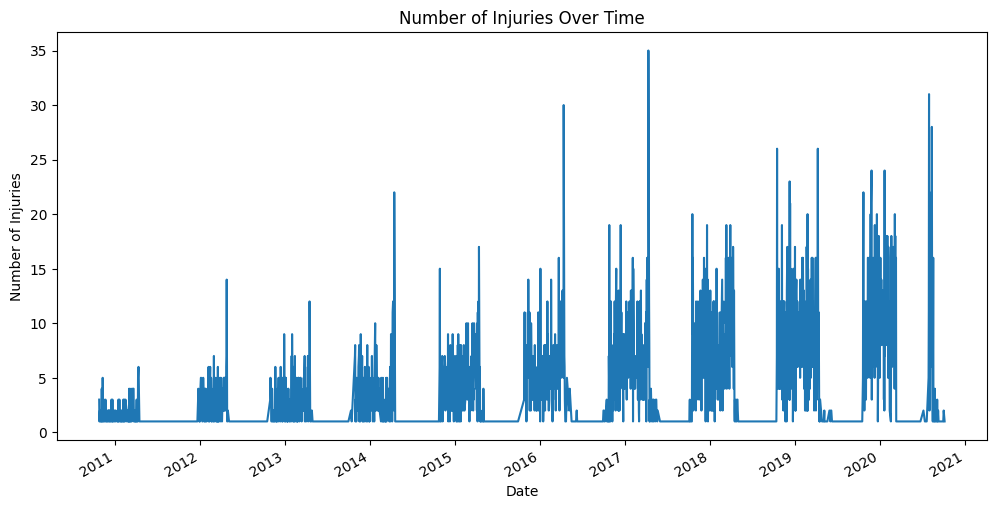

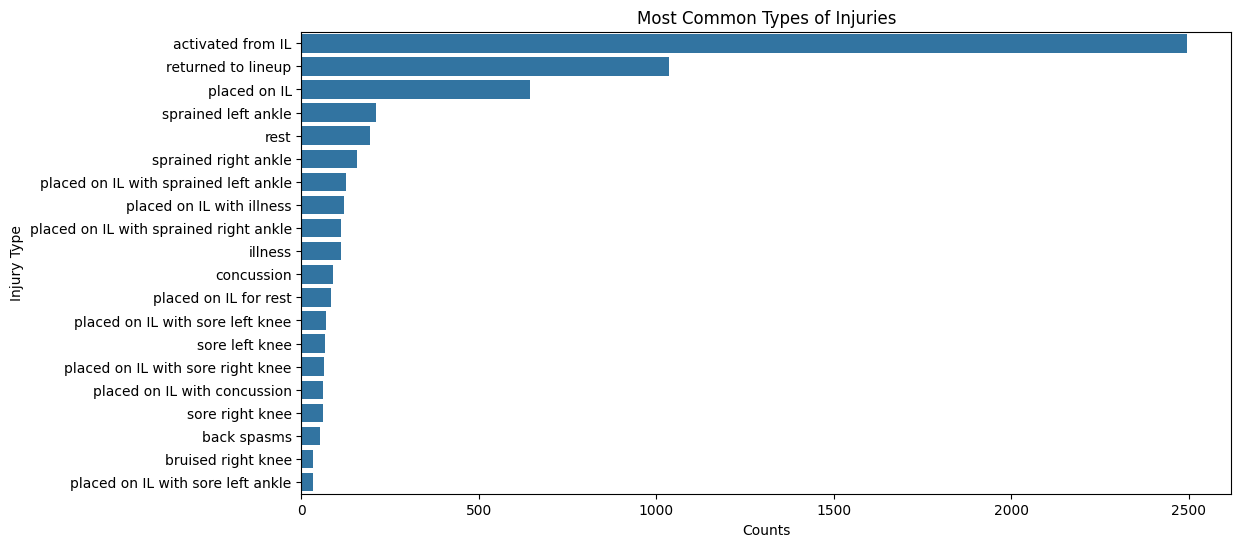

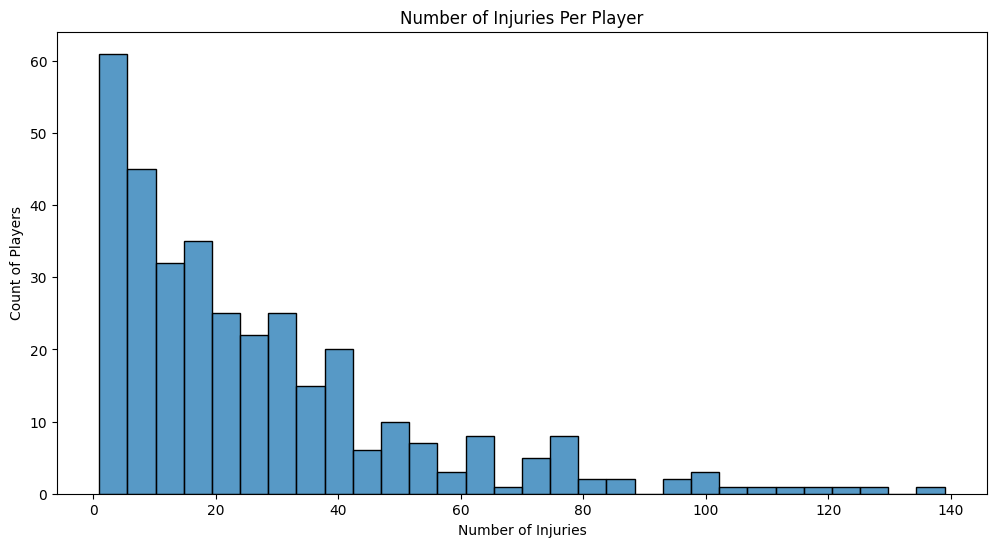

count    344.000000
mean      26.976744
std       25.470947
min        1.000000
25%        8.000000
50%       19.000000
75%       37.000000
max      139.000000
dtype: float64


In [119]:
unique_values_position = injury_df['Position'].unique()
print(f"Unique values for Position:{unique_values_position}")

unique_values_team = injury_df['Team'].unique()
print(f"\nUnique values for Team:{unique_values_team}")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic information
print(injury_df.info())

# Convert 'Date' to datetime
injury_df['Date'] = pd.to_datetime(injury_df['Date'], format='%d/%m/%Y')

# Sort by date for time series analysis
injury_df = injury_df.sort_values('Date')

# Count injuries over time
injuries_over_time = injury_df.groupby('Date').size()

# Plot number of injuries over time
plt.figure(figsize=(12, 6))
injuries_over_time.plot(title='Number of Injuries Over Time')
plt.ylabel('Number of Injuries')
plt.xlabel('Date')
plt.show()

# Count the frequency of each injury type
injury_df['Injury Type'] = injury_df['Notes'].str.extract(r'(\b[\w\s]+\b)')[0]  # Extract first word before space
injury_counts = injury_df['Injury Type'].value_counts()

# Plot most common types of injuries
plt.figure(figsize=(12, 6))
sns.barplot(y=injury_counts.index[:20], x=injury_counts.values[:20])  # Top 20 injuries
plt.title('Most Common Types of Injuries')
plt.xlabel('Counts')
plt.ylabel('Injury Type')
plt.show()

# Number of injuries per player
injuries_per_player = injury_df.groupby('Name').size().sort_values(ascending=False)

# Plot number of injuries per player
plt.figure(figsize=(12, 6))
sns.histplot(injuries_per_player, bins=30, kde=False)
plt.title('Number of Injuries Per Player')
plt.xlabel('Number of Injuries')
plt.ylabel('Count of Players')
plt.show()

# Summary statistics for injuries per player
print(injuries_per_player.describe())

In [120]:
injury_df.head(20)

Name                   Team Position       Date  \
4134         Kyle Lowry             Miami Heat       PG 2010-10-26   
5588  Patrick Patterson   Los Angeles Clippers       PF 2010-10-26   
7308      Avery Bradley        Houston Rockets       PG 2010-10-26   
6048         Marc Gasol     Los Angeles Lakers        C 2010-10-27   
9204   Hassan Whiteside              Utah Jazz        C 2010-10-29   
6049         Marc Gasol     Los Angeles Lakers        C 2010-10-29   
3932          Ish Smith      Charlotte Hornets       PG 2010-10-30   
4135         Kyle Lowry             Miami Heat       PG 2010-10-30   
4785      Stephen Curry  Golden State Warriors       PG 2010-10-31   
957         Patty Mills          Brooklyn Nets       PG 2010-11-02   
3101        George Hill        Milwaukee Bucks        G 2010-11-03   
4136         Kyle Lowry             Miami Heat       PG 2010-11-03   
958         Patty Mills          Brooklyn Nets       PG 2010-11-04   
4786      Stephen Curry  Golden State Warriors       PG 2010-11-05   
3102        George Hill        Milwaukee Bucks        G 2010-11-06   
3933          Ish Smith      Charlotte Hornets       PG 2010-11-06   
4137         Kyle Lowry             Miami Heat       PG 2010-11-06   
9205   Hassan Whiteside              Utah Jazz        C 2010-11-06   
8219         Jeff Green         Denver Nuggets       PF 2010-11-07   
4927     Andre Iguodala  Golden State Warriors        F 2010-11-07   

                                                  Notes  \
4134                      placed on IL with back spasms   
5588                                       placed on IL   
7308  placed on IL recovering from surgery on left a...   
6048  placed on IL with sprained right ankle / left ...   
9204                                       placed on IL   
6049                                  activated from IL   
3932                                       placed on IL   
4135                                  activated from IL   
4785             placed on IL with sprained right ankle   
957                                        placed on IL   
3101                      placed on IL with neck injury   
4136                                  activated from IL   
958                                   activated from IL   
4786                                  activated from IL   
3102                                  activated from IL   
3933                                  activated from IL   
4137                        placed on IL with sore back   
9205                                  activated from IL   
8219              placed on IL with sprained left ankle   
4927     placed on IL with right Achilles tendon injury   

                                            Injury Type  
4134                      placed on IL with back spasms  
5588                                       placed on IL  
7308  placed on IL recovering from surgery on left a...  
6048             placed on IL with sprained right ankle  
9204                                       placed on IL  
6049                                  activated from IL  
3932                                       placed on IL  
4135                                  activated from IL  
4785             placed on IL with sprained right ankle  
957                                        placed on IL  
3101                      placed on IL with neck injury  
4136                                  activated from IL  
958                                   activated from IL  
4786                                  activated from IL  
3102                                  activated from IL  
3933                                  activated from IL  
4137                        placed on IL with sore back  
9205                                  activated from IL  
8219              placed on IL with sprained left ankle  
4927     placed on IL with right Achilles tendon injury

## players

In [121]:
#dataset2 pt.1

# Basic information
print(players_df.info())

print(players_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      558 non-null    object 
 1   Position  558 non-null    object 
 2   Team      558 non-null    object 
 3   Age       558 non-null    int64  
 4   Height    558 non-null    object 
 5   Height_i  558 non-null    float64
 6   Weight    558 non-null    int64  
 7   College   485 non-null    object 
 8   Salary    445 non-null    float64
 9   Points    476 non-null    float64
 10  Rebounds  476 non-null    float64
 11  Assists   476 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 52.4+ KB
None
             Name Position            Team  Age  Height  Height_i  Weight  \
0  Juhann Begarin       SG  Boston Celtics   19   6' 5"      6.50     185   
1    Jaylen Brown       SG  Boston Celtics   24   6' 6"      6.60     223   
2       Kris Dunn       PG  Boston Celtics   27   

In [122]:
unique_values_position = players_df['Position'].unique()
print(f"Unique values for Position:{unique_values_position}")

print("Descriptive Statistics:")
print(players_df.describe())
print("\n")

# Check for missing values
print("Missing Values:")
print(players_df.isnull().sum())
print("\n")

Unique values for Position:['SG' 'PG' 'C' 'F' 'SF' 'PF' 'G']
Descriptive Statistics:
              Age    Height_i      Weight        Salary      Points  \
count  558.000000  558.000000  558.000000  4.450000e+02  476.000000   
mean    25.543011    6.492151  216.163082  8.813696e+06    9.692227   
std      4.318651    0.335012   24.573787  9.886777e+06    6.448994   
min     18.000000    5.100000  160.000000  9.252580e+05    0.100000   
25%     22.000000    6.200000  199.250000  1.802057e+06    5.000000   
50%     25.000000    6.500000  215.000000  4.447896e+06    8.100000   
75%     28.000000    6.700000  233.000000  1.200000e+07   13.025000   
max     41.000000    7.500000  311.000000  4.578097e+07   32.000000   

         Rebounds     Assists  
count  476.000000  476.000000  
mean     3.856303    2.140336  
std      2.349061    1.895693  
min      0.100000    0.000000  
25%      2.200000    0.800000  
50%      3.400000    1.500000  
75%      4.900000    2.900000  
max     14.300000  

In [123]:
players_df = pd.read_csv('players.csv')

In [124]:
players_df.drop(['Height', 'College'], axis = 1, inplace = True)

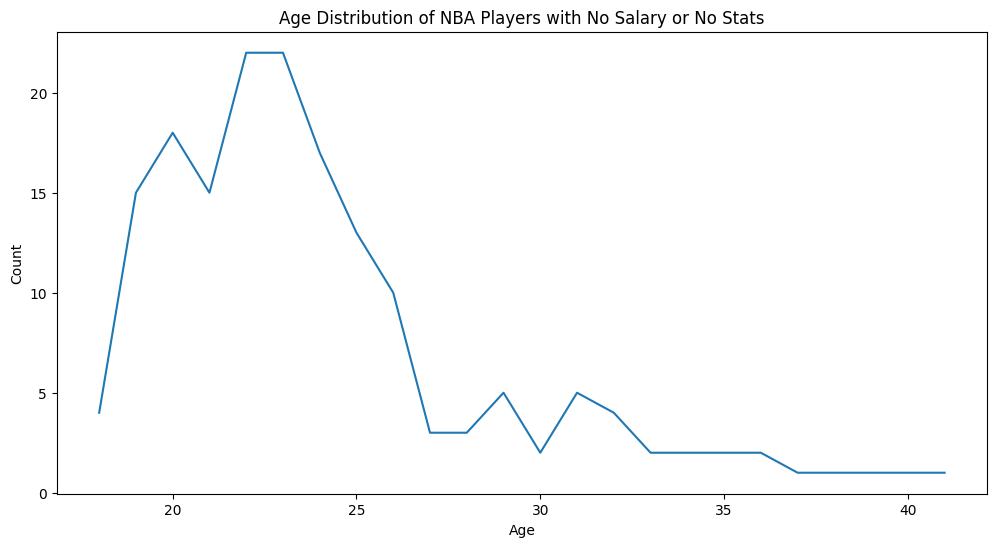

In [125]:
# Age
# Salary || Points || Rebounds || Assists == 0 
# Salary & Points & Rebounds & Assists == 0
# Filtering the DataFrame based on the conditions

players_df_edited = players_df[
    (players_df['Salary'].isnull() | (players_df['Salary'] == 0)) |
    (players_df['Points'].isnull() | (players_df['Points'] == 0)) |
    (players_df['Rebounds'].isnull() | (players_df['Rebounds'] == 0)) |
    (players_df['Assists'].isnull() | (players_df['Assists'] == 0))
]

# Group by 'Age' and count the number of players
age_distribution = players_df_edited.groupby('Age').size()

plt.figure(figsize=(12, 6))
age_distribution.plot(title='Age Distribution of NBA Players with No Salary or No Stats')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

In [126]:
import pandas as pd
import numpy as np

players_df['Position'] = players_df['Position'].replace({'PG': 'G', 'SG': 'G', 'PF': 'F', 'SF': 'F'})

# Scenario 3 first: If have salary but no stats, fill stats with 0
cols_stats = ['Points', 'Rebounds', 'Assists']
players_df.loc[players_df['Salary'].notnull(), cols_stats] = players_df.loc[players_df['Salary'].notnull(), cols_stats].fillna(0)

# Scenario 2: If all NaN (new player), fill all with 0
# This checks if all the specified columns are NaN, and if so, fills them with 0
players_df.loc[players_df[cols_stats + ['Salary']].isnull().all(axis=1), cols_stats + ['Salary']] = 0

# Scenario 1: If have points/rebounds/assists, fill salary by position average
# Temporarily fill NaN Salaries with 0 for those without any stats to avoid affecting the mean calculation
temp_salary_filled = players_df['Salary'].fillna(0)
players_df.loc[:, 'Salary'] = players_df.groupby('Position')['Salary'].transform(lambda x: x.fillna(x.mean()))

# Correct any 0 values filled temporarily for salary with the actual mean of the position
players_df.loc[players_df['Salary'] == 0, 'Salary'] = players_df.groupby('Position')['Salary'].transform('mean')

# Note: Be sure your data includes enough salary information per position for this to be meaningful.

players_df.head(10).T

0               1               2               3  \
Name      Juhann Begarin    Jaylen Brown       Kris Dunn  Carsen Edwards   
Position               G               G               G               G   
Team      Boston Celtics  Boston Celtics  Boston Celtics  Boston Celtics   
Age                   19              24              27              23   
Height_i             6.5             6.6             6.3            5.11   
Weight               185             223             205             200   
Salary    8913886.701923      26758928.0       5005350.0       1782621.0   
Points               0.0            24.7             1.3             4.0   
Rebounds             0.0             6.0             1.5             0.8   
Assists              0.0             3.4             0.5             0.5   

                       4               5               6               7  \
Name          Tacko Fall  Bruno Fernando      Al Horford     Enes Kanter   
Position               C               F               C               C   
Team      Boston Celtics  Boston Celtics  Boston Celtics  Boston Celtics   
Age                   25              23              35              29   
Height_i             7.5             6.9             6.9             6.1   
Weight               311             240             240             250   
Salary    7830026.666667       1782621.0      27000000.0       1669178.0   
Points               2.5             1.5            14.2            11.2   
Rebounds             2.7             2.4             6.7            11.0   
Assists              0.2             0.3             3.4             1.2   

                       8               9  
Name         Luke Kornet  Romeo Langford  
Position               C               G  
Team      Boston Celtics  Boston Celtics  
Age                   26              21  
Height_i             7.2             6.4  
Weight               250             216  
Salary    7830026.666667       3804360.0  
Points               3.4             3.1  
Rebounds             2.2             1.9  
Assists              0.8             0.7

## players: Data Understanding 

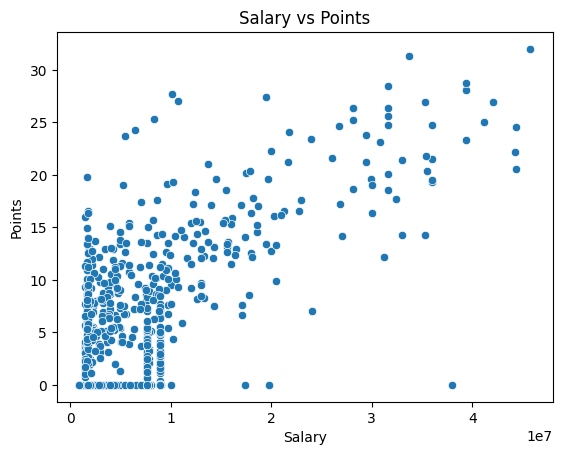

In [127]:
# Visualizations
# Scatter plots
sns.scatterplot(data=players_df, x='Salary', y='Points')
plt.title('Salary vs Points')
plt.show()

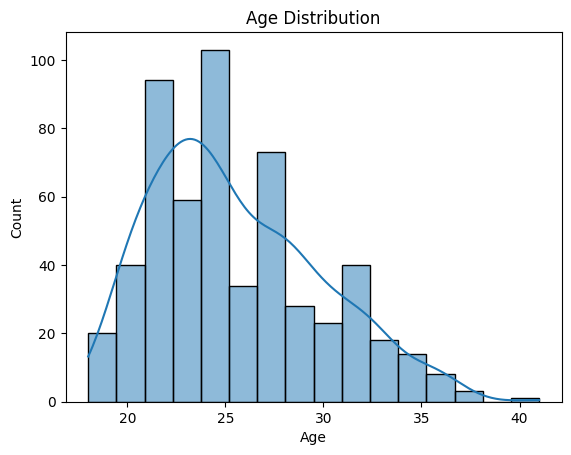

In [128]:
# Histograms
sns.histplot(players_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

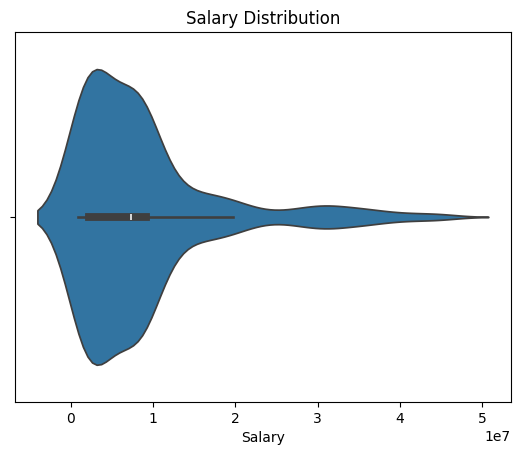

In [129]:
# Violinplot for Salary
sns.violinplot(x=players_df['Salary'])
plt.title('Salary Distribution')
plt.show()

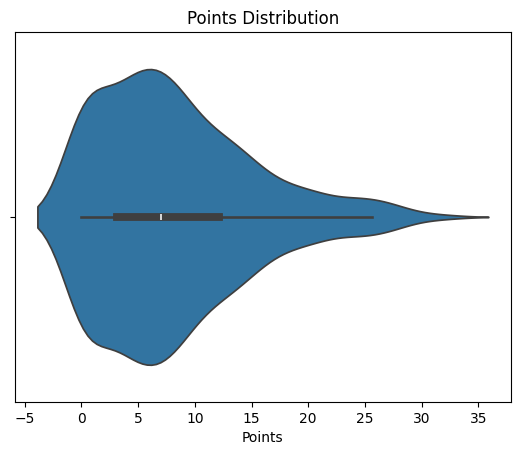

In [130]:
# Violinplot for Points
sns.violinplot(x=players_df['Points'])
plt.title('Points Distribution')
plt.show()

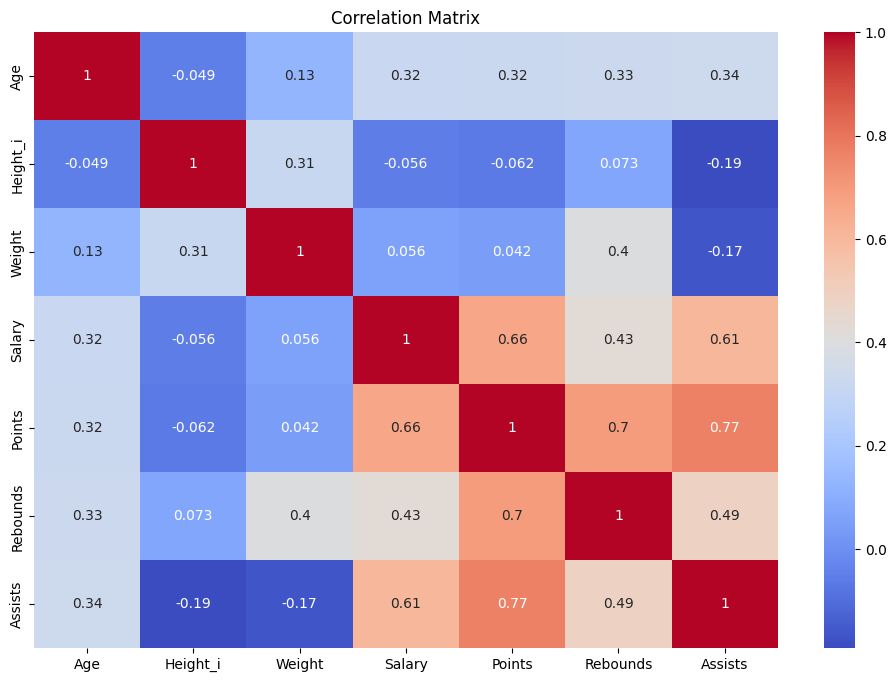

In [131]:
# Select only numeric columns for the correlation matrix
numeric_columns = players_df.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = players_df[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

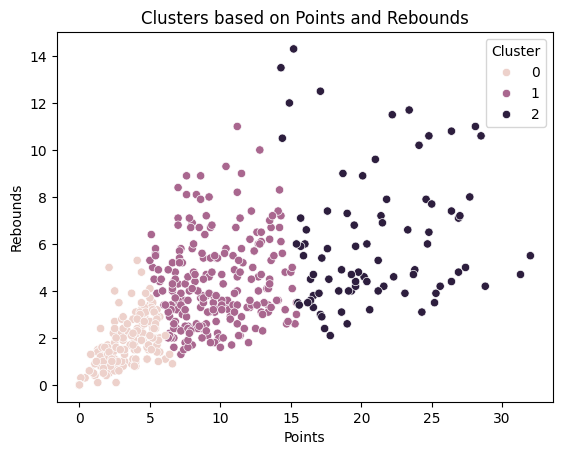

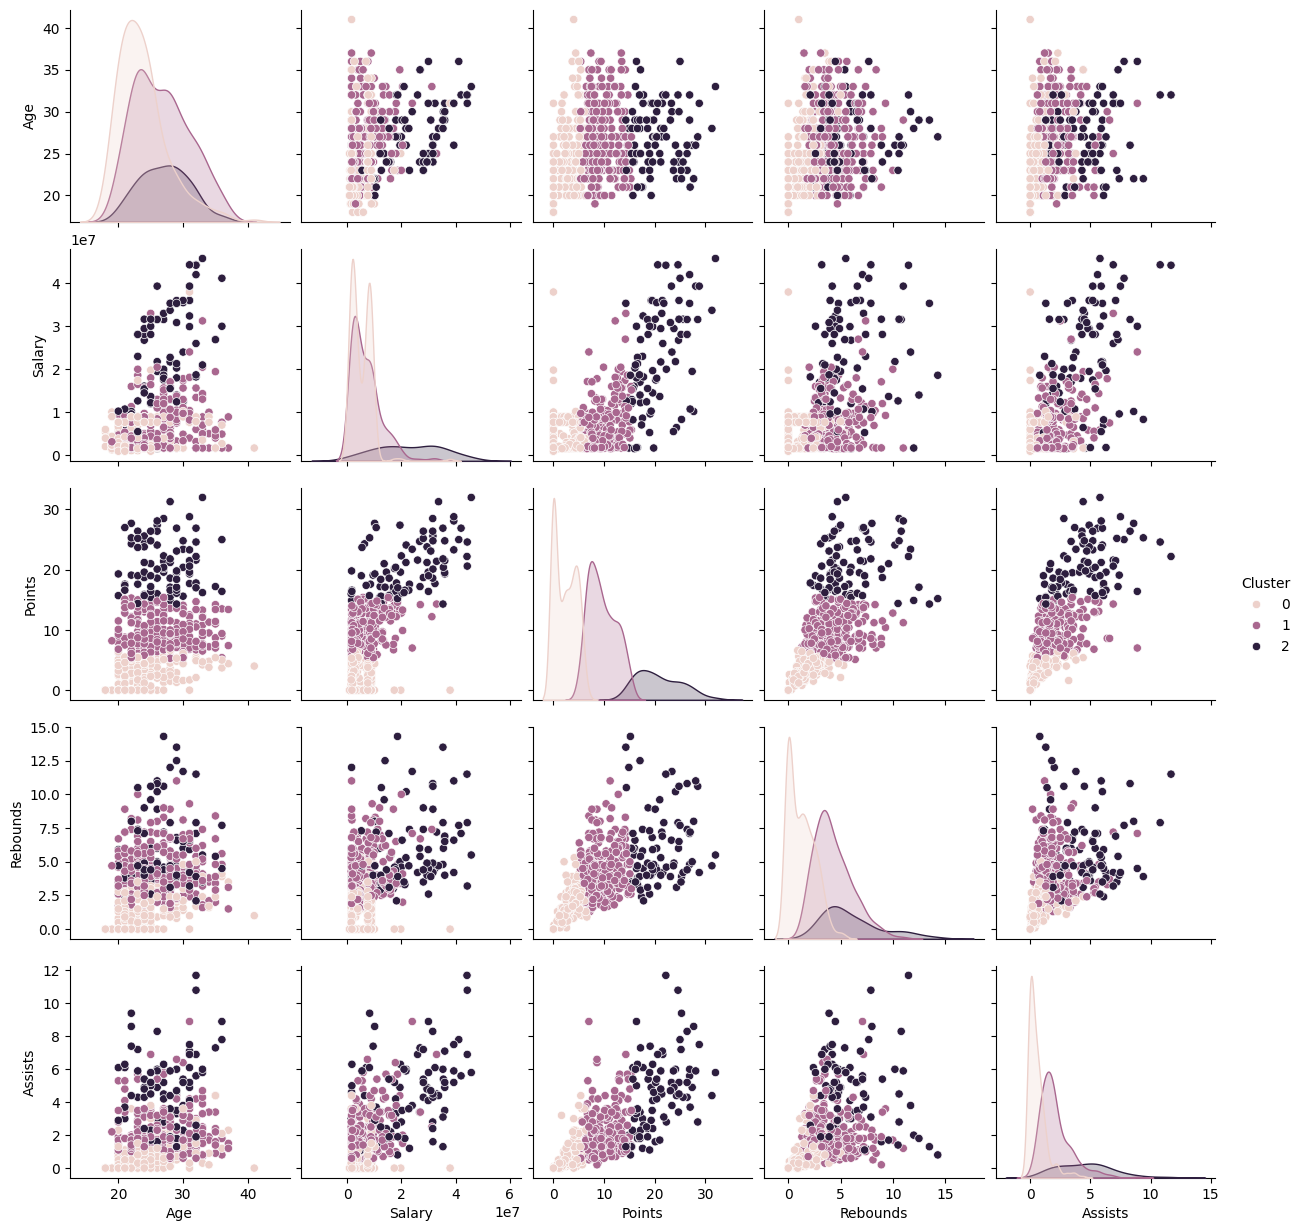

In [132]:
# Clustering (using KMeans for Points and Rebounds)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
players_df['Cluster'] = kmeans.fit_predict(players_df[['Points', 'Rebounds']])
sns.scatterplot(data=players_df, x='Points', y='Rebounds', hue='Cluster')
plt.title('Clusters based on Points and Rebounds')
plt.show()

sns.pairplot(players_df, vars = ['Age', 'Salary', 'Points', 'Rebounds', 'Assists'], hue ='Cluster')
plt.show()

# players2021-2022

In [133]:
#dataset3 pt.1
players2_df = pd.read_csv('players2021-2022.csv')

# Initial data checks
print("Dataset Head:")
print(players2_df.head().T)
print("\n")

print("Dataset Info:")
print(players2_df.info())
print("\n")

print("Descriptive Statistics:")
print(players2_df.describe())
print("\n")

# Check for missing values
print("Missing Values:")
print(players2_df.isnull().sum())
print("\n")


unique_values_position = players2_df['Pos'].unique()
print(f"Unique values for Position:{unique_values_position}")

Dataset Head:
                                  0             1            2             3  \
Rk                                1             2            3             4   
Player             Precious Achiuwa  Steven Adams  Bam Adebayo  Santi Aldama   
Pos                               C             C            C            PF   
Age                              22            28           24            21   
Tm                              TOR           MEM          MIA           MEM   
G                                73            76           56            32   
GS                               28            75           56             0   
MP                             23.6          26.3         32.6          11.3   
FG                              3.6           2.8          7.3           1.7   
FGA                             8.3           5.1         13.0           4.1   
FG%                           0.439         0.547        0.557         0.402   
3P                        

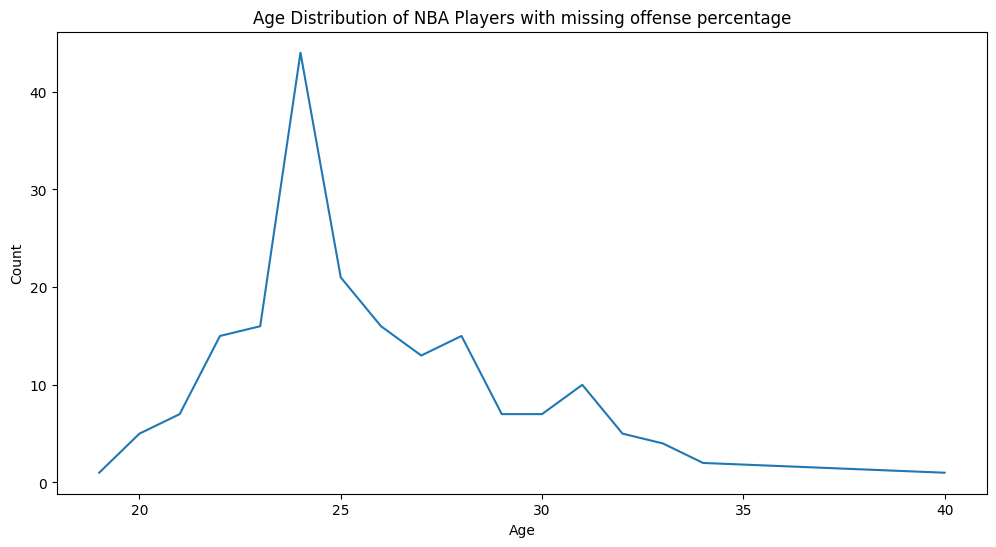

In [134]:
players2_df_edited = players2_df[
    (players2_df['FG%'].isnull() | (players2_df['FG%'] == 0)) |
    (players2_df['3P%'].isnull() | (players2_df['3P%'] == 0)) |
    (players2_df['2P%'].isnull() | (players2_df['2P%'] == 0)) |
    (players2_df['eFG%'].isnull() | (players2_df['eFG%'] == 0)) |
    (players2_df['FT%'].isnull() | (players2_df['FT%'] == 0))
]

players2_df_edited.head(10).T

# Group by 'Age' and count the number of players
age_distribution = players2_df_edited.groupby('Age').size()

plt.figure(figsize=(12, 6))
age_distribution.plot(title='Age Distribution of NBA Players with missing offense percentage')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

In [135]:
# List of columns to check for missing values
columns_with_nas = ['FG%', '3P%', '2P%', 'eFG%', 'FT%']

# Loop through each column
for col in columns_with_nas:
    # Create a new column indicating missingness (1 if missing, 0 if not)
    players2_df[col + '_missing'] = players2_df[col].isnull().astype(int)
    
    # Fill missing values in the original column with 0
    players2_df[col] = players2_df[col].fillna(0)

players2_df['Pos'] = players2_df['Pos'].replace({'PG': 'G', 'SG': 'G', 'PF': 'F', 'SF': 'F', 'SG-PG': 'G',  'SG-SF':'G', 'SF-SG':'F', 'PF-SF':'F', 'C-PF': 'C', 'SG-PG-SF':'G', 'PG-SG':'G'})

players2_df.head().T

0             1            2             3  \
Rk                                1             2            3             4   
Player             Precious Achiuwa  Steven Adams  Bam Adebayo  Santi Aldama   
Pos                               C             C            C             F   
Age                              22            28           24            21   
Tm                              TOR           MEM          MIA           MEM   
G                                73            76           56            32   
GS                               28            75           56             0   
MP                             23.6          26.3         32.6          11.3   
FG                              3.6           2.8          7.3           1.7   
FGA                             8.3           5.1         13.0           4.1   
FG%                           0.439         0.547        0.557         0.402   
3P                              0.8           0.0          0.0           0.2   
3PA                             2.1           0.0          0.1           1.5   
3P%                           0.359           0.0          0.0         0.125   
2P                              2.9           2.8          7.3           1.5   
2PA                             6.1           5.0         12.9           2.6   
2P%                           0.468         0.548        0.562          0.56   
eFG%                          0.486         0.547        0.557         0.424   
FT                              1.1           1.4          4.6           0.6   
FTA                             1.8           2.6          6.1           1.0   
FT%                           0.595         0.543        0.753         0.625   
ORB                             2.0           4.6          2.4           1.0   
DRB                             4.5           5.4          7.6           1.7   
TRB                             6.5          10.0         10.1           2.7   
AST                             1.1           3.4          3.4           0.7   
STL                             0.5           0.9          1.4           0.2   
BLK                             0.6           0.8          0.8           0.3   
TOV                             1.2           1.5          2.6           0.5   
PF                              2.1           2.0          3.1           1.1   
PTS                             9.1           6.9         19.1           4.1   
Player-additional         achiupr01     adamsst01    adebaba01     aldamsa01   
FG%_missing                       0             0            0             0   
3P%_missing                       0             0            0             0   
2P%_missing                       0             0            0             0   
eFG%_missing                      0             0            0             0   
FT%_missing                       0             0            0             0   

                                   4  
Rk                                 5  
Player             LaMarcus Aldridge  
Pos                                C  
Age                               36  
Tm                               BRK  
G                                 47  
GS                                12  
MP                              22.3  
FG                               5.4  
FGA                              9.7  
FG%                             0.55  
3P                               0.3  
3PA                              1.0  
3P%                            0.304  
2P                               5.1  
2PA                              8.8  
2P%                            0.578  
eFG%                           0.566  
FT                               1.9  
FTA                              2.2  
FT%                            0.873  
ORB                              1.6  
DRB                              3.9  
TRB                              5.5  
AST                              0.9  
STL                              0.3  
BLK                 

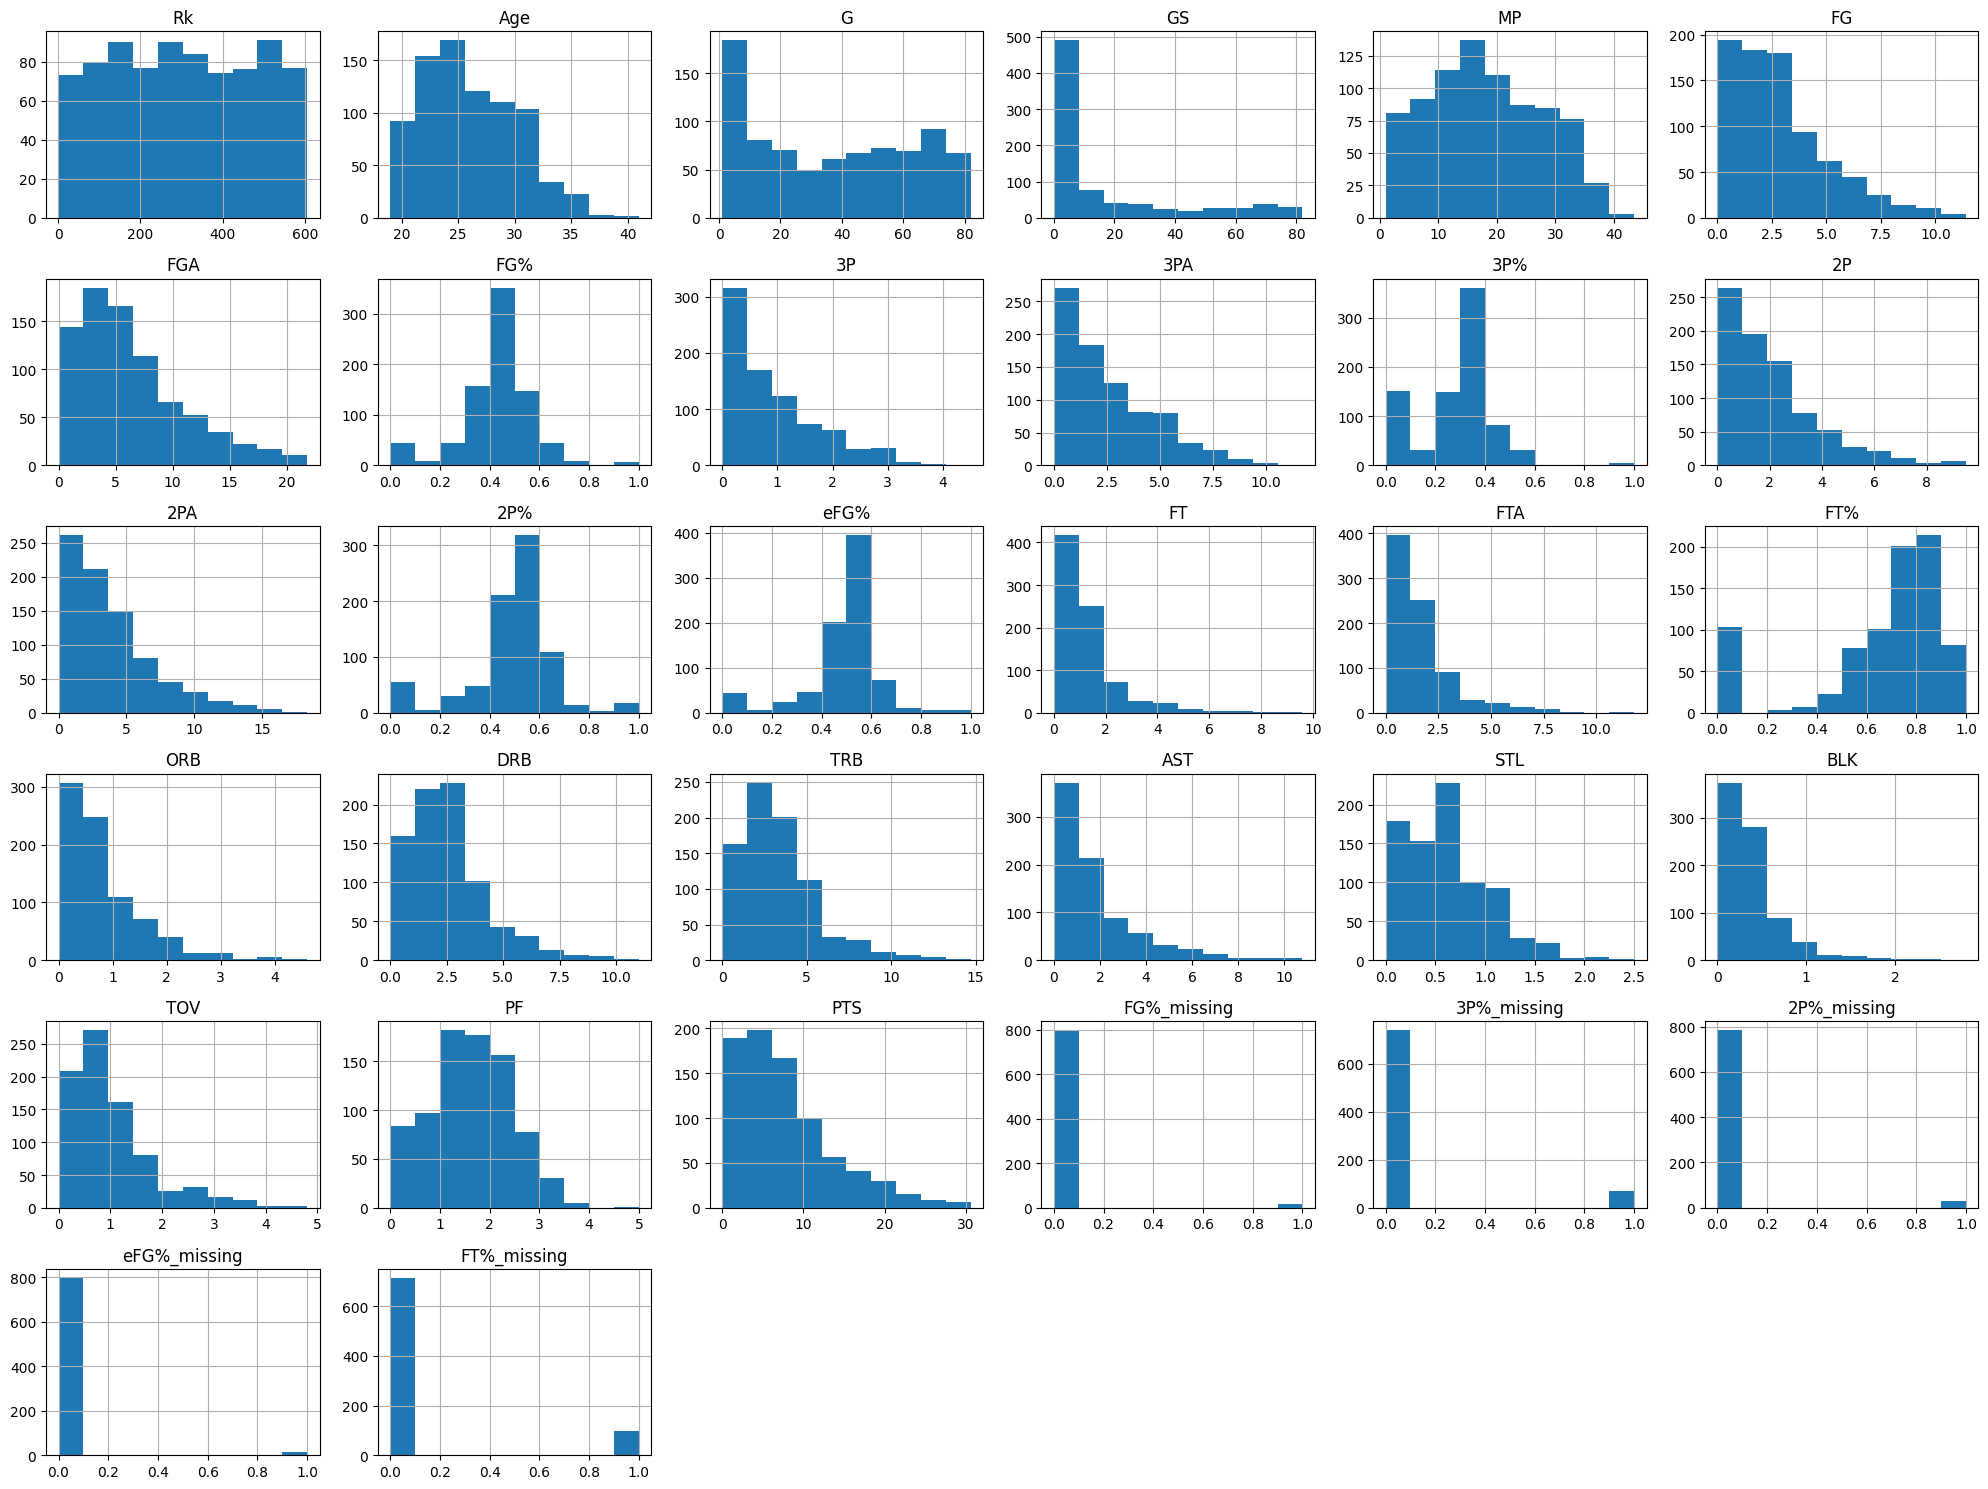

In [136]:
# Histograms for numeric data
players2_df.hist(figsize=(20, 15))
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

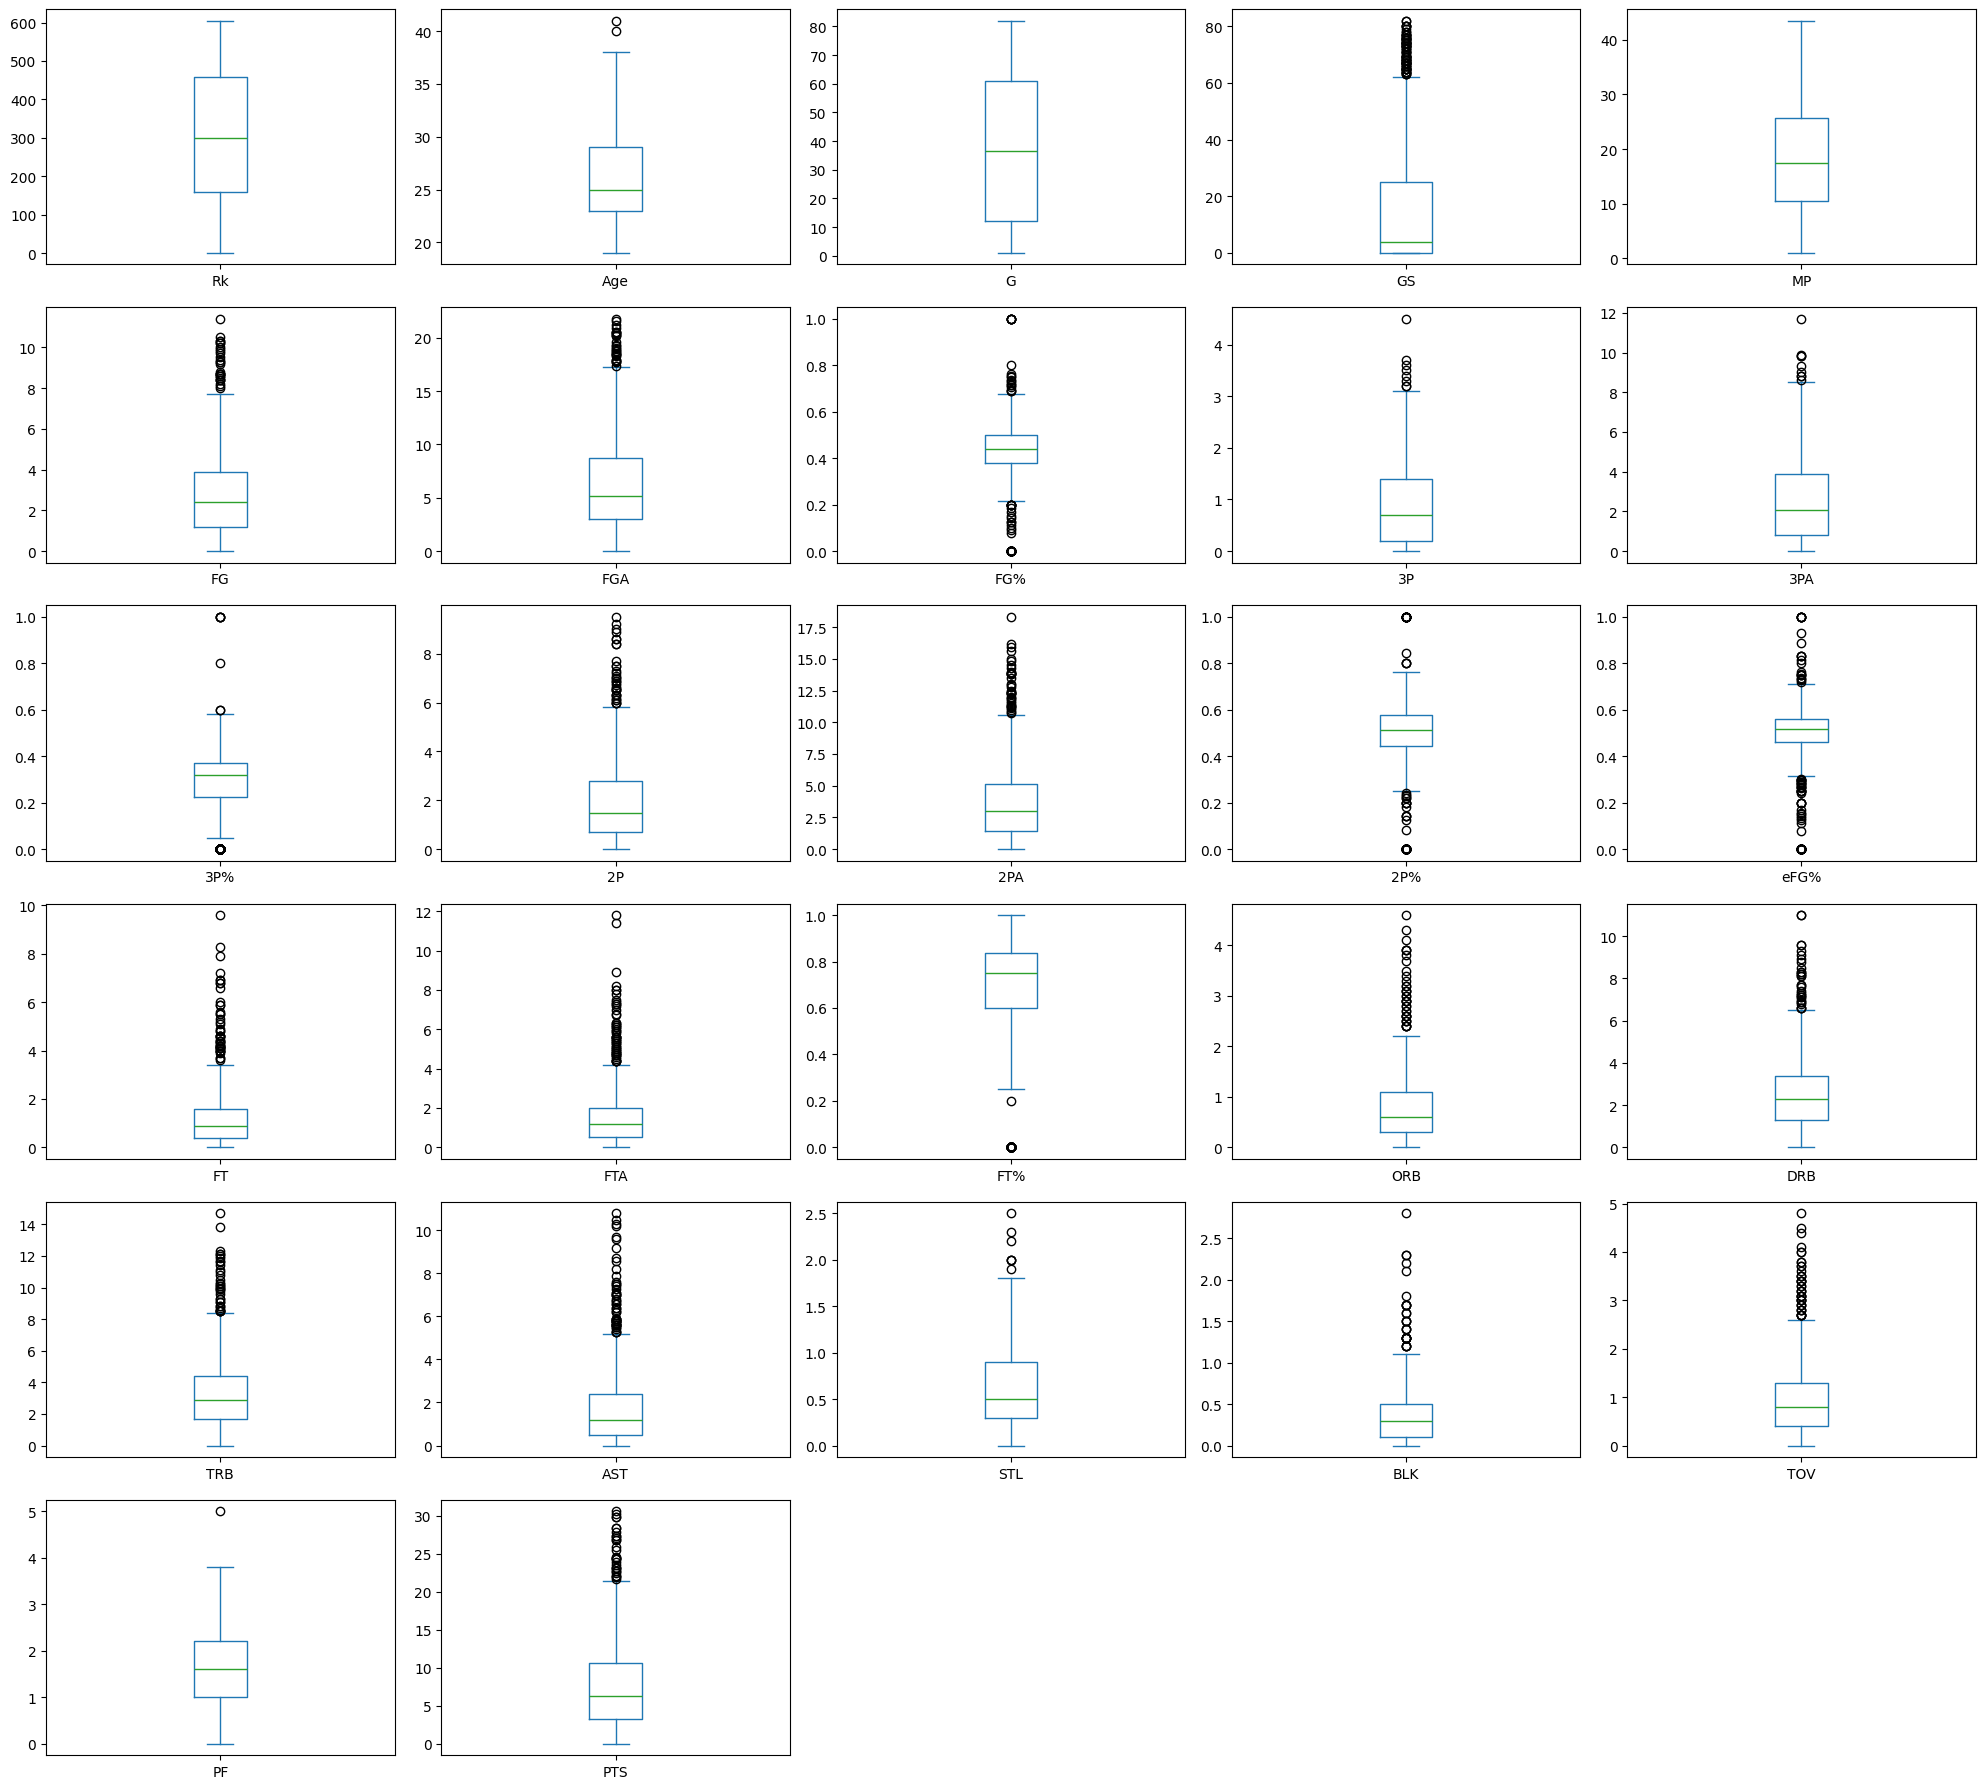

In [137]:
# Boxplots for numeric data to check for outliers
players2_df.select_dtypes(include=['float64', 'int64']).plot(kind='box', subplots=True, layout=(6, 5), figsize=(20, 18))
plt.tight_layout()
plt.show()

In [138]:
# different ways of dealing with skewness and outliers including standardization and normalization

#one scale: standardization
#specific range: normalization
#reduce extreme influences: robust scaling (scalers)

#categorical imbalance: oversampling/undersampling or SMOTE
#numerical imbalance: logarithmic / square root / box-cox / robust scaling
#target variable: it's a classification / regression / clustering problem?
#right skew: mean > median > mode, left side hump -> log / square root / box-cox transformation 
#left skew：mode > median > mean, right side hump -> power transformation (less often)

import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler, StandardScaler

players2_df.rename(columns={'Pos': 'Position', 'Player': 'Name', 'Tm':'Team'}, inplace=True)

#categorical data: pos, tm 
#do it when it's predictive modelling's turn
#players2_df = pd.get_dummies(players2_df, columns=['Position', 'Team'], drop_first=False)  # Convert categorical columns to one-hot encoded
#players2_df

#remove: player-additional
players2_df.drop(['Player-additional'], axis=1, inplace=True)

#normalize: age, rk, g, mp
min_max_scaler = MinMaxScaler()
players2_df[['Age', 'Rk', 'G', 'MP']] = min_max_scaler.fit_transform(players2_df[['Age', 'Rk', 'G', 'MP']])

#skewed: age, gs, mo, fg, fga, ft, fta, ft%, orb, drb, trb, ast, stl, blk, tov, pf, pts
# For columns that are strictly positive and right-skewed
# Note: Box-Cox requires positive values, so ensure there are no zero values
skewed_columns = ['GS', 'FG', 'FGA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

for col in skewed_columns:
    # Adding 1 for log transformation to handle zero values
    players2_df[col] = np.log1p(players2_df[col])

#binary: _missing
#mode-obvious: 2p% eFG%

# players2021-2022: Data Understanding

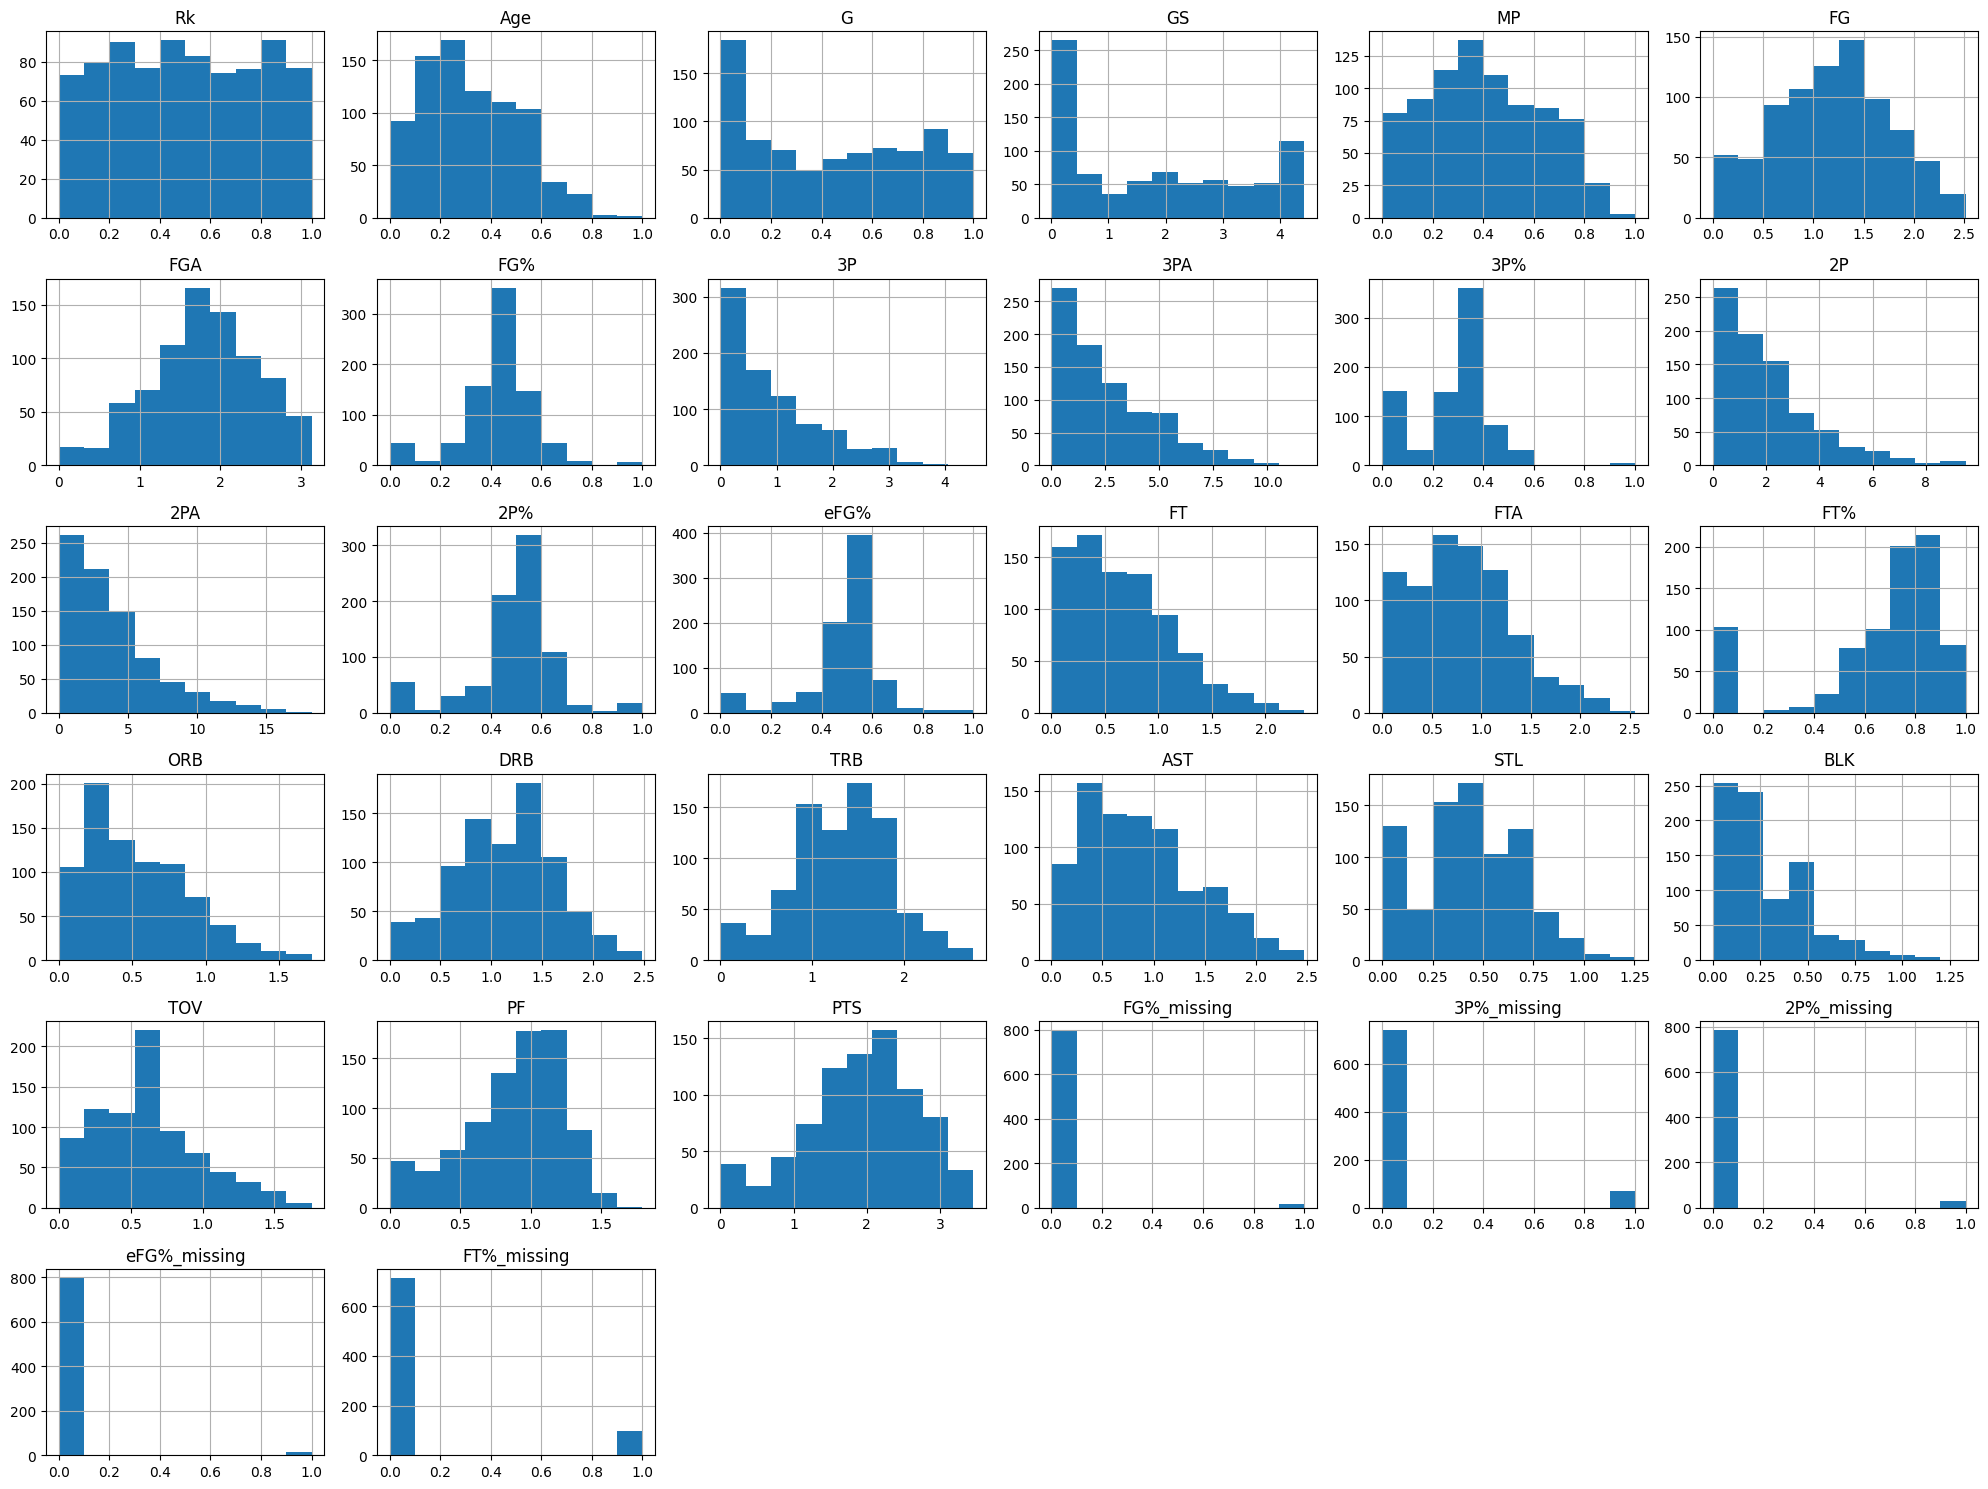

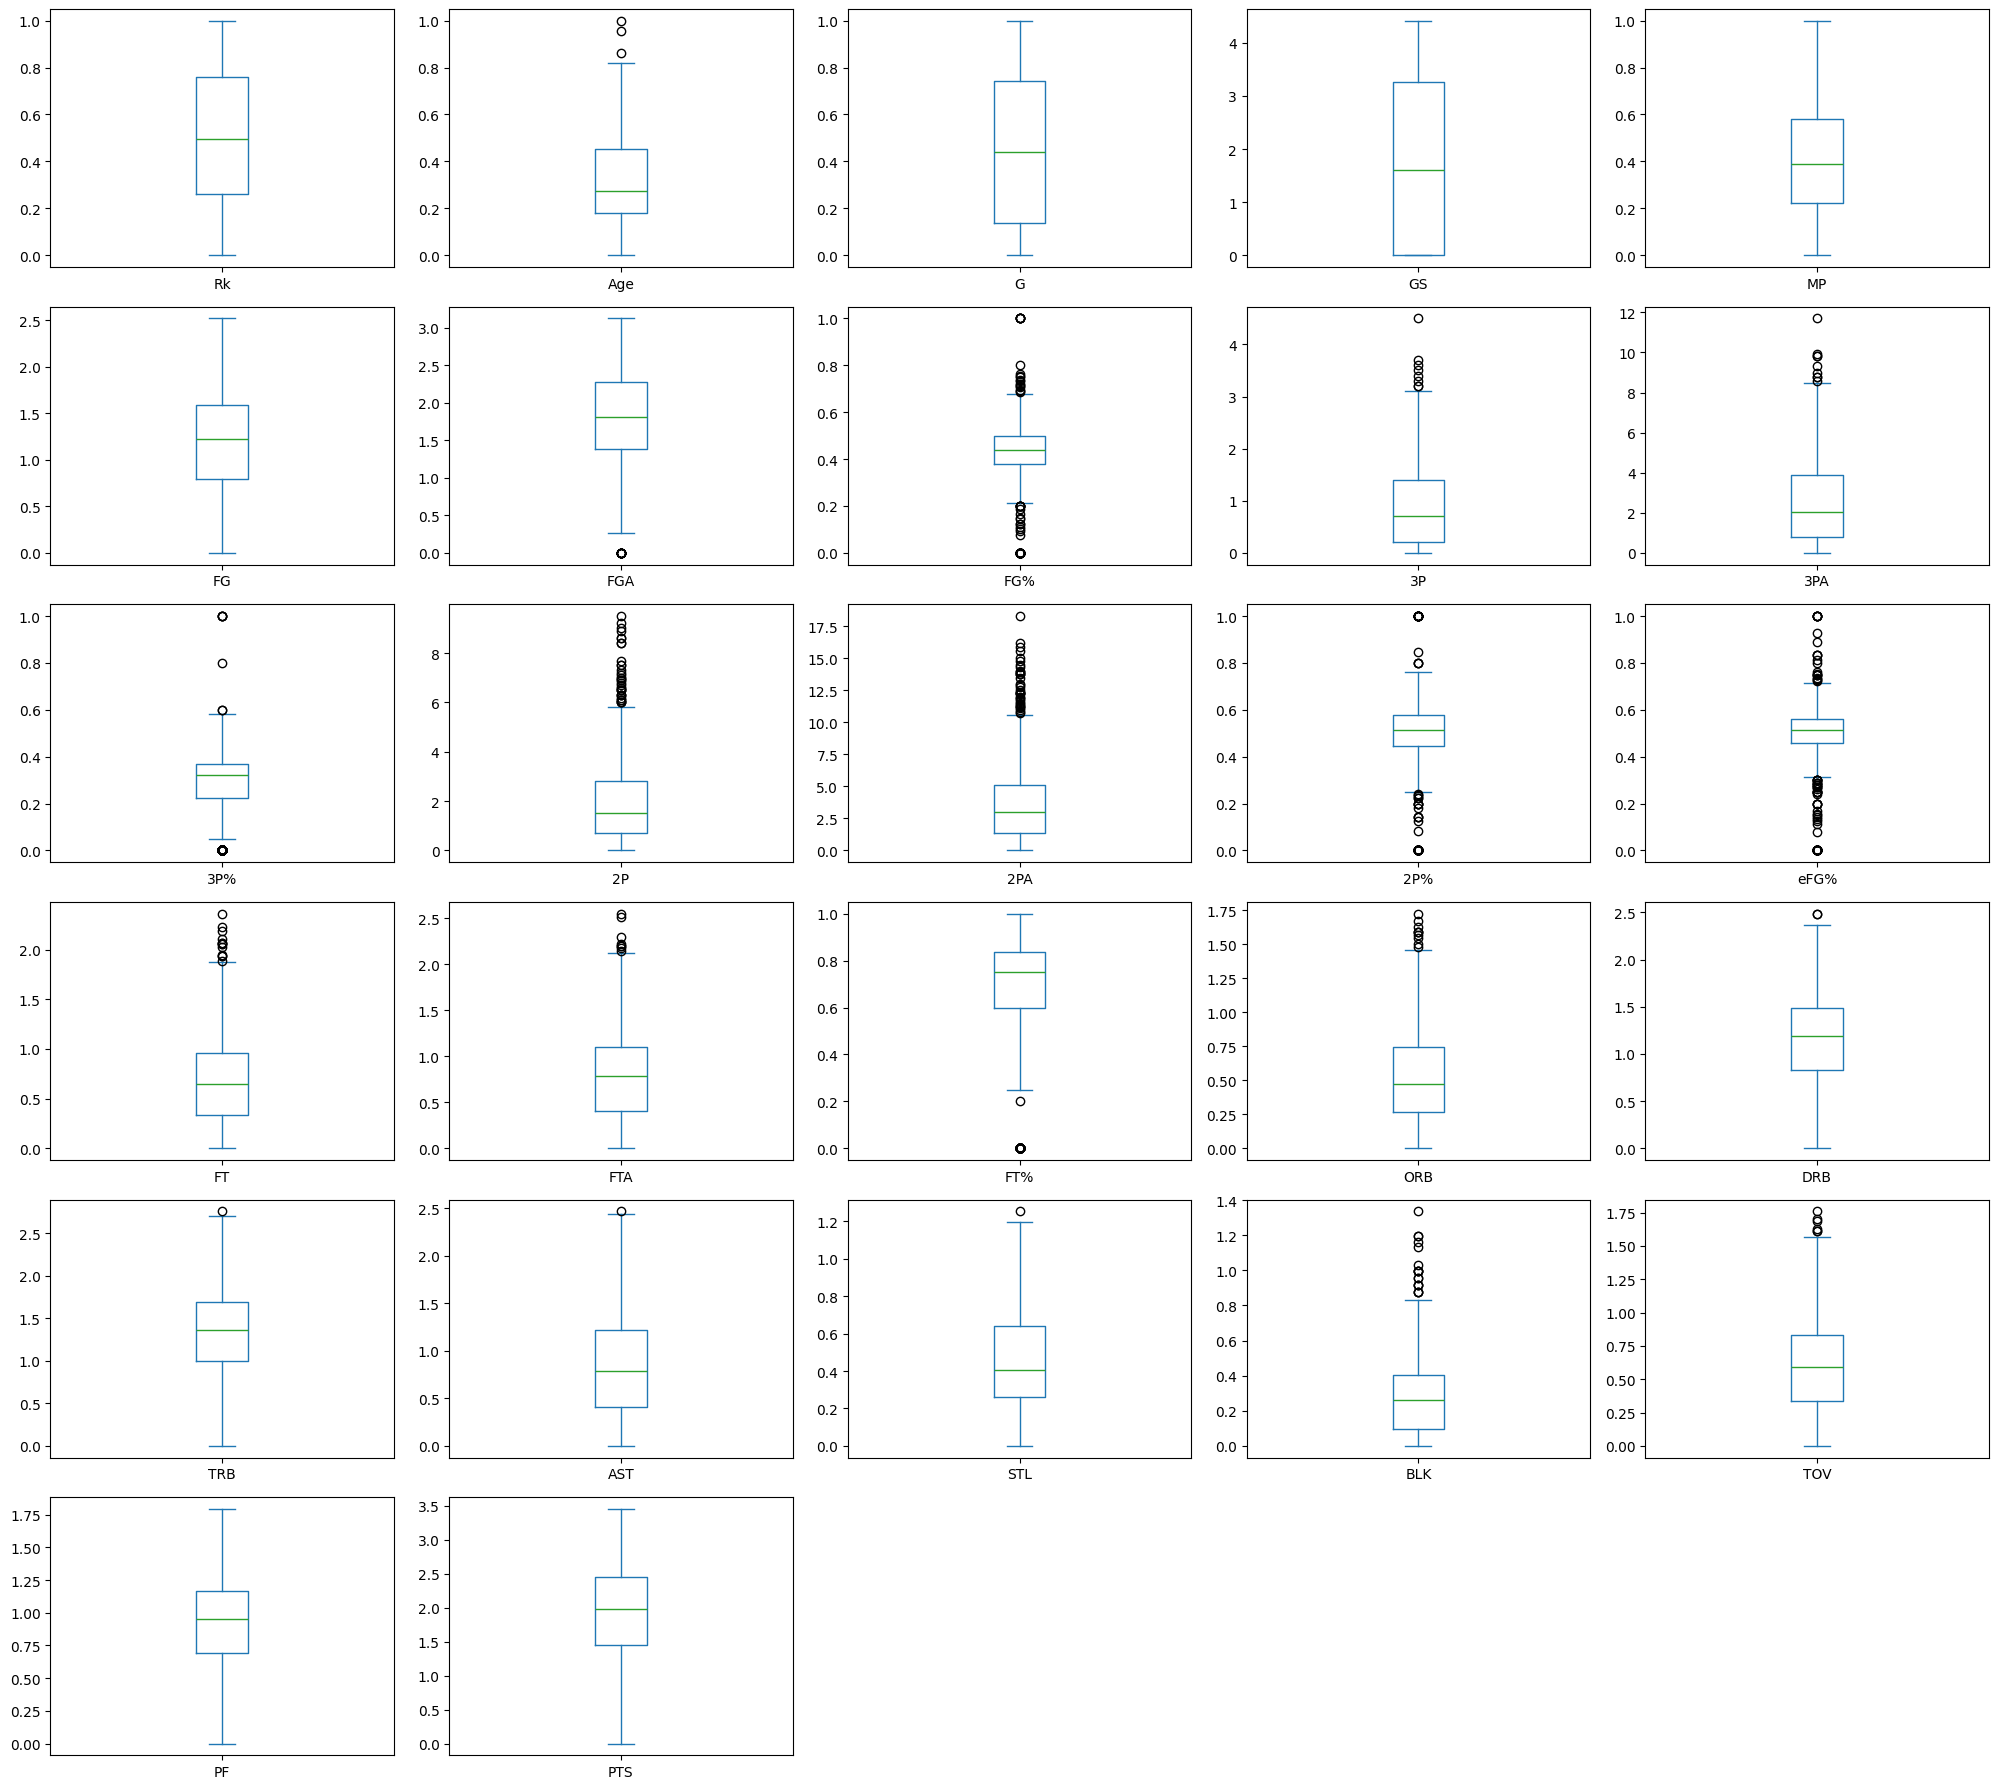

In [139]:
#POST PREPROCESSING

# Histograms for numeric data
players2_df.hist(figsize=(20, 15))
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

# Boxplots for numeric data to check for outliers
players2_df.select_dtypes(include=['float64', 'int64']).plot(kind='box', subplots=True, layout=(6, 5), figsize=(20, 18))
plt.tight_layout()
plt.show()

## Standings

In [140]:
#dataset4 pt.1
standings_df = pd.read_csv('TeamStandings.csv')
print(standings_df.info())

print(standings_df.head(5))

# Check for missing values and decide how to handle them
print("Column\tMissing Value Count")
print(standings_df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rk       30 non-null     int64 
 1   Team     30 non-null     object
 2   Overall  30 non-null     object
 3   Home     30 non-null     object
 4   Road     30 non-null     object
 5   E        30 non-null     object
 6   W        30 non-null     object
 7   A        30 non-null     object
 8   C        30 non-null     object
 9   SE       30 non-null     object
 10  NW       30 non-null     object
 11  P        30 non-null     object
 12  SW       30 non-null     object
 13  Pre      30 non-null     object
 14  Post     30 non-null     object
 15  ≤3       30 non-null     object
 16  ≥10      30 non-null     object
 17  Oct      30 non-null     object
 18  Nov      30 non-null     object
 19  Dec      30 non-null     object
 20  Jan      30 non-null     object
 21  Feb      30 non-null     object
 22  Mar 

              Rk
count  30.000000
mean   15.500000
std     8.803408
min     1.000000
25%     8.250000
50%    15.500000
75%    22.750000
max    30.000000


C:\Users\james\AppData\Local\Temp\ipykernel_20836\459413321.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  win_plot = sns.barplot(x='Wins', y='Team', data=standings_df, palette='viridis')


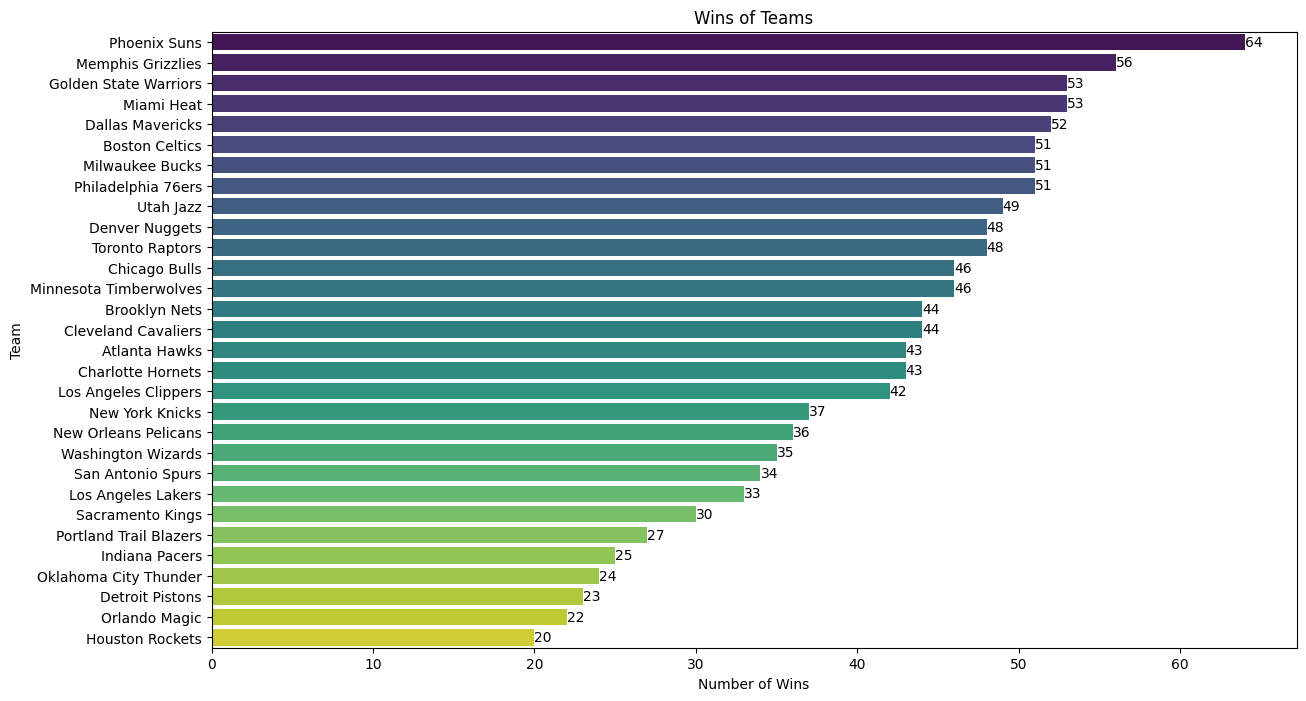

C:\Users\james\AppData\Local\Temp\ipykernel_20836\459413321.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  loss_plot = sns.barplot(x='Losses', y='Team', data=standings_df, palette='rocket')


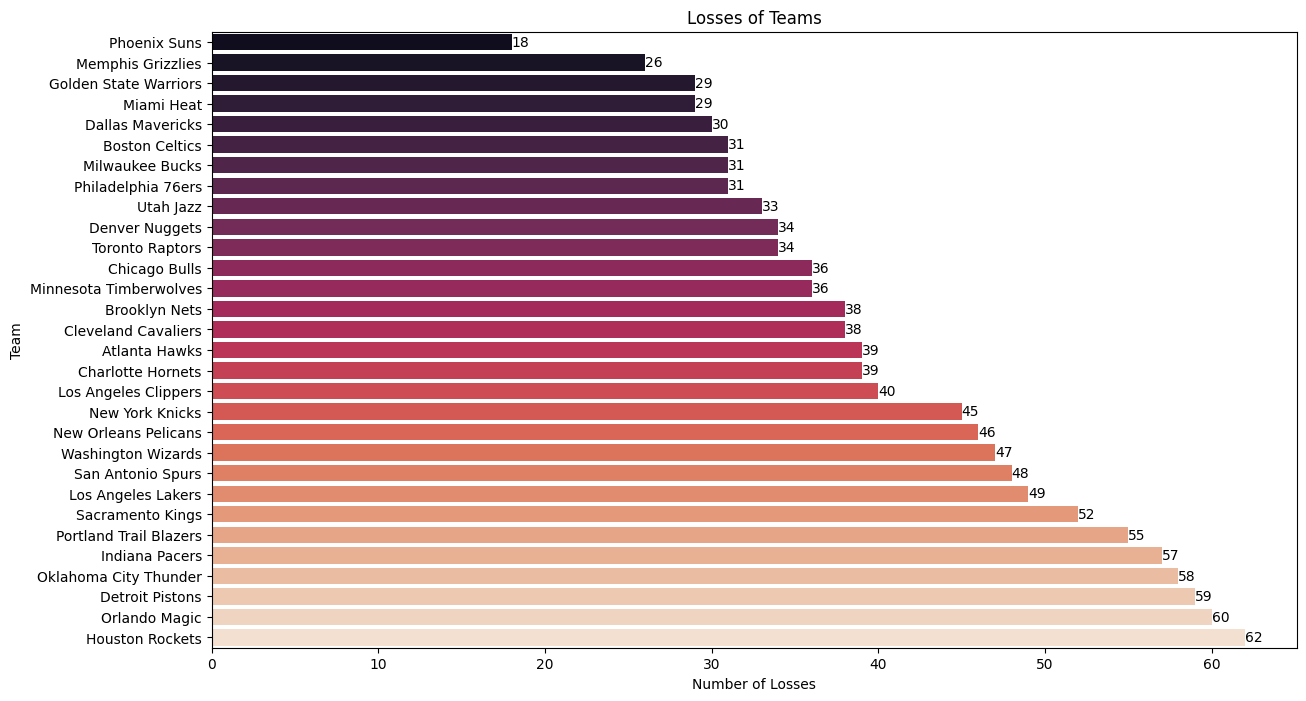

In [141]:
# Exploratory Data Analysis (EDA)
# Summary statistics for the numeric columns
print(standings_df.describe())

# Visualization of team performance
# Split the 'Overall' column into 'Wins' and 'Losses'
standings_df[['Wins', 'Losses']] = standings_df['Overall'].str.split('-', expand=True)

# Convert 'Wins' and 'Losses' to numeric
standings_df['Wins'] = pd.to_numeric(standings_df['Wins'])
standings_df['Losses'] = pd.to_numeric(standings_df['Losses'])

# Bar chart for Wins
plt.figure(figsize=(14, 8))
win_plot = sns.barplot(x='Wins', y='Team', data=standings_df, palette='viridis')
plt.title('Wins of Teams')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
# Add labels to each bar
for p in win_plot.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2. + 0.2, '{:1.0f}'.format(width), ha="left")
plt.show()

# Bar chart for Losses
plt.figure(figsize=(14, 8))
loss_plot = sns.barplot(x='Losses', y='Team', data=standings_df, palette='rocket')
plt.title('Losses of Teams')
plt.xlabel('Number of Losses')
plt.ylabel('Team')
# Add labels to each bar
for p in loss_plot.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2. + 0.2, '{:1.0f}'.format(width), ha="left")
plt.show()

# Advanced Statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 812 non-null    int64  
 1   Player             812 non-null    object 
 2   Pos                812 non-null    object 
 3   Age                812 non-null    int64  
 4   Tm                 812 non-null    object 
 5   G                  812 non-null    int64  
 6   MP                 812 non-null    int64  
 7   PER                812 non-null    float64
 8   TS%                799 non-null    float64
 9   3PAr               797 non-null    float64
 10  FTr                797 non-null    float64
 11  ORB%               812 non-null    float64
 12  DRB%               812 non-null    float64
 13  TRB%               812 non-null    float64
 14  AST%               812 non-null    float64
 15  STL%               812 non-null    float64
 16  BLK%               812 non

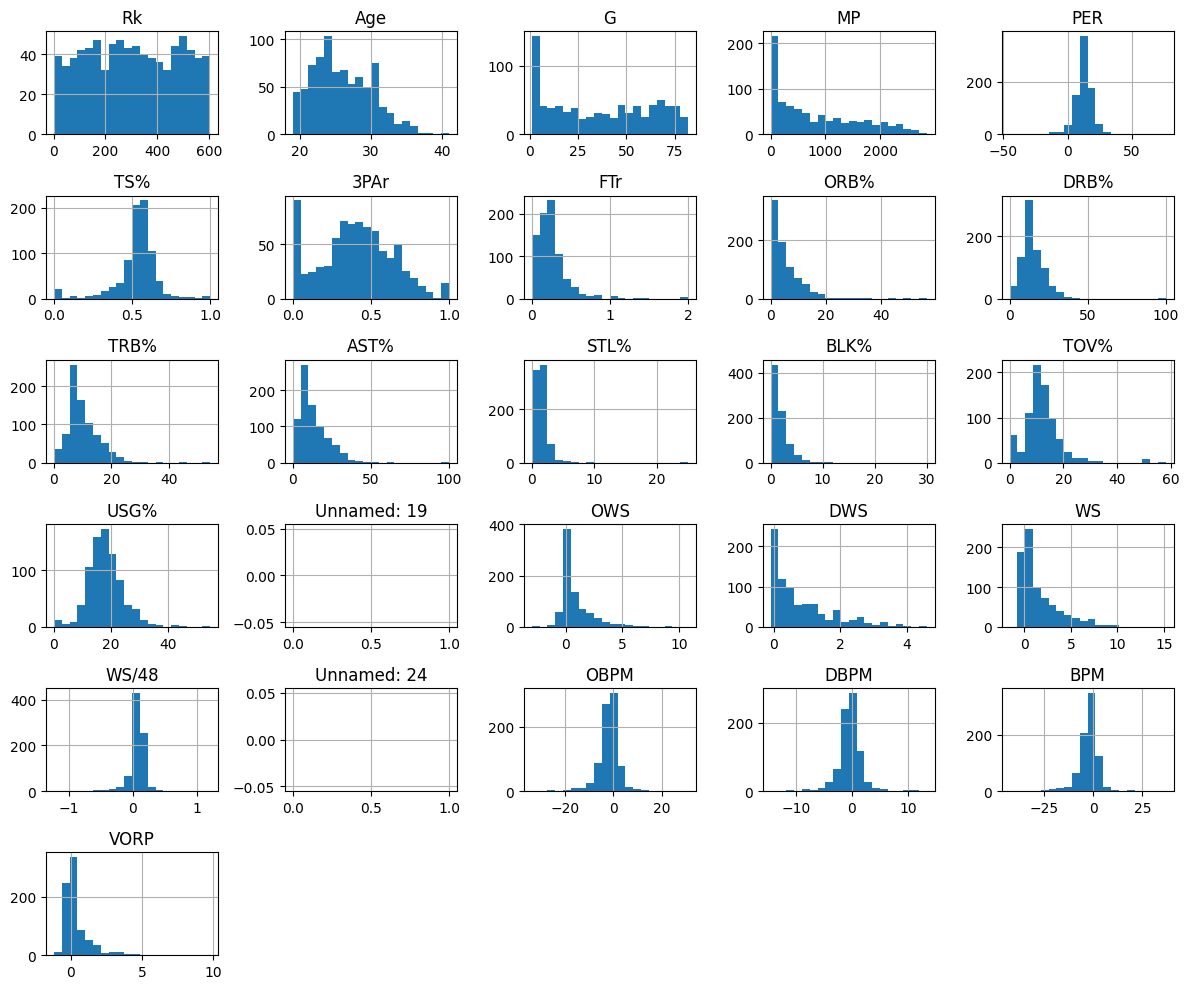

Missing percentage of each column:
Rk                     0.000000
Player                 0.000000
Pos                    0.000000
Age                    0.000000
Tm                     0.000000
G                      0.000000
MP                     0.000000
PER                    0.000000
TS%                    1.600985
3PAr                   1.847291
FTr                    1.847291
ORB%                   0.000000
DRB%                   0.000000
TRB%                   0.000000
AST%                   0.000000
STL%                   0.000000
BLK%                   0.000000
TOV%                   1.600985
USG%                   0.000000
Unnamed: 19          100.000000
OWS                    0.000000
DWS                    0.000000
WS                     0.000000
WS/48                  0.000000
Unnamed: 24          100.000000
OBPM                   0.000000
DBPM                   0.000000
BPM                    0.000000
VORP                   0.000000
Player-additional      0.000000
dtype

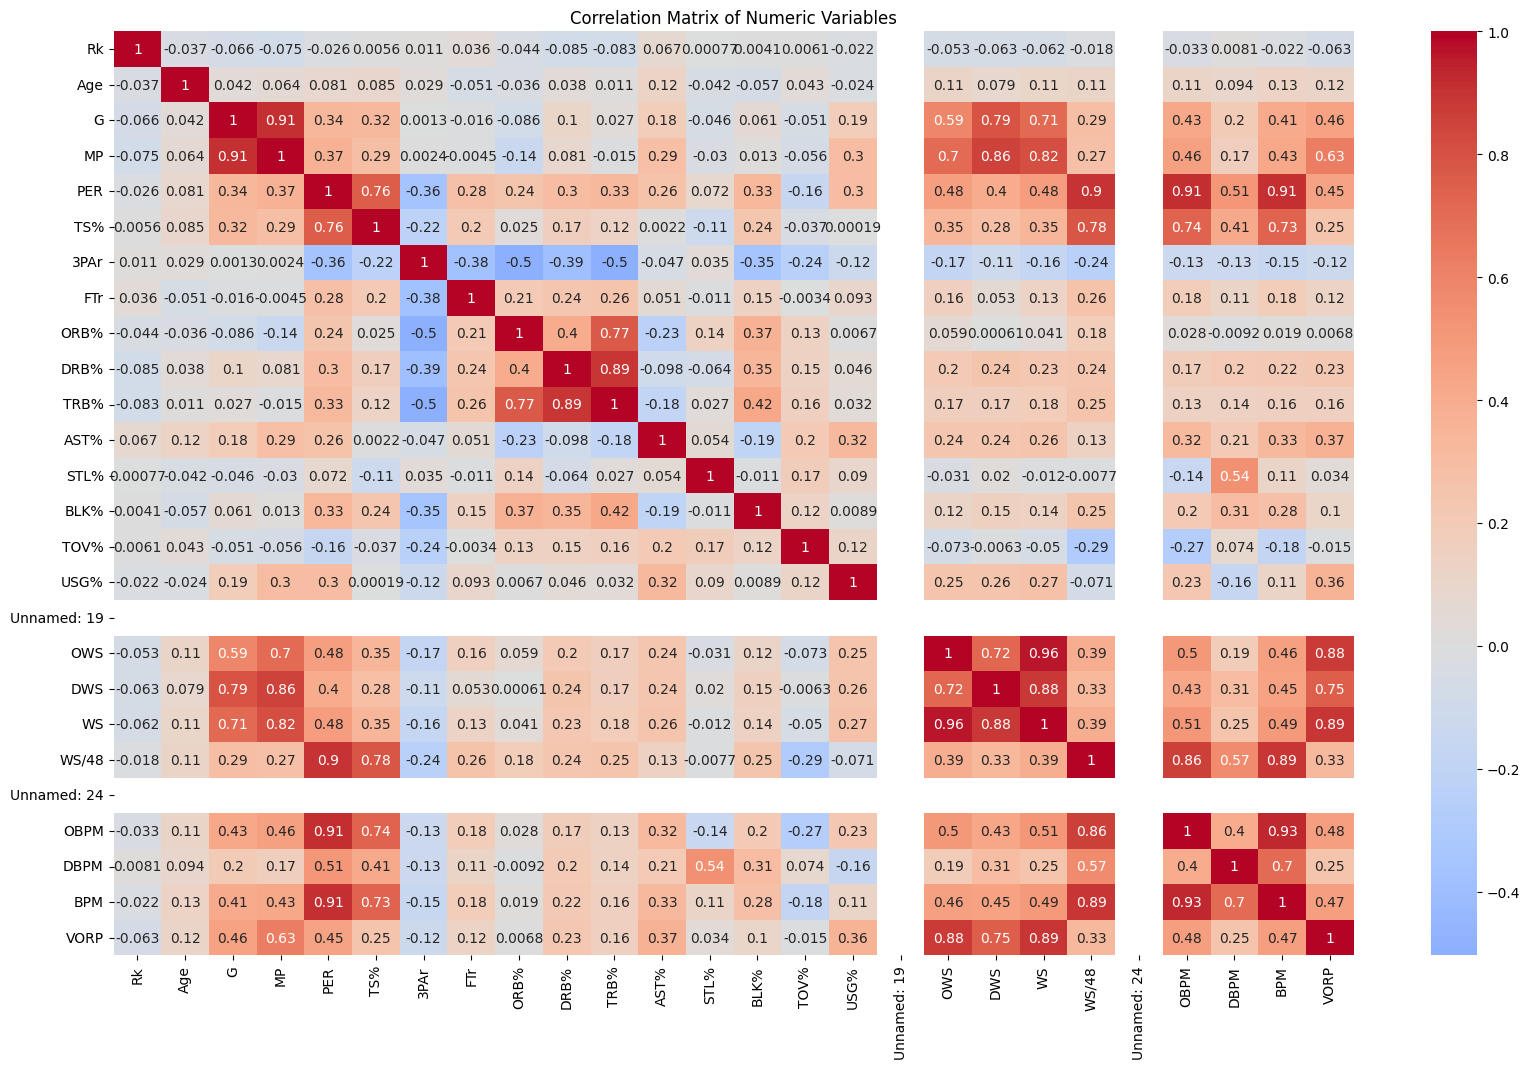

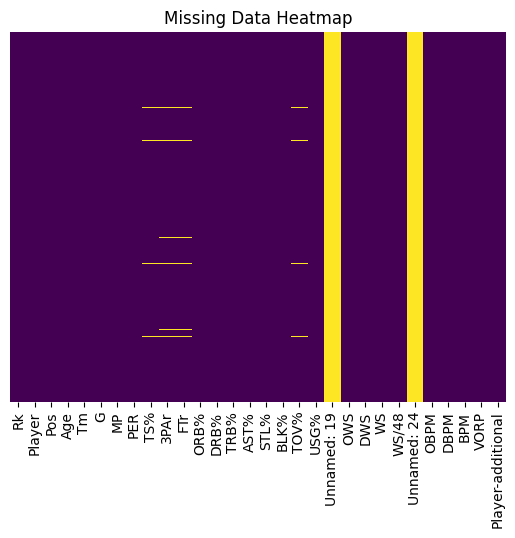

In [142]:
playersadvanced = pd.read_csv('players2021-2022advanced.csv') 

playersadvanced.info()
print("\n" * 2)

playersadvanced.isnull().sum()
print("\n" * 2)

playersadvanced.describe()
print("\n" * 2)

print(playersadvanced.describe(include='object'))

playersadvanced.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

missing_percentage = playersadvanced.isnull().sum() * 100 / len(playersadvanced)
print("Missing percentage of each column:")
print(missing_percentage)
print("\n" * 2)

numeric_columns1 = playersadvanced.select_dtypes(include=[np.number]).columns
correlation_matrix1 = playersadvanced[numeric_columns1].corr()

# Correlation matrix with heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# Missing data heatmap
sns.heatmap(playersadvanced.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [143]:
playersadvanced['Player-additional'].head(5)

0    achiupr01
1    adamsst01
2    adebaba01
3    aldamsa01
4    aldrila01
Name: Player-additional, dtype: object

In [144]:
print(correlation_matrix1)

                   Rk       Age         G        MP       PER       TS%  \
Rk           1.000000 -0.037072 -0.066462 -0.075497 -0.025939  0.005553   
Age         -0.037072  1.000000  0.041753  0.063645  0.081234  0.085472   
G           -0.066462  0.041753  1.000000  0.906446  0.340915  0.322057   
MP          -0.075497  0.063645  0.906446  1.000000  0.367386  0.294488   
PER         -0.025939  0.081234  0.340915  0.367386  1.000000  0.759412   
TS%          0.005553  0.085472  0.322057  0.294488  0.759412  1.000000   
3PAr         0.011146  0.029090  0.001271  0.002385 -0.359223 -0.218444   
FTr          0.035970 -0.050954 -0.015891 -0.004540  0.282242  0.203525   
ORB%        -0.044028 -0.035739 -0.085746 -0.138859  0.244225  0.025109   
DRB%        -0.085333  0.037666  0.103800  0.081029  0.300583  0.171769   
TRB%        -0.083459  0.011233  0.027135 -0.015360  0.327572  0.124977   
AST%         0.066638  0.123183  0.179240  0.286534  0.263124  0.002197   
STL%         0.000765 -0.

In [145]:
playersadvanced.drop(columns=['Unnamed: 19', 'Unnamed: 24', 'Player-additional'], inplace=True)


# Replace 'TOT' with the latter team and use TOT stats
def use_tot_stats(group):
    # Get the 'TOT' row for the player if it exists
    tot_row = group[group['Tm'] == 'TOT']
    if not tot_row.empty:
        # Get the last non-'TOT' team entry for the player
        latter_team = group.loc[group['Tm'] != 'TOT', 'Tm'].values[-1] if not group.loc[group['Tm'] != 'TOT'].empty else None
        # Replace 'TOT' stats with the latter team
        if latter_team:
            tot_row['Tm'] = latter_team
        return tot_row
    else:
        return group.iloc[[-1]]  # If 'TOT' is not present, return the last row

# Apply the function to your DataFrame grouped by 'Player' and 'Age'
playersadvanced_updated = playersadvanced.groupby(['Player', 'Age'], as_index=False).apply(use_tot_stats)

# Dropping duplicates and resetting index after groupby operation
playersadvanced_updated = playersadvanced_updated.drop_duplicates(subset=['Player', 'Age']).reset_index(drop=True)

# Display the result for a specific player
print(playersadvanced_updated[playersadvanced_updated['Player'] == 'D.J. Augustin'])

playersadvanced_updated['Pos'] = playersadvanced_updated['Pos'].replace({'PG': 'G', 'SG': 'G', 'PF': 'F', 'SF': 'F', 'SG-PG': 'G',  'SG-SF':'G', 'SF-SG':'F', 'PF-SF':'F', 'C-PF': 'C', 'SG-PG-SF':'G', 'PG-SG':'G'})
playersadvanced_updated.rename(columns={'Tm': 'Team', 'Pos': 'Position', 'Player': 'Name'}, inplace = True)
playersadvanced_updated = pd.get_dummies(playersadvanced_updated, columns = ['Team', 'Position'])

     Rk         Player Pos  Age   Tm   G   MP  PER   TS%   3PAr  ...  TOV%  \
101  19  D.J. Augustin  PG   34  LAL  55  883  9.7  0.61  0.739  ...  18.9   

     USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  
101  14.3  0.7  0.1  0.8  0.043  -1.2  -2.4 -3.6  -0.4  

[1 rows x 27 columns]


C:\Users\james\AppData\Local\Temp\ipykernel_20836\1354004869.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  playersadvanced_updated = playersadvanced.groupby(['Player', 'Age'], as_index=False).apply(use_tot_stats)


# players100pos: player statistics per 100 possessions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 812 non-null    int64  
 1   Player             812 non-null    object 
 2   Pos                812 non-null    object 
 3   Age                812 non-null    int64  
 4   Tm                 812 non-null    object 
 5   G                  812 non-null    int64  
 6   GS                 812 non-null    int64  
 7   MP                 812 non-null    int64  
 8   FG                 812 non-null    float64
 9   FGA                812 non-null    float64
 10  FG%                797 non-null    float64
 11  3P                 812 non-null    float64
 12  3PA                812 non-null    float64
 13  3P%                740 non-null    float64
 14  2P                 812 non-null    float64
 15  2PA                812 non-null    float64
 16  2P%                784 non

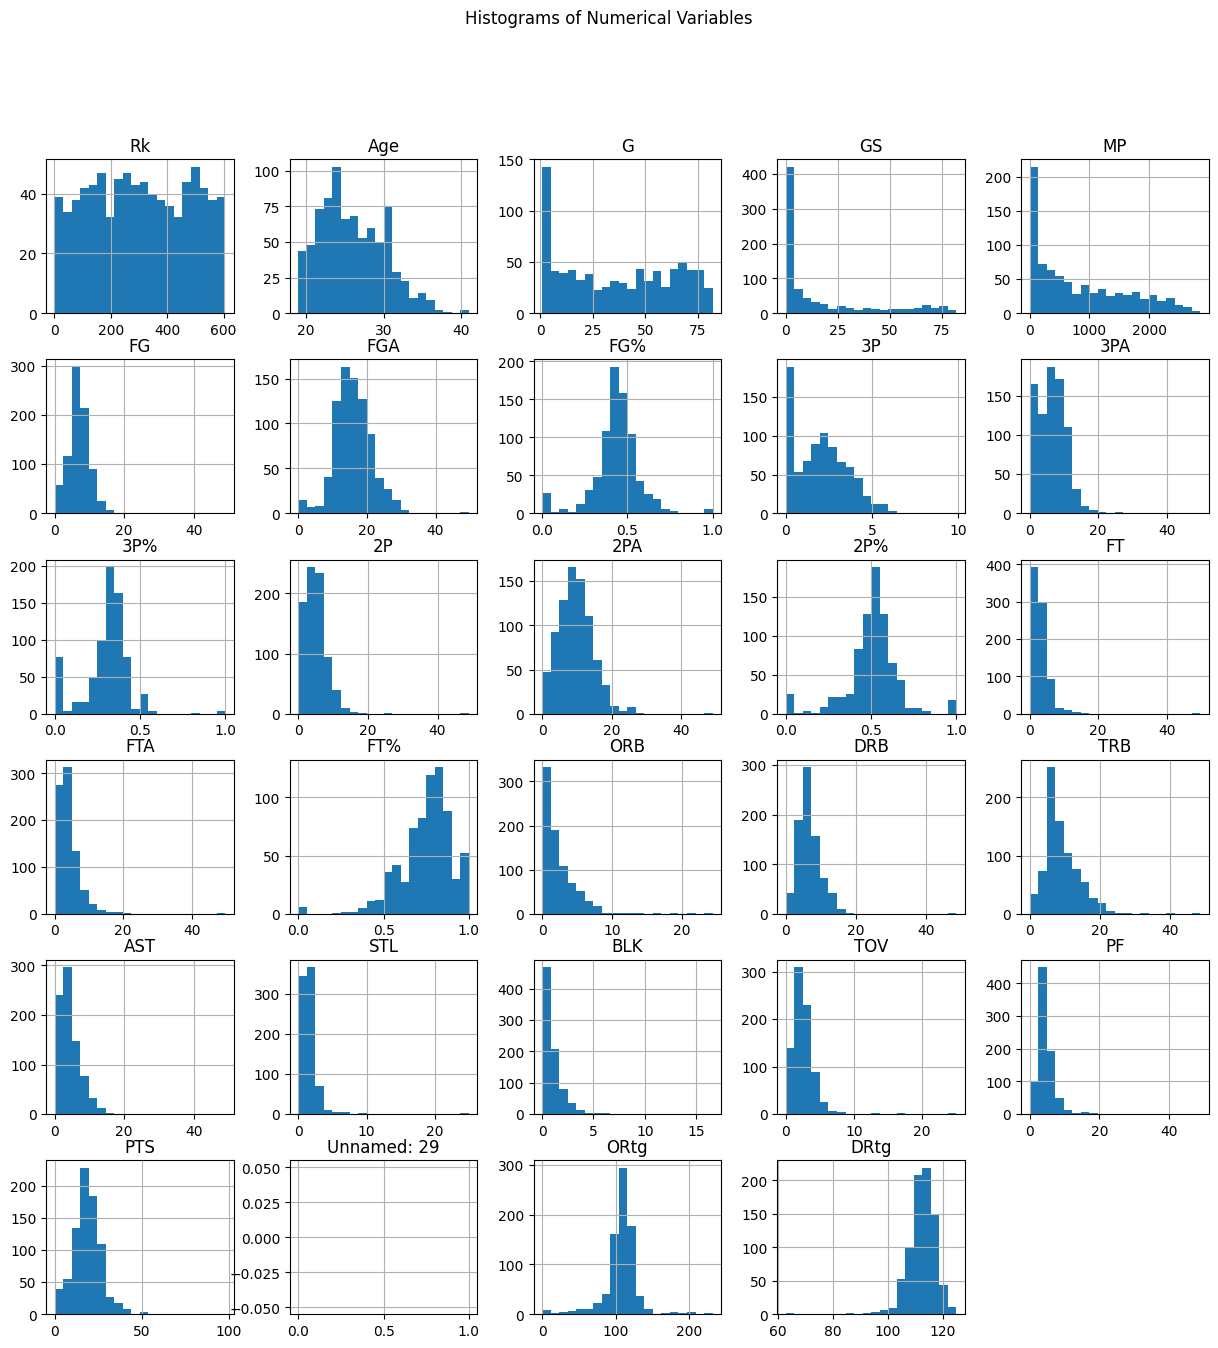

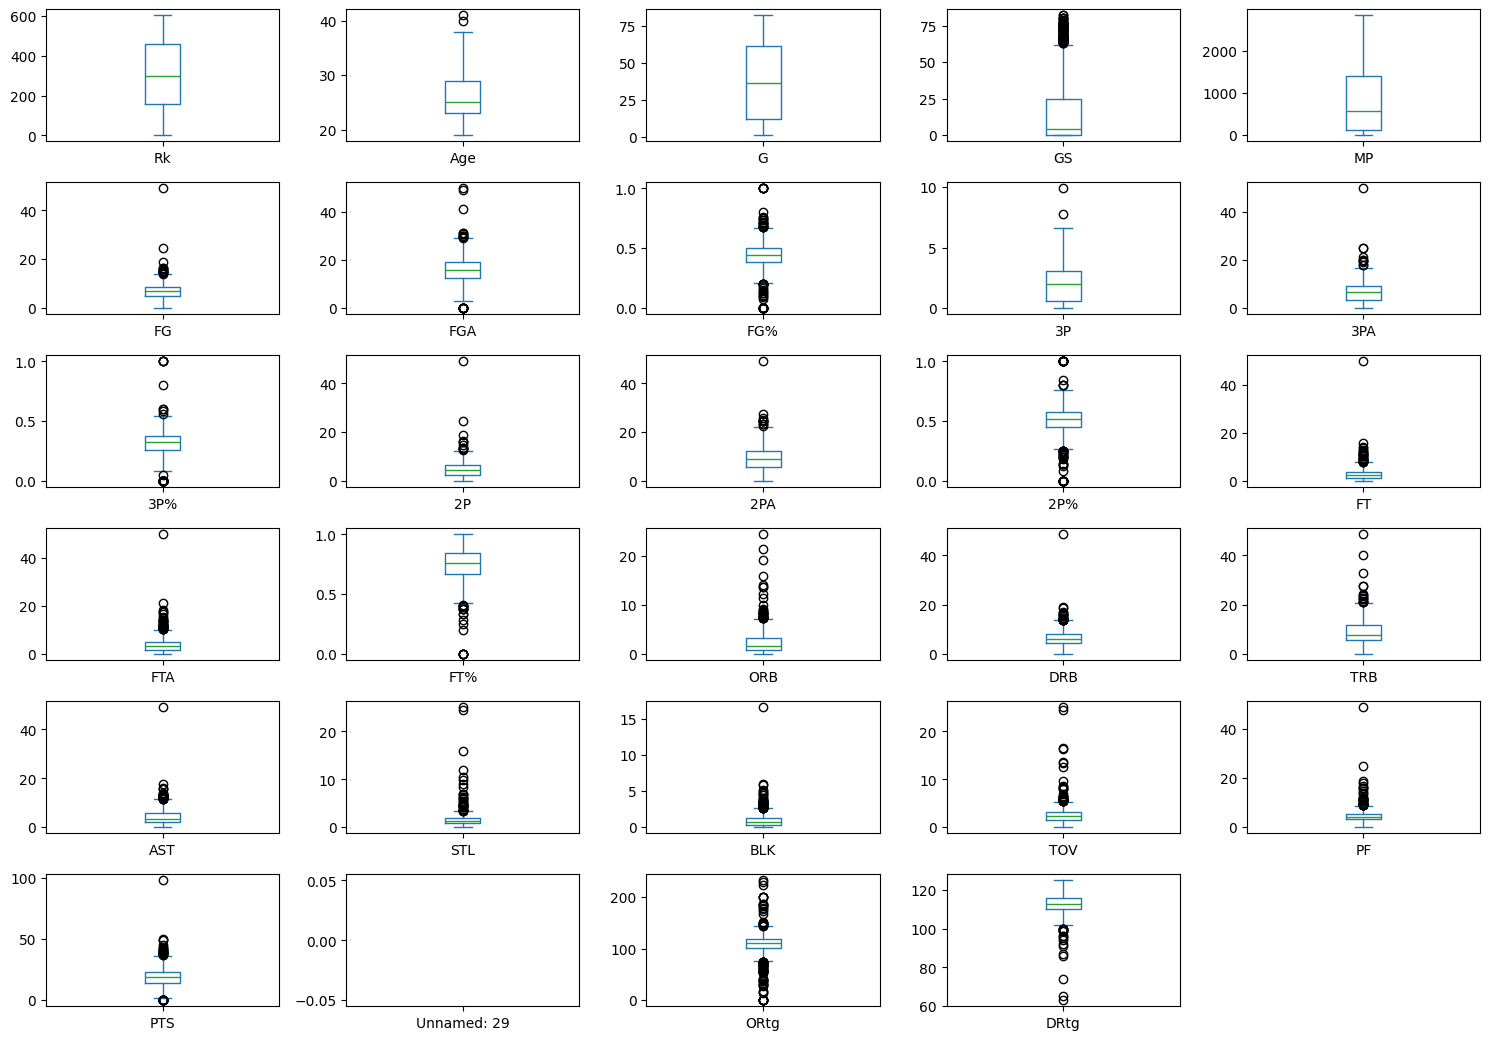

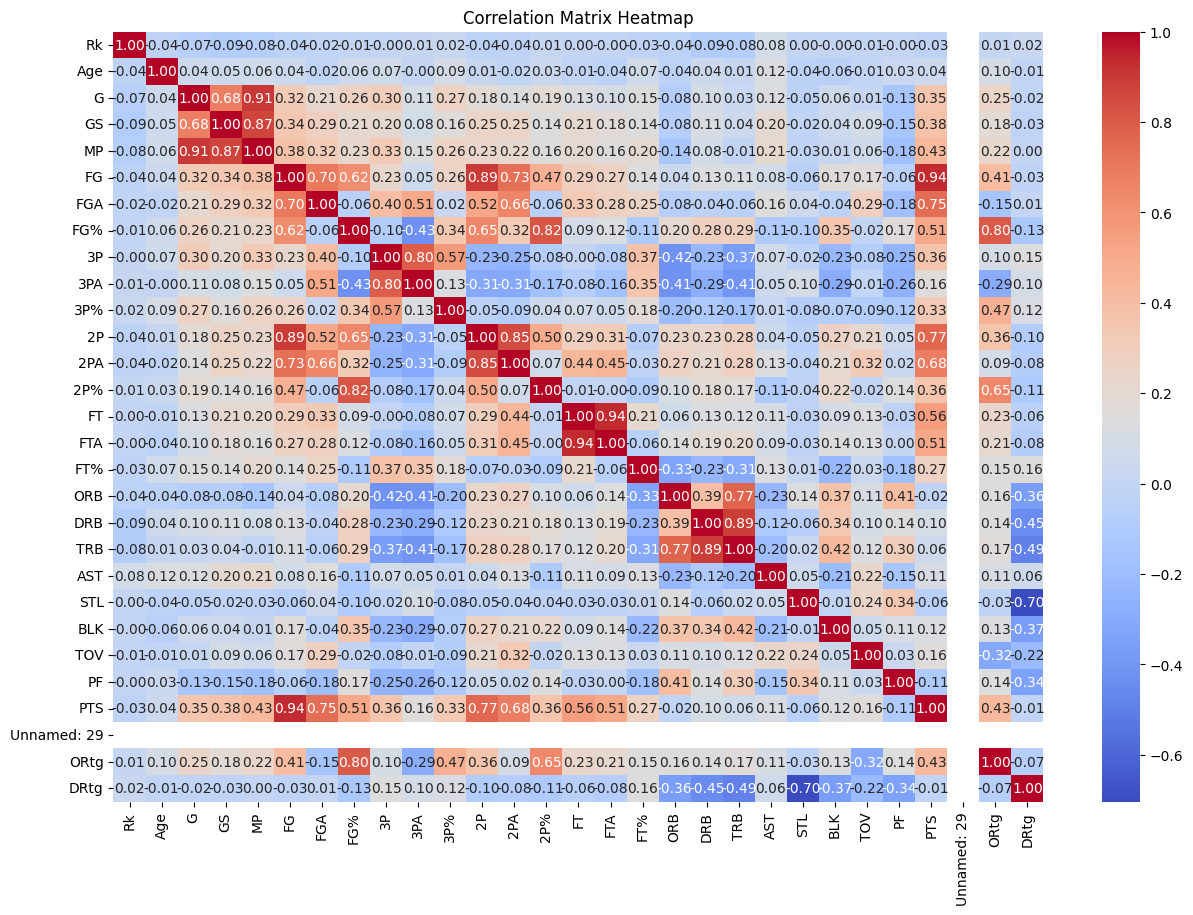

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# Load the dataset
players100pos = pd.read_csv('players2021-2022per100pos.csv')

# Initial dataset information
players100pos.info()
print("\n" * 2)

# Missing data summary
missing_values = players100pos.isnull().sum()
missing_percentage = (missing_values / len(players100pos)) * 100
print(missing_values)
print("\n")
print(missing_percentage)
print("\n" * 2)

# Initial data description for numerical features
print(players100pos.describe())

# Initial data description for categorical features
print(players100pos.describe(include='object'))

# Histograms for all numerical variables
players100pos.hist(figsize=(15, 15), bins=20)
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Boxplots for numerical variables to identify outliers
players100pos.plot(kind='box', subplots=True, layout=(ceil(len(players100pos.columns)/5), 5), figsize=(15, 12))
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
numeric_columns = players100pos.select_dtypes(include=[np.number]).columns
correlation_matrix = players100pos[numeric_columns].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [147]:
# Assuming 'playersper100possessions' is your DataFrame with per 100 possessions data
# Drop unnecessary columns first
players100pos.drop(columns=['Unnamed: 29'], inplace=True)

# Rename 'Player' to 'Name' for consistency
players100pos.rename(columns={'Player': 'Name'}, inplace=True)

# Now let's deal with 'TOT' entries
# Replace 'TOT' with the latter team and use TOT stats
def use_tot_stats_per100(group):
    # Get the 'TOT' row for the player if it exists
    tot_row = group[group['Tm'] == 'TOT']
    if not tot_row.empty:
        # Get the last non-'TOT' team entry for the player
        latter_team = group.loc[group['Tm'] != 'TOT', 'Tm'].values[-1] if not group.loc[group['Tm'] != 'TOT'].empty else None
        # Replace 'TOT' stats with the latter team
        if latter_team:
            tot_row['Tm'] = latter_team
        return tot_row
    else:
        return group.iloc[[-1]]  # If 'TOT' is not present, return the last row

# Apply the function to your DataFrame grouped by 'Name' and 'Age'
players100pos_updated = players100pos.groupby(['Name', 'Age'], as_index=False).apply(use_tot_stats_per100)

# Dropping duplicates and resetting index after groupby operation
players100pos_updated = players100pos_updated.drop_duplicates(subset=['Name', 'Age']).reset_index(drop=True)

# Add '_per100' suffix to all columns except 'Name' to denote these are per 100 possession stats
for col in players100pos_updated.columns:
    if col not in ['Name', 'Tm', 'Pos', 'Age', 'G', 'GS', 'MP']:
        players100pos_updated.rename(columns={col: col+'_per100'}, inplace=True)

C:\Users\james\AppData\Local\Temp\ipykernel_20836\2776792502.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  players100pos_updated = players100pos.groupby(['Name', 'Age'], as_index=False).apply(use_tot_stats_per100)


# playersper36

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 812 non-null    int64  
 1   Player             812 non-null    object 
 2   Pos                812 non-null    object 
 3   Age                812 non-null    int64  
 4   Tm                 812 non-null    object 
 5   G                  812 non-null    int64  
 6   GS                 812 non-null    int64  
 7   MP                 812 non-null    int64  
 8   FG                 812 non-null    float64
 9   FGA                812 non-null    float64
 10  FG%                797 non-null    float64
 11  3P                 812 non-null    float64
 12  3PA                812 non-null    float64
 13  3P%                740 non-null    float64
 14  2P                 812 non-null    float64
 15  2PA                812 non-null    float64
 16  2P%                784 non

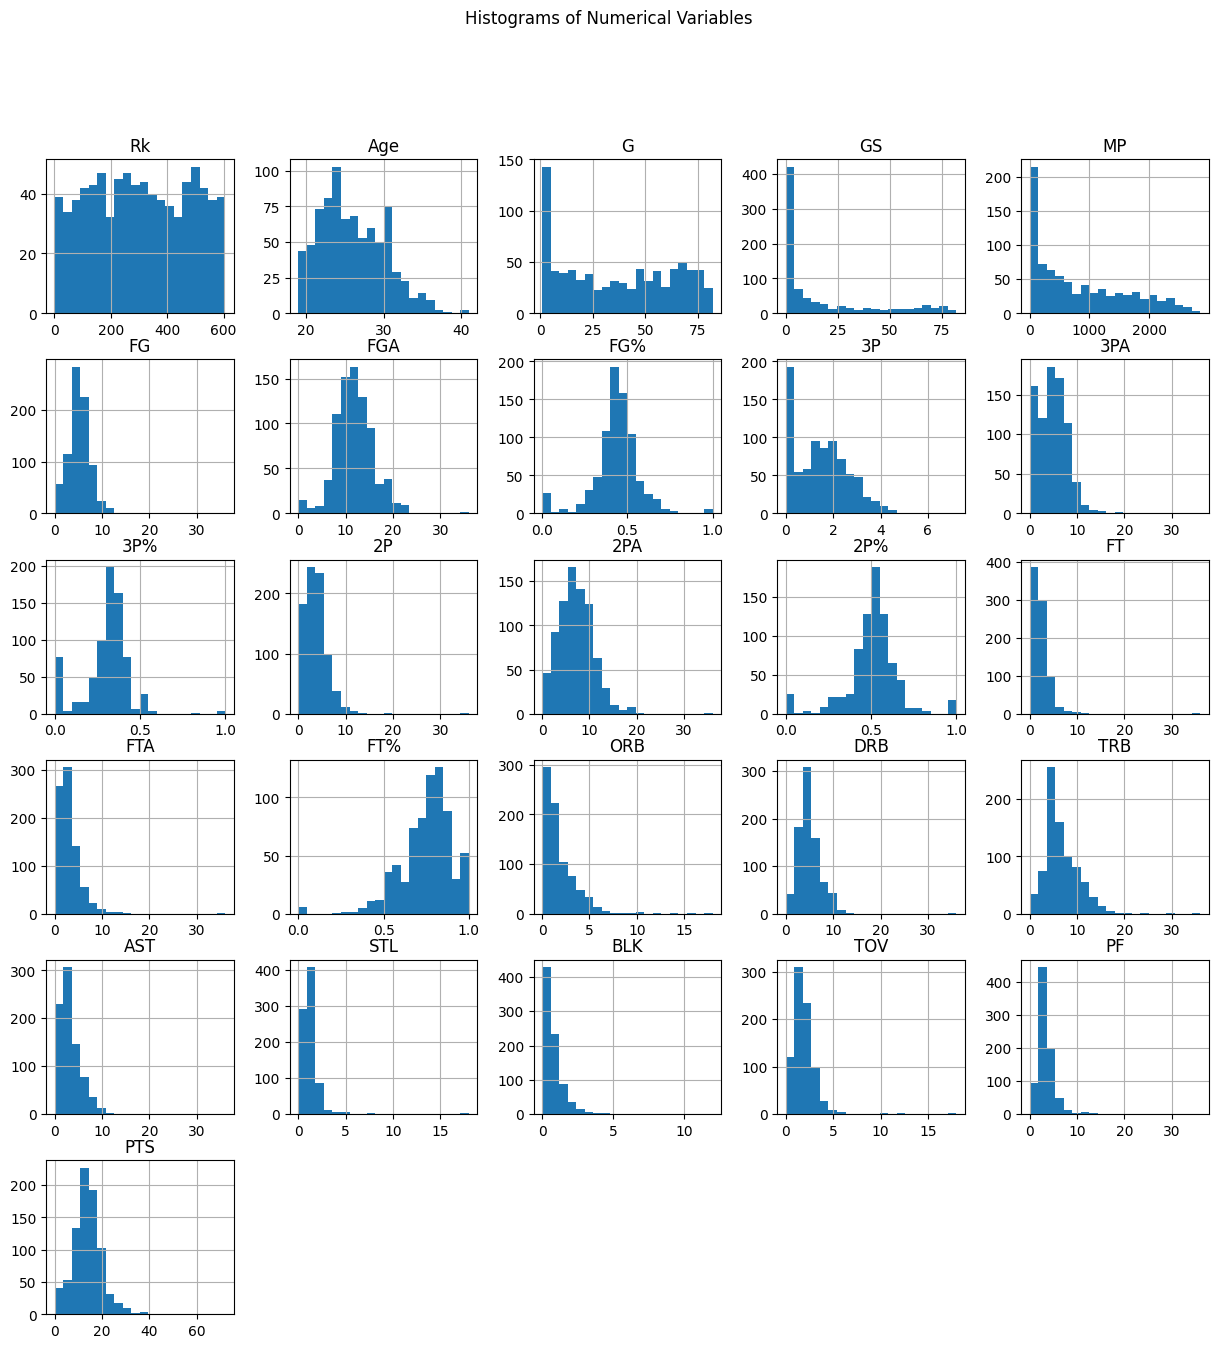

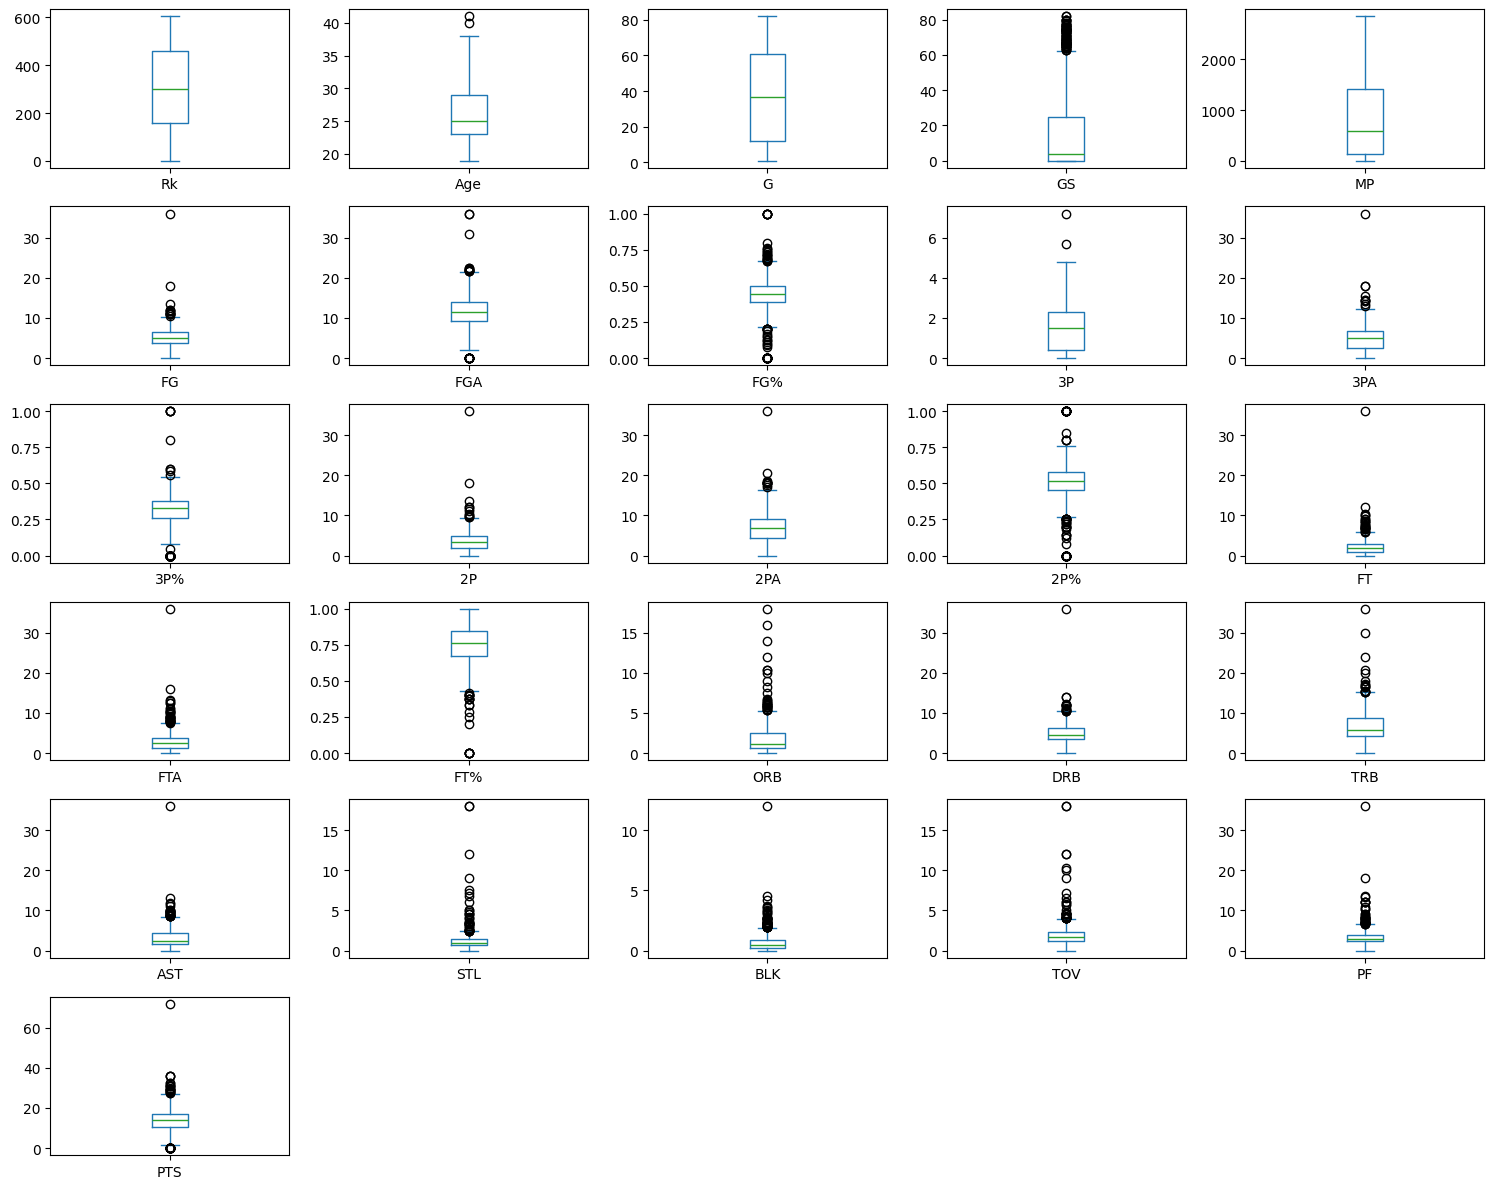

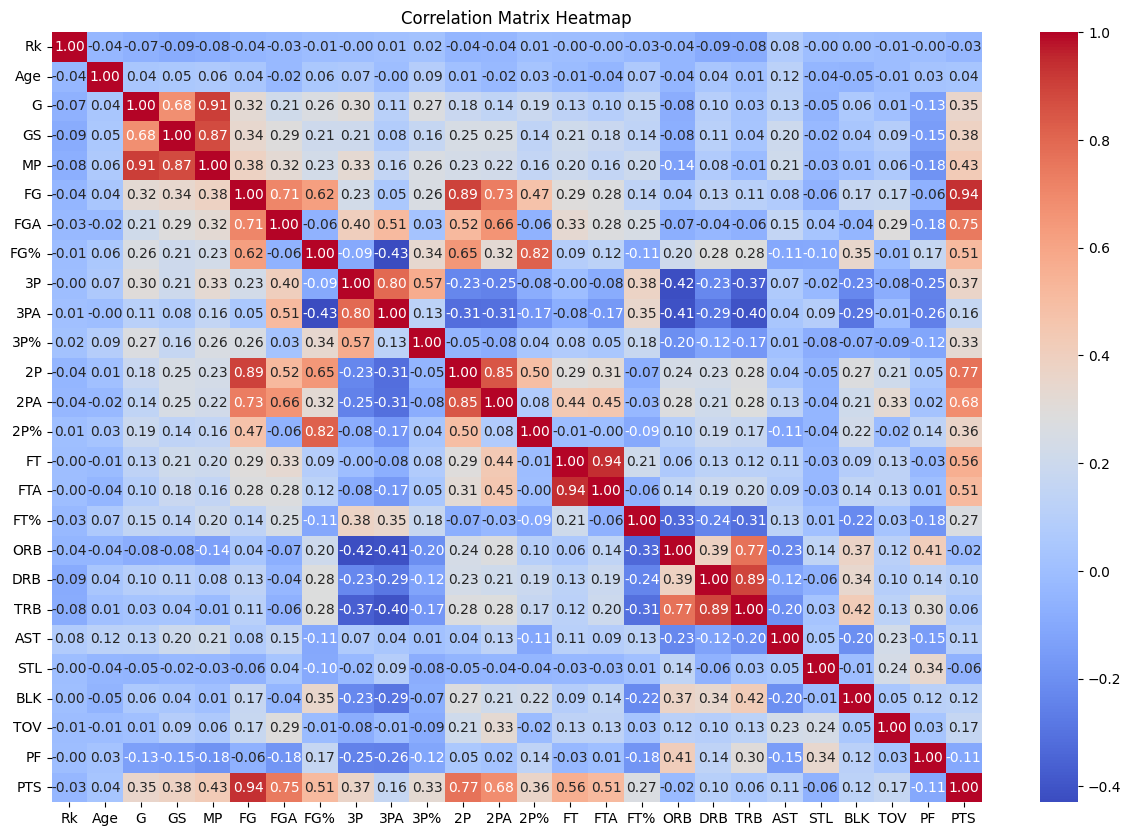

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# Load the dataset
playersper36 = pd.read_csv('players2021-2022per36.csv')

# Initial dataset information
playersper36.info()
print("\n" * 2)

# Missing data summary
missing_values = playersper36.isnull().sum()
missing_percentage = (missing_values / len(playersper36)) * 100
print(missing_values)
print("\n")
print(missing_percentage)
print("\n" * 2)

# Initial data description for numerical features
print(playersper36.describe())

# Initial data description for categorical features
print(playersper36.describe(include='object'))

# Histograms for all numerical variables
playersper36.hist(figsize=(15, 15), bins=20)
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Boxplots for numerical variables to identify outliers
playersper36.plot(kind='box', subplots=True, layout=(ceil(len(playersper36.columns)/5), 5), figsize=(15, 12))
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
numeric_columns = playersper36.select_dtypes(include=[np.number]).columns
correlation_matrix = playersper36[numeric_columns].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [149]:
# Assuming playersper36 is your DataFrame with per 36 minutes stats

# Drop any unnecessary columns if they exist in playersper36
# playersper36.drop(columns=['UnnecessaryColumn1', 'UnnecessaryColumn2'], inplace=True)

# Replace 'TOT' with the latter team and use TOT stats, as done for playersadvanced
playersper36_updated = playersper36.groupby(['Player', 'Age'], as_index=False).apply(use_tot_stats)

# Dropping duplicates and resetting index after groupby operation
playersper36_updated = playersper36_updated.drop_duplicates(subset=['Player', 'Age']).reset_index(drop=True)

# Rename columns for merging
playersper36_updated.rename(columns={'Player': 'Name', 'Tm': 'Team', 'Pos': 'Position'}, inplace=True)

rename_dict_per36 = {
    'FG': 'FG_per36', 
    'FGA': 'FGA_per36', 
    'FG%': 'FG%_per36', 
    '3P': '3P_per36', 
    '3PA': '3PA_per36', 
    '3P%': '3P%_per36', 
    '2P': '2P_per36', 
    '2PA': '2PA_per36', 
    '2P%': '2P%_per36', 
    'FT': 'FT_per36', 
    'FTA': 'FTA_per36', 
    'FT%': 'FT%_per36', 
    'ORB': 'ORB_per36', 
    'DRB': 'DRB_per36', 
    'TRB': 'TRB_per36', 
    'AST': 'AST_per36', 
    'STL': 'STL_per36', 
    'BLK': 'BLK_per36', 
    'TOV': 'TOV_per36', 
    'PF': 'PF_per36', 
    'PTS': 'PTS_per36'
}

playersper36_updated.rename(columns=rename_dict_per36, inplace=True)

# Select relevant columns for merging
per36_stats_columns = ['Name', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', 
                       '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 
                       'TOV', 'PF', 'PTS']

# Ensure the Name column is formatted the same way
per36_stats_columns = ['Name'] + [f"{stat}_per36" for stat in ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]

playersper36_updated.head()

C:\Users\james\AppData\Local\Temp\ipykernel_20836\2970816584.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  playersper36_updated = playersper36.groupby(['Player', 'Age'], as_index=False).apply(use_tot_stats)


Rk           Name Position  Age Team   G  GS    MP  FG_per36  FGA_per36  \
0  198   Aaron Gordon       PF   26  DEN  75  75  2376       6.6       12.6   
1  233    Aaron Henry       SF   22  PHI   6   0    17       2.1       10.6   
2  244  Aaron Holiday       PG   25  PHO  63  15  1021       5.3       11.9   
3  406  Aaron Nesmith       SF   22  BOS  52   3   574       4.5       11.4   
4  581  Aaron Wiggins       SG   23  OKC  50  35  1209       4.6       10.0   

   ...  ORB_per36  DRB_per36  TRB_per36  AST_per36  STL_per36  BLK_per36  \
0  ...        1.9        4.8        6.7        2.8        0.7        0.7   
1  ...        0.0        2.1        2.1        0.0        0.0        4.2   
2  ...        0.8        3.5        4.3        5.4        1.5        0.3   
3  ...        0.9        4.6        5.6        1.4        1.3        0.3   
4  ...        1.5        3.8        5.3        2.0        0.9        0.3   

   TOV_per36  PF_per36  PTS_per36  Player-additional  
0        2.0       2.2       17.1          gordoaa01  
1        4.2       4.2        4.2          henryaa01  
2        2.4       3.2       14.1          holidaa01  
3        1.9       4.4       12.3          nesmiaa01  
4        1.6       2.8       12.4          wiggiaa01  

[5 rows x 30 columns]

# Further Data Preprocessing, Transforming and Feature Building to obtain final_df

In [150]:
# Function to update 'TOT' to the latter team (assuming data is ordered)
def update_tot_to_latter(group):
    # If 'TOT' is present in the group
    if 'TOT' in group['Team'].values:
        # Get the last non-'TOT' team entry for the player
        latter_team = group.loc[group['Team'] != 'TOT', 'Team'].values[-1] if not group.loc[group['Team'] != 'TOT'].empty else None
        # Replace 'TOT' with the latter team
        if latter_team:
            group['Team'] = group['Team'].replace('TOT', latter_team)
    return group

# Apply the function to your DataFrame grouped by 'Player' and 'Age'
players2_df_updated = players2_df.groupby(['Name', 'Age'], group_keys=False).apply(update_tot_to_latter)

players2_df_updated = players2_df_updated.drop_duplicates(subset=['Name', 'Age'], keep='last')

# Proceed with your aggregation logic
players2_agg = players2_df_updated.groupby(['Name', 'Age']).agg({
    'G': 'mean', 'GS': 'mean', 'MP': 'mean', 'FG': 'mean', 'FGA': 'mean',
    'FG%': 'mean', '3P': 'mean', '3PA': 'mean', '3P%': 'mean',
    '2P': 'mean', '2PA': 'mean', '2P%': 'mean', 'eFG%': 'mean',
    'FT': 'mean', 'FTA': 'mean', 'FT%': 'mean', 'ORB': 'mean',
    'DRB': 'mean', 'TRB': 'mean', 'AST': 'mean', 'STL': 'mean',
    'BLK': 'mean', 'TOV': 'mean', 'PF': 'mean', 'PTS': 'mean'
}).reset_index()


# Add 'Team' and 'Position' back to the aggregated dataframe
players2_agg = players2_agg.merge(players2_df_updated[['Name', 'Age', 'Team', 'Position']].drop_duplicates(), on=['Name', 'Age'], how='left')

# Verify no duplicates are introduced
assert players2_agg.duplicated(subset=['Name', 'Age']).sum() == 0, "Duplicates found after merging Team and Position"

# Merging aggregated stats with players_df and standings_df as described previously
combined_df = pd.merge(players2_agg, players_df[['Name', 'Weight', 'Salary']], on='Name', how='left')
combined_df = pd.merge(combined_df, standings_df[['Team', 'Overall']].drop_duplicates(), on='Team', how='left')

# Print or inspect the combined_df
combined_df.head().T

C:\Users\james\AppData\Local\Temp\ipykernel_20836\2564381169.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  players2_df_updated = players2_df.groupby(['Name', 'Age'], group_keys=False).apply(update_tot_to_latter)


0               1              2              3  \
Name      Aaron Gordon     Aaron Henry  Aaron Holiday  Aaron Nesmith   
Age           0.318182        0.136364       0.272727       0.136364   
G              0.91358        0.061728       0.259259        0.62963   
GS            4.330733             0.0       0.693147       1.386294   
MP            0.722353        0.042353           0.36       0.235294   
FG            1.916923        0.182322       1.193922       0.875469   
FGA           2.493205        0.587787        1.88707       1.504077   
FG%               0.52             0.2          0.411          0.396   
3P                 1.2             0.0            0.7            0.6   
3PA                3.5             0.2            1.6            2.2   
3P%              0.335             0.0          0.444           0.27   
2P                 4.6             0.2            1.6            0.8   
2PA                7.7             0.7            4.0            1.3   
2P%              0.605            0.25          0.398          0.612   
eFG%             0.573             0.2          0.476          0.481   
FT            1.193922             0.0       0.875469       0.336472   
FTA           1.410987             0.0       0.916291       0.405465   
FT%              0.743             0.0          0.939          0.808   
ORB           0.993252             0.0       0.530628       0.262364   
DRB           1.648659        0.182322       1.029619       0.875469   
TRB           1.931521        0.182322       1.252763       0.993252   
AST           1.252763             0.0       1.481605       0.336472   
STL           0.470004             0.0       0.587787       0.336472   
BLK           0.470004        0.262364            0.0        0.09531   
TOV           1.029619        0.262364       0.832909       0.470004   
PF            1.098612        0.262364       0.916291       0.832909   
PTS           2.772589        0.262364       2.054124       1.568616   
Team               DEN             PHI            PHO            BOS   
Position             F               F              G              F   
Weight           235.0           210.0          185.0          215.0   
Salary      16409091.0  7667240.304813      3980551.0      3631200.0   
Overall            NaN             NaN            NaN            NaN   

                       4  
Name       Aaron Wiggins  
Age             0.181818  
G               0.604938  
GS              3.583519  
MP              0.545882  
FG              1.410987  
FGA              2.04122  
FG%                0.463  
3P                   0.8  
3PA                  2.8  
3P%                0.304  
2P                   2.3  
2PA                  4.0  
2P%                0.573  
eFG%               0.525  
FT              0.788457  
FTA             0.993252  
FT%                0.729  
ORB             0.693147  
DRB             1.252763  
TRB             1.526056  
AST             0.875469  
STL             0.470004  
BLK             0.182322  
TOV             0.741937  
PF              1.064711  
PTS             2.230014  
Team                 OKC  
Position               G  
Weight             190.0  
Salary    8913886.701923  
Overall              NaN

In [151]:
combined_df.info()

combined_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      606 non-null    object 
 1   Age       606 non-null    float64
 2   G         606 non-null    float64
 3   GS        606 non-null    float64
 4   MP        606 non-null    float64
 5   FG        606 non-null    float64
 6   FGA       606 non-null    float64
 7   FG%       606 non-null    float64
 8   3P        606 non-null    float64
 9   3PA       606 non-null    float64
 10  3P%       606 non-null    float64
 11  2P        606 non-null    float64
 12  2PA       606 non-null    float64
 13  2P%       606 non-null    float64
 14  eFG%      606 non-null    float64
 15  FT        606 non-null    float64
 16  FTA       606 non-null    float64
 17  FT%       606 non-null    float64
 18  ORB       606 non-null    float64
 19  DRB       606 non-null    float64
 20  TRB       606 non-null    float6

Name          0
Age           0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Team          0
Position      0
Weight      140
Salary      140
Overall     606
dtype: int64

In [152]:
combined_df_edited = combined_df[
    (combined_df['Weight'].isnull() | (combined_df['Weight'] == 0)) |
    (combined_df['Salary'].isnull() | (combined_df['Salary'] == 0)) ]


combined_df_edited.head(5).T

6                  7            8           11  \
Name      Ade Murkey  Admiral Schofield  Ahmad Caver  Aleem Ford   
Age         0.227273           0.227273     0.272727    0.227273   
G                0.0            0.45679          0.0    0.049383   
GS               0.0           0.693147          0.0         0.0   
MP               0.0           0.265882          0.0    0.324706   
FG               0.0           0.875469     0.693147    0.788457   
FGA              0.0           1.481605     0.693147    1.609438   
FG%              0.0              0.419          1.0         0.3   
3P               0.0                0.7          0.0         0.4   
3PA              0.0                2.1          0.0         3.0   
3P%              0.0              0.329          0.0       0.133   
2P               0.0                0.7          1.0         0.8   
2PA              0.0                1.3          1.0         1.0   
2P%              0.0               0.56          1.0         0.8   
eFG%             0.0              0.519          1.0        0.35   
FT               0.0           0.262364          0.0         0.0   
FTA              0.0           0.336472          0.0         0.0   
FT%              0.0                0.8          0.0         0.0   
ORB              0.0           0.336472          0.0    0.336472   
DRB              0.0           1.064711          0.0    1.280934   
TRB              0.0           1.193922          0.0    1.386294   
AST              0.0           0.530628          0.0    0.336472   
STL              0.0            0.09531          0.0    0.182322   
BLK              0.0            0.09531          0.0         0.0   
TOV              0.0           0.470004          0.0    0.587787   
PF               0.0           0.916291          0.0    0.875469   
PTS              0.0           1.568616     1.098612    1.335001   
Team             SAC                ORL          IND         ORL   
Position           G                  F            G           F   
Weight           NaN                NaN          NaN         NaN   
Salary           NaN                NaN          NaN         NaN   
Overall          NaN                NaN          NaN         NaN   

                        15  
Name      Alfonzo McKinnie  
Age               0.454545  
G                 0.197531  
GS                1.386294  
MP                0.261176  
FG                0.875469  
FGA               1.526056  
FG%                  0.393  
3P                     0.5  
3PA                    1.6  
3P%                  0.333  
2P                     0.9  
2PA                    2.0  
2P%                  0.441  
eFG%                 0.467  
FT                 0.09531  
FTA               0.405465  
FT%                   0.25  
ORB               0.587787  
DRB               0.788457  
TRB               1.064711  
AST               0.262364  
STL                0.09531  
BLK               0.182322  
TOV               0.336472  
PF                0.916291  
PTS               1.504077  
Team                   CHI  
Position                 F  
Weight                 NaN  
Salary                 NaN  
Overall                NaN

In [153]:
cols_stats = ['PTS', 'TRB', 'AST']

# Scenario 2: If all NaN (new player), fill all with 0
# This checks if all the specified columns are NaN, and if so, fills them with 0
combined_df.loc[combined_df[cols_stats + ['Salary']].isnull().all(axis=1), cols_stats + ['Salary']] = 0

# Scenario 1: If have points/rebounds/assists, fill salary by position average
# Temporarily fill NaN Salaries with 0 for those without any stats to avoid affecting the mean calculation
temp_salary_filled = combined_df['Salary'].fillna(0)
combined_df.loc[:, 'Salary'] = combined_df.groupby('Position')['Salary'].transform(lambda x: x.fillna(x.mean()))

# Correct any 0 values filled temporarily for salary with the actual mean of the position
combined_df.loc[combined_df['Salary'] == 0, 'Salary'] = combined_df.groupby('Position')['Salary'].transform('mean')

# Calculate the average weight for each position
position_avg_weight = combined_df.groupby('Position')['Weight'].mean()

# Function to apply position average weight where weight is missing
def fill_weight(row):
    if pd.isnull(row['Weight']):
        return position_avg_weight[row['Position']]
    else:
        return row['Weight']

# Apply the function across the dataframe
combined_df['Weight'] = combined_df.apply(fill_weight, axis=1)

combined_df = combined_df.drop('Overall', axis =1)

In [154]:
injury_df['Date'] = pd.to_datetime(injury_df['Date'], dayfirst=True)
injury_df.sort_values(by='Date', inplace=True)

for injury_part in ['ankle', 'hamstring', 'shoulder', 'elbow', 'knee', 'calf', 'finger', 'back', 'fracture', 'hip', 'toe']:
    injury_df[f'{injury_part}_injury'] = injury_df['Notes'].str.contains(injury_part, case=False, na=False).astype(int)

injury_parts = ['ankle', 'hamstring', 'shoulder', 'elbow', 'knee', 'calf', 'finger', 'back', 'fracture', 'hip', 'toe']
agg_injury_data = injury_df.groupby('Name')[[f'{part}_injury' for part in injury_parts]].sum().reset_index()

def label_severity(note):
    if '(DTD)' in note:
        return 'Day-to-Day'
    elif 'placed on IL' in note:
        return 'Injured List'
    elif 'out for season' in note or 'out indefinitely' in note:
        return 'Out for Season/Indefinitely'
    else:
        return 'Unknown'
    
def label_severity_numeric(note):
    if 'DTD' in note:
        return 1  # Day-to-Day
    elif 'placed on IL' in note:
        return 2  # Injured List
    elif 'out for season' in note or 'out indefinitely' in note:
        return 3  # Out for Season/Indefinitely
    else:
        return 0  # Unknown

injury_df['Injury Severity'] = injury_df['Notes'].apply(label_severity)
injury_df['Injury Severity Numeric'] = injury_df['Notes'].apply(label_severity_numeric)

severity_pivot = injury_df.pivot_table(index='Name', columns='Injury Severity', aggfunc='size', fill_value=0)
severity_pivot.columns = [column.replace(" ", "_") for column in severity_pivot.columns]  # Optional: Make column names code-friendly
severity_pivot.reset_index(inplace=True)

final_df = pd.merge(combined_df, agg_injury_data, on='Name', how='left')
final_df = pd.merge(final_df, severity_pivot, on='Name', how='left')

In [155]:
final_df.isnull().sum()

Name                             0
Age                              0
G                                0
GS                               0
MP                               0
FG                               0
FGA                              0
FG%                              0
3P                               0
3PA                              0
3P%                              0
2P                               0
2PA                              0
2P%                              0
eFG%                             0
FT                               0
FTA                              0
FT%                              0
ORB                              0
DRB                              0
TRB                              0
AST                              0
STL                              0
BLK                              0
TOV                              0
PF                               0
PTS                              0
Team                             0
Position            

In [156]:
# List of columns for which to count occurrences
columns_to_count = [
    'ankle_injury', 'hamstring_injury', 'shoulder_injury', 'knee_injury',
    'calf_injury', 'finger_injury', 'elbow_injury', 'back_injury', 'fracture_injury',
    'hip_injury', 'toe_injury', 'Day-to-Day', 'Injured_List',
    'Out_for_Season/Indefinitely', 'Unknown'
]

# Counting occurrences for each column and storing them in a dictionary
occurrences_count = {col: final_df[col].sum() for col in columns_to_count}

# Printing the counts
for injury_type, count in occurrences_count.items():
    print(f"{injury_type}: {count}")

ankle_injury: 771.0
hamstring_injury: 180.0
shoulder_injury: 217.0
knee_injury: 757.0
calf_injury: 87.0
finger_injury: 93.0
elbow_injury: 49.0
back_injury: 262.0
fracture_injury: 232.0
hip_injury: 156.0
toe_injury: 75.0
Day-to-Day: 1420.0
Injured_List: 2354.0
Out_for_Season/Indefinitely: 429.0
Unknown: 3764.0


In [157]:
final_df_descriptive = final_df.copy()
final_df_descriptive = final_df_descriptive.fillna(0)
final_df_predictive = final_df.copy()

# Calculating position averages for each injury type
position_averages = final_df_predictive.groupby('Position')[[
    'ankle_injury', 'hamstring_injury', 'shoulder_injury', 'knee_injury',
    'calf_injury', 'finger_injury', 'back_injury', 'fracture_injury',
    'hip_injury', 'toe_injury', 'Day-to-Day', 'Injured_List',
    'Out_for_Season/Indefinitely', 'Unknown'
]].mean()

# Filling missing values with position averages
for col in position_averages.columns:
    final_df_predictive[col] = final_df_predictive.groupby('Position')[col].transform(lambda x: x.fillna(x.mean()))

final_df_predictive = pd.get_dummies(final_df_predictive, columns = ['Team', 'Position'])

# Objective 1

<Axes: xlabel='Year'>

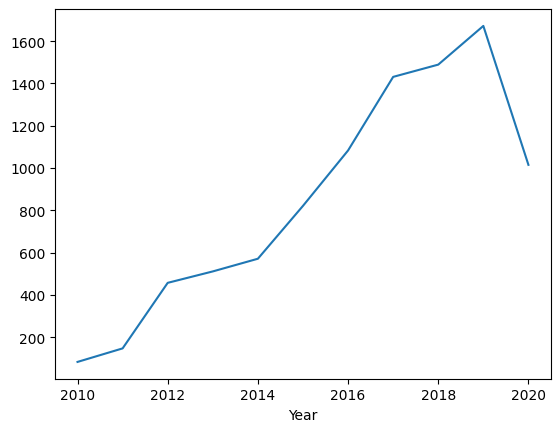

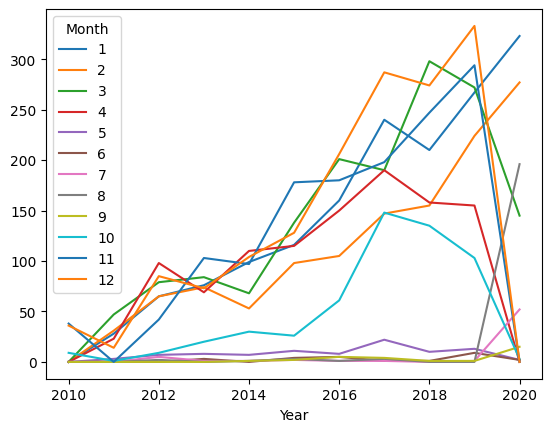

In [158]:
injury_df['Date'] = pd.to_datetime(injury_df['Date'])

# Group by year and month, then count injuries
injury_df['Year'] = injury_df['Date'].dt.year
injury_df['Month'] = injury_df['Date'].dt.month

yearly_injury_trends = injury_df.groupby('Year').size()
yearly_injury_trends.plot(kind='line')

monthly_injuries = injury_df.groupby(['Year', 'Month']).size().unstack(fill_value=0)
monthly_injuries.plot(kind='line')

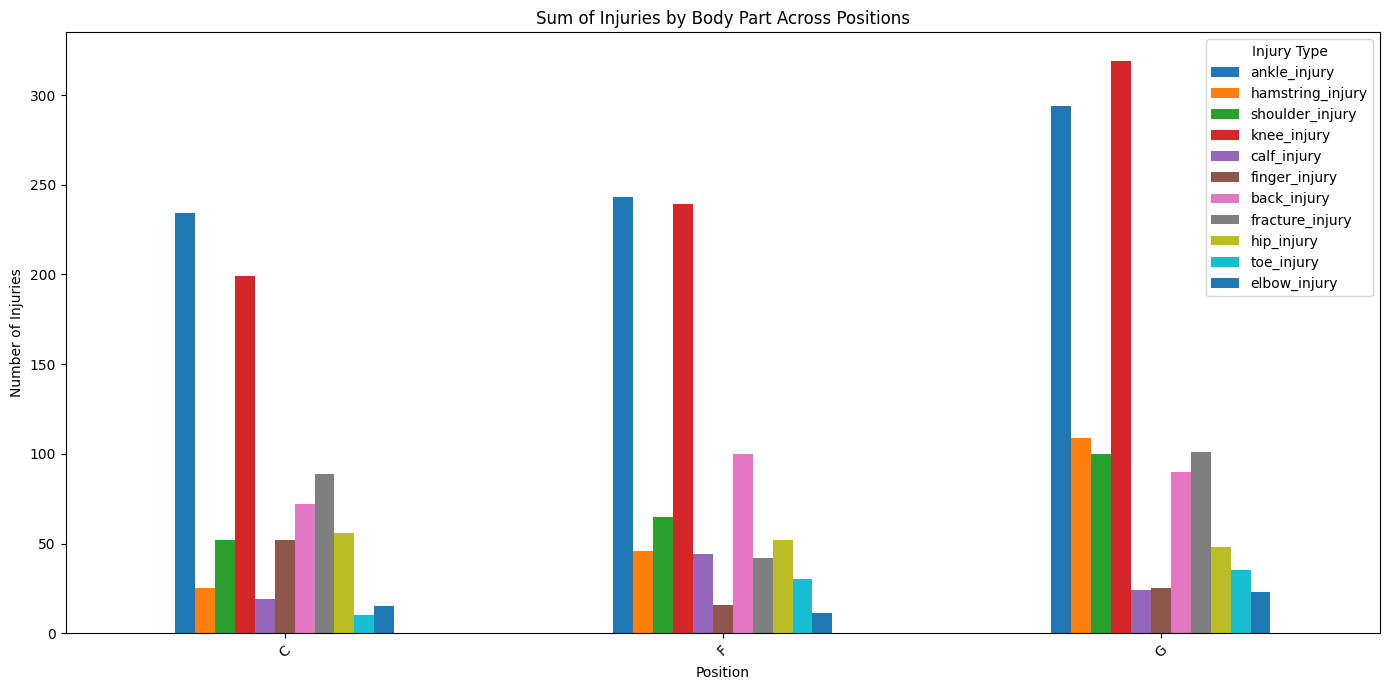

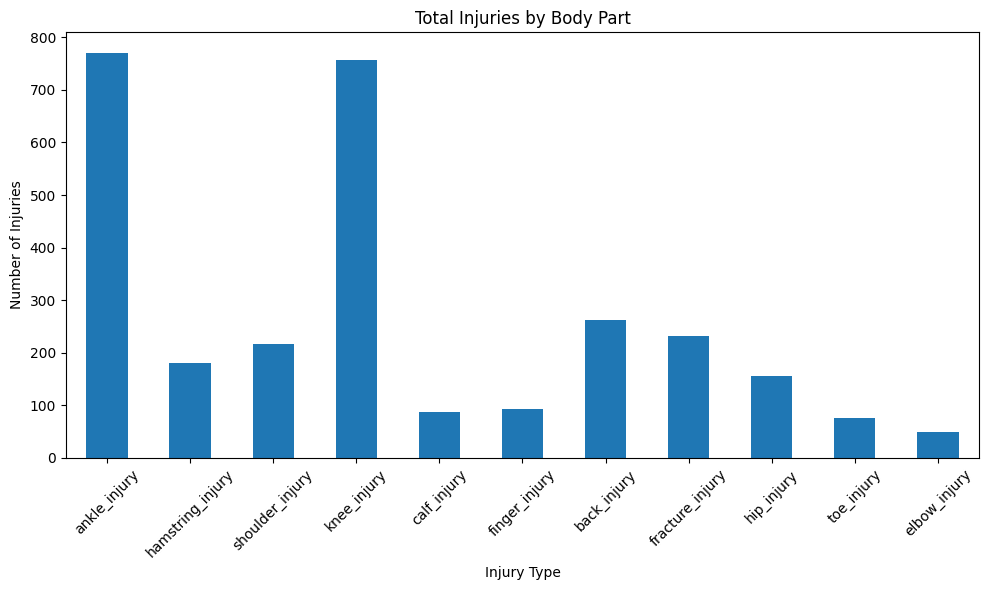

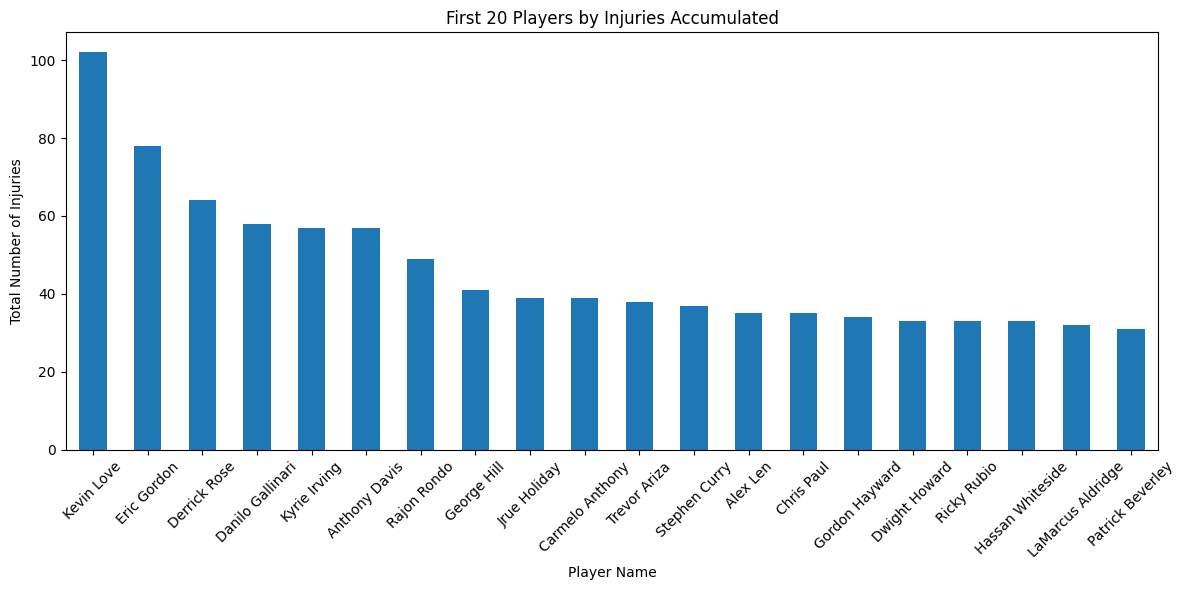

In [229]:
injury_parts = ['ankle_injury', 'hamstring_injury', 'shoulder_injury', 'knee_injury', 'calf_injury', 'finger_injury', 'back_injury', 'fracture_injury', 'hip_injury', 'toe_injury', 'elbow_injury']
injury_by_position = final_df_descriptive.groupby('Position')[injury_parts].sum()
injury_totals = final_df_descriptive[injury_parts].sum()
final_df_descriptive['Total Injuries'] = final_df_descriptive[injury_parts].sum(axis=1)
player_injury_freq = final_df_descriptive.groupby('Name')['Total Injuries'].sum().sort_values(ascending=False)

import matplotlib.pyplot as plt

# Plotting sum of each injury part by player position
injury_by_position.plot(kind='bar', figsize=(14, 7))
plt.title('Sum of Injuries by Body Part Across Positions')
plt.ylabel('Number of Injuries')
plt.xlabel('Position')
plt.xticks(rotation=45)
plt.legend(title='Injury Type')
plt.tight_layout()
plt.show()

# Plotting total injuries by injury part
injury_totals.plot(kind='bar', figsize=(10, 6))
plt.title('Total Injuries by Body Part')
plt.ylabel('Number of Injuries')
plt.xlabel('Injury Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Players with the highest frequency of injuries
top_injured_players = player_injury_freq.head(20)  # Limiting to top 20 for readability

top_injured_players.plot(kind='bar', figsize=(12, 6))
plt.title('First 20 Players by Injuries Accumulated')
plt.ylabel('Total Number of Injuries')
plt.xlabel('Player Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [160]:
# Convert top_injured_players (Series) to DataFrame for merging
top_injured_players_df = top_injured_players.reset_index().rename(columns={0: 'Total Injuries', 'index': 'Name'})

# Ensure that 'Name' is of the same type in both DataFrames
final_df_descriptive['Name'] = final_df_descriptive['Name'].astype(str)
top_injured_players_df['Name'] = top_injured_players_df['Name'].astype(str)

# Merge to get Age and Total Injuries for top injured players
merged_top_injured_players = pd.merge(top_injured_players_df, final_df_descriptive[['Name', 'Age']], on='Name', how='inner')

# Now you have a DataFrame with Names, Ages, and Total Injuries for the top injured players
print(merged_top_injured_players.head(20))

                 Name  Total Injuries       Age
0          Kevin Love           102.0  0.636364
1         Eric Gordon            78.0  0.636364
2        Derrick Rose            64.0  0.636364
3    Danilo Gallinari            58.0  0.636364
4        Kyrie Irving            57.0  0.454545
5       Anthony Davis            57.0  0.409091
6         Rajon Rondo            49.0  0.727273
7         George Hill            41.0  0.727273
8        Jrue Holiday            39.0  0.545455
9     Carmelo Anthony            39.0  0.818182
10       Trevor Ariza            38.0  0.772727
11      Stephen Curry            37.0  0.636364
12           Alex Len            35.0  0.409091
13         Chris Paul            35.0  0.772727
14     Gordon Hayward            34.0  0.545455
15      Dwight Howard            33.0  0.772727
16        Ricky Rubio            33.0  0.545455
17   Hassan Whiteside            33.0  0.590909
18  LaMarcus Aldridge            32.0  0.772727
19   Patrick Beverley            31.0  0

Age_Group
0.2-0.4    219
0-0.2      206
0.4-0.6    133
0.6-0.8     43
0.8-1        4
Name: count, dtype: int64
count    606.000000
mean       4.750825
std       10.218067
min        0.000000
25%        0.000000
50%        0.000000
75%        5.000000
max      102.000000
Name: Total Injuries, dtype: float64
Age_Group
0.2-0.4    219
0-0.2      206
0.4-0.6    133
0.6-0.8     43
0.8-1        4
Name: count, dtype: int64
['F' 'G' 'C']
Age_Group     0-0.2   0.2-0.4    0.4-0.6    0.6-0.8  0.8-1
Position                                                  
C          0.823529  4.300000  12.266667  23.250000   14.0
F          0.513514  2.404255   7.931818  18.818182   34.0
G          0.510204  2.242105   8.220339  21.000000    0.0


C:\Users\james\AppData\Local\Temp\ipykernel_20836\2042200053.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(final_df_descriptive.groupby(['Position', 'Age_Group'])['Total Injuries'].mean().unstack())


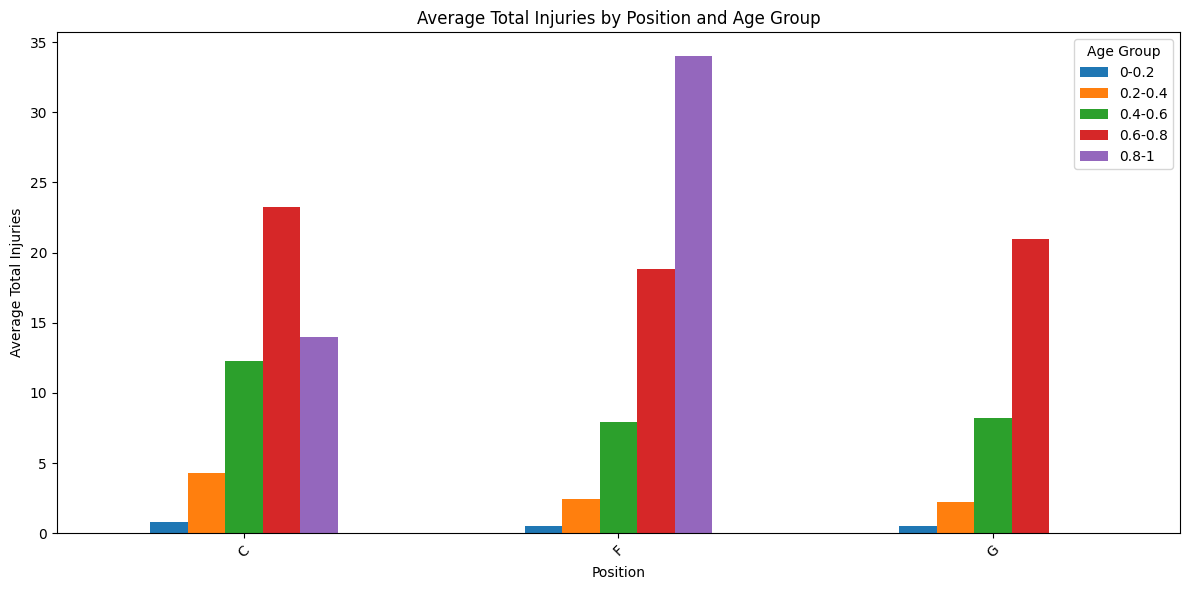

In [161]:
import matplotlib.pyplot as plt
import pandas as pd

# Define age bins and labels
age_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
age_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']

# Create age bins
final_df_descriptive['Age_Group'] = pd.cut(final_df_descriptive['Age'], bins=age_bins, labels=age_labels, right=False)

# Verify Age_Group was created correctly
print(final_df_descriptive['Age_Group'].value_counts())

# Group by position and age group, then calculate mean total injuries
age_injury_plot = final_df_descriptive.groupby(['Position', 'Age_Group'], observed=True)['Total Injuries'].mean().unstack().plot(kind='bar', figsize=(12, 6))

# Check if 'Total Injuries' has non-zero values
print(final_df_descriptive['Total Injuries'].describe())

# Check the count of each 'Age_Group'
print(final_df_descriptive['Age_Group'].value_counts())

# Check if positions are as expected
print(final_df_descriptive['Position'].unique())

# Quick check to ensure the data to plot isn't empty
print(final_df_descriptive.groupby(['Position', 'Age_Group'])['Total Injuries'].mean().unstack())

# Enhance plot
plt.title('Average Total Injuries by Position and Age Group')
plt.xlabel('Position')
plt.ylabel('Average Total Injuries')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


In [162]:
# Check the first few entries to confirm 'Rk' is as expected
#standings_df.head(21)

# Check the first few team names
#print(final_df_descriptive['Team'].head())
#print(standings_df['Team'].head())

# This function decides which team to use for determining playoff status
def determine_playoff_team(team_string):
    # Split the team string and use the last team the player played for
    teams = team_string.split(', ')
    return teams[-1]

# Apply the function to the 'Team' column to create a new 'Playoff_Team' column
final_df_descriptive['Playoff_Team'] = final_df_descriptive['Team'].apply(determine_playoff_team)
standings_df['Made_Playoffs'] = standings_df['Rk'].apply(lambda x: 1 if x <= 20 else 0)

# Now, you can try to merge using 'Playoff_Team' instead of 'Team'
final_df_playoffs = pd.merge(final_df_descriptive, standings_df[['Team', 'Made_Playoffs']], left_on='Playoff_Team', right_on='Team', how='left')

# Drop the extra 'Team' column from standings_df that was added due to merge
final_df_playoffs.drop(columns=['Team_y'], inplace=True)

# Rename 'Team_x' back to 'Team' for clarity
final_df_playoffs.rename(columns={'Team_x': 'Team'}, inplace=True)

# Check the result
print(final_df_playoffs[['Name', 'Team', 'Playoff_Team', 'Made_Playoffs']].head())


            Name Team Playoff_Team  Made_Playoffs
0   Aaron Gordon  DEN          DEN            NaN
1    Aaron Henry  PHI          PHI            NaN
2  Aaron Holiday  PHO          PHO            NaN
3  Aaron Nesmith  BOS          BOS            NaN
4  Aaron Wiggins  OKC          OKC            NaN


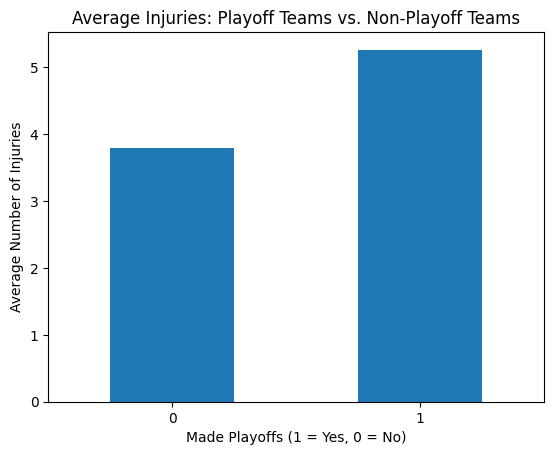

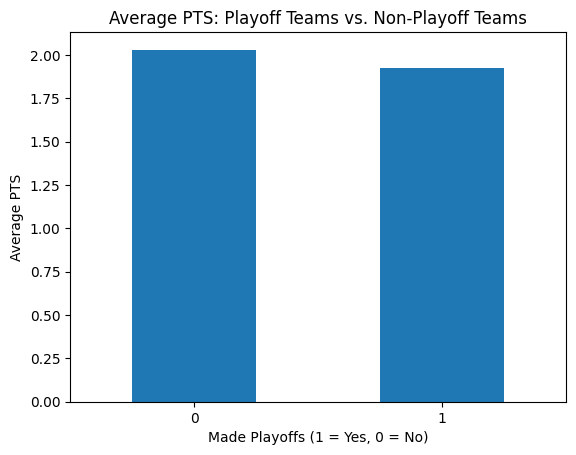

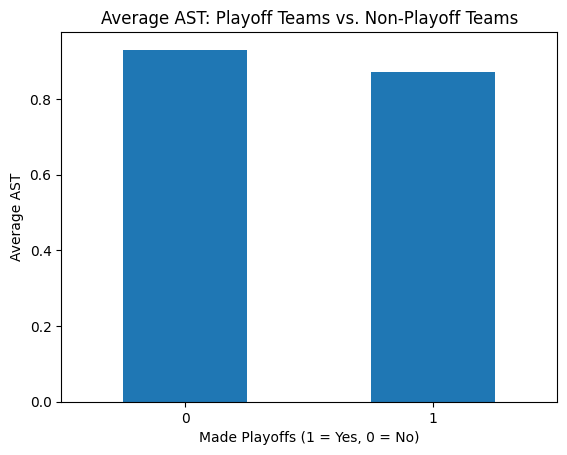

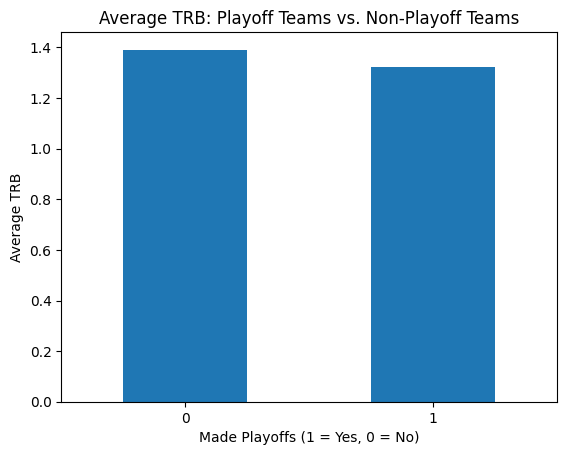

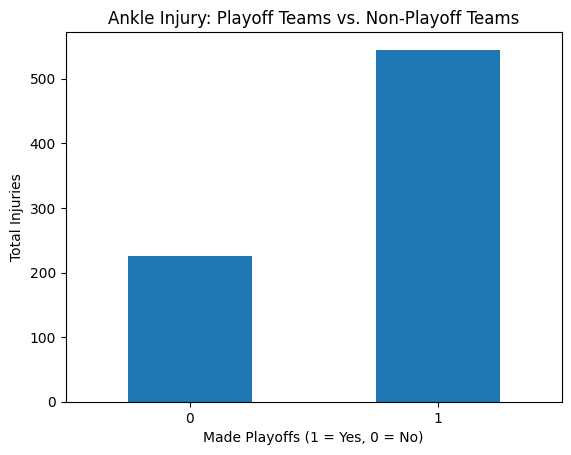

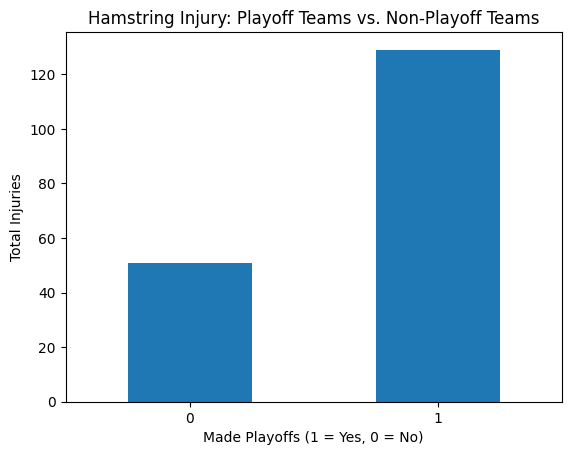

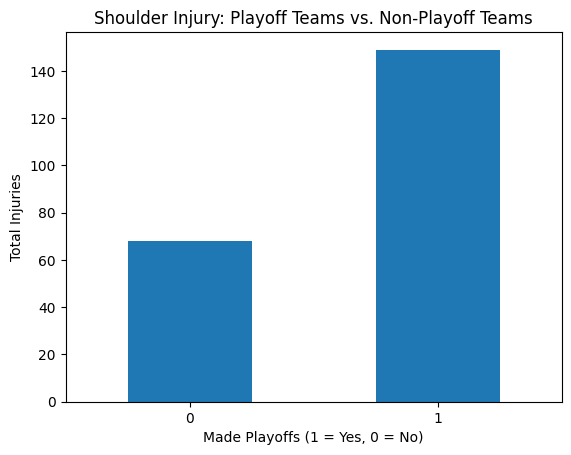

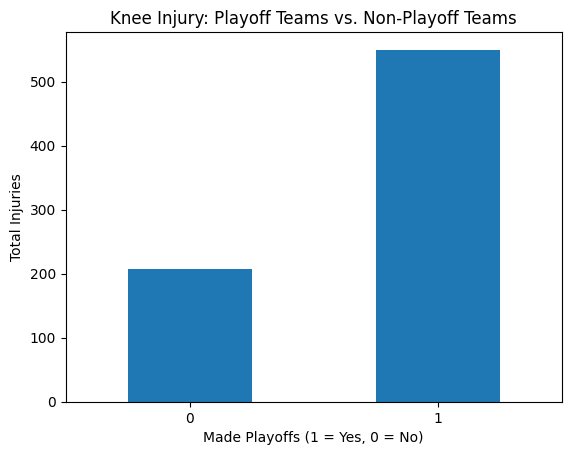

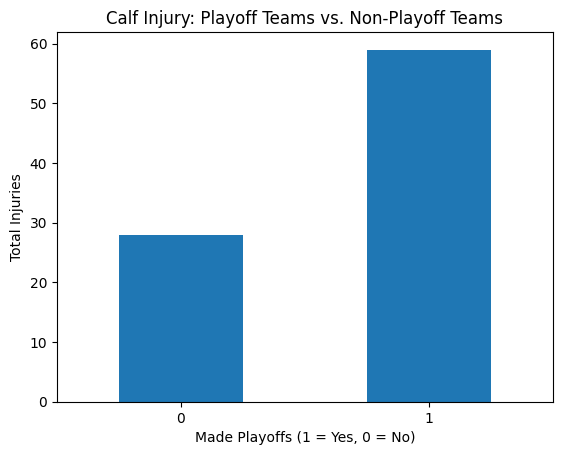

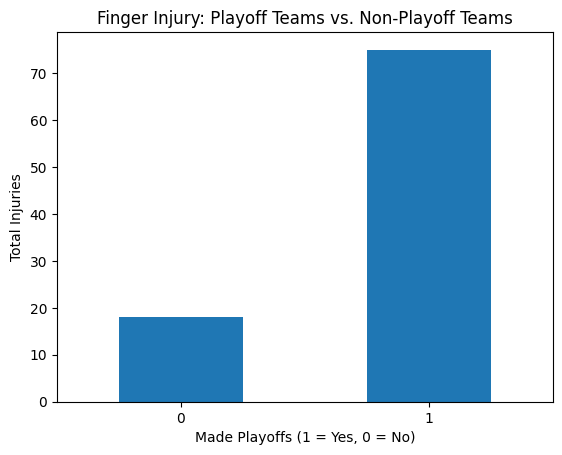

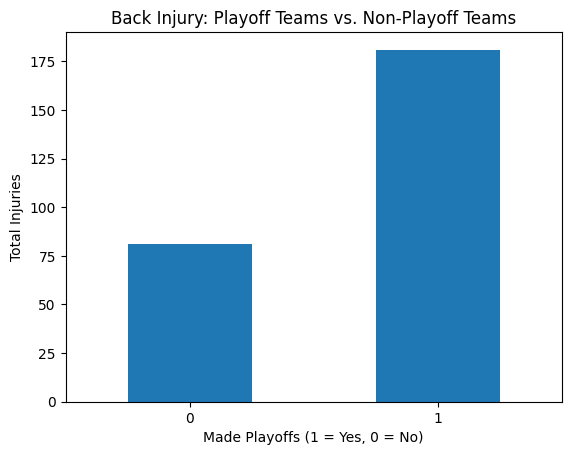

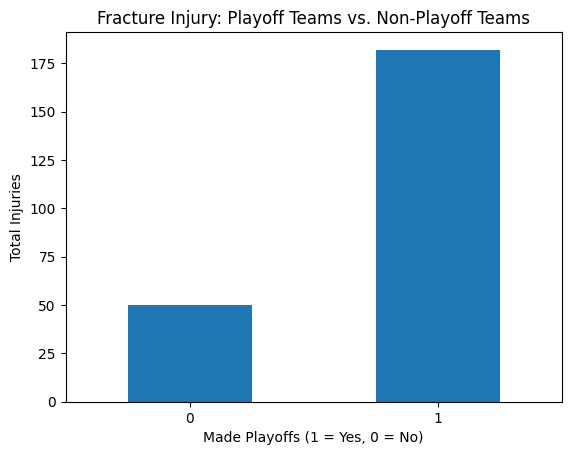

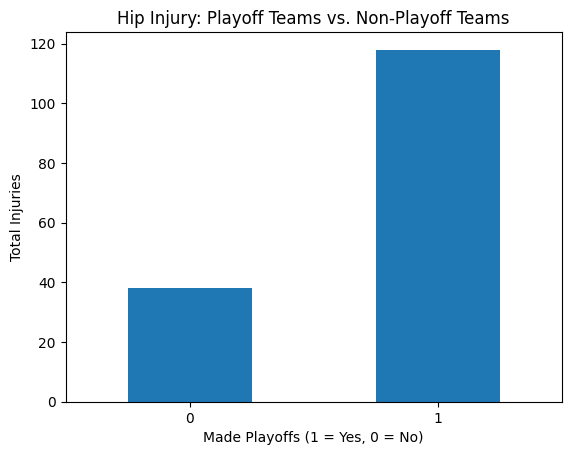

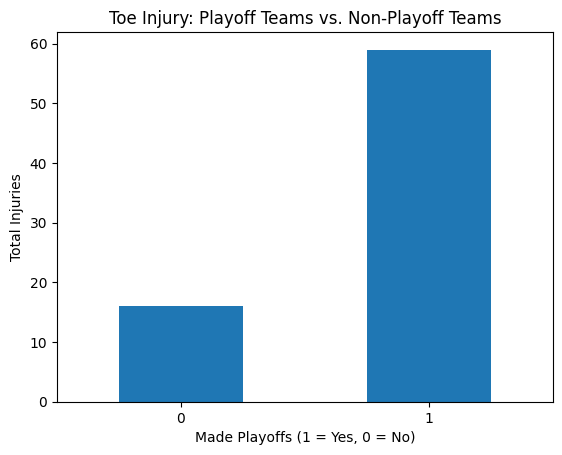

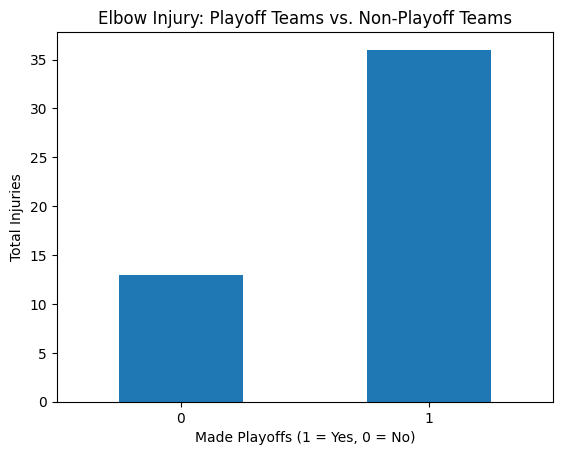

                Made_Playoffs  Total Injuries       PTS       AST       TRB
Made_Playoffs        1.000000        0.068498 -0.061907 -0.050360 -0.058733
Total Injuries       0.068498        1.000000  0.262055  0.260100  0.252135
PTS                 -0.061907        0.262055  1.000000  0.737339  0.775351
AST                 -0.050360        0.260100  0.737339  1.000000  0.536082
TRB                 -0.058733        0.252135  0.775351  0.536082  1.000000


In [163]:
import matplotlib.pyplot as plt
final_df_playoffs = final_df_descriptive.copy()

# Assuming 'Rk' column indicates the rank and 'Team' column for team names
standings_df['Made_Playoffs'] = standings_df['Rk'].apply(lambda x: 1 if x <= 20 else 0)

final_df_playoffs['Team'] = final_df_playoffs['Team'].replace({'DEN': 'Denver Nuggets', 'PHI': 'Philadelphia 76ers', 
                                                                 'PHO': 'Phoenix Suns', 'BOS': 'Boston Celtics',
                                                                 'OKC': 'Oklahoma City Thunder', 'DET': 'Detroit Pistons',
                                                                 'MIL': 'Milwaukee Bucks', 'SAC': 'Sacramento Kings',
                                                                 'ORL': 'Orlando Magic', 'IND': 'Indiana Pacers',
                                                                 'NYK': 'New York Knicks', 'CHI': 'Chicago Bulls',
                                                                 'NOP': 'New Orleans Pelicans', 'HOU': 'Houston Rockets',
                                                                 'LAC': 'Los Angeles Clippers', 'BRK': 'Brooklyn Nets',
                                                                 'GSW': 'Golden State Warriors', 'POR': 'Portland Trail Blazers',
                                                                 'LAL': 'Los Angeles Lakers', 'MIN': 'Minnesota Timberwolves',
                                                                 'WAS': 'Washington Wizards', 'SAS': 'San Antonio Spurs',
                                                                 'TOR': 'Toronto Raptors', 'CHO': 'Charlotte Hornets',
                                                                 'MIA': 'Miami Heat', 'ATL': 'Atlanta Hawks',
                                                                 'DAL': 'Dallas Mavericks', 'MEM': 'Memphis Grizzlies',
                                                                 'UTA': 'Utah Jazz', 'CLE': 'Cleveland Cavaliers'})

# Ensure that the 'Team' columns in both dataframes match perfectly for a successful merge
final_df_playoffs = pd.merge(final_df_playoffs, standings_df[['Team', 'Made_Playoffs']], on='Team', how='left')

# Now, final_df includes a 'Made_Playoffs' column indicating whether each player's team made it to the postseason.

playoff_injury_comparison = final_df_playoffs.groupby('Made_Playoffs')['Total Injuries'].mean()
playoff_injury_comparison.plot(kind='bar', title='Average Injuries: Playoff Teams vs. Non-Playoff Teams', ylabel='Average Number of Injuries', xlabel='Made Playoffs (1 = Yes, 0 = No)', rot=0)
plt.show()

performance_metrics = ['PTS', 'AST', 'TRB']  # Points, assists, rebounds
for metric in performance_metrics:
    final_df_playoffs.groupby('Made_Playoffs')[metric].mean().plot(kind='bar', title=f'Average {metric}: Playoff Teams vs. Non-Playoff Teams', ylabel=f'Average {metric}', xlabel='Made Playoffs (1 = Yes, 0 = No)', rot=0)
    plt.show()

injury_types = ['ankle_injury', 'hamstring_injury', 'shoulder_injury', 'knee_injury', 'calf_injury', 'finger_injury', 'back_injury', 'fracture_injury', 'hip_injury', 'toe_injury', 'elbow_injury']
for injury in injury_types:
    final_df_playoffs.groupby('Made_Playoffs')[injury].sum().plot(kind='bar', title=f'{injury.title().replace("_", " ")}: Playoff Teams vs. Non-Playoff Teams', ylabel='Total Injuries', xlabel='Made Playoffs (1 = Yes, 0 = No)', rot=0)
    plt.show()

correlation_metrics = final_df_playoffs[['Made_Playoffs', 'Total Injuries', 'PTS', 'AST', 'TRB']]  # Add more metrics as needed
print(correlation_metrics.corr())

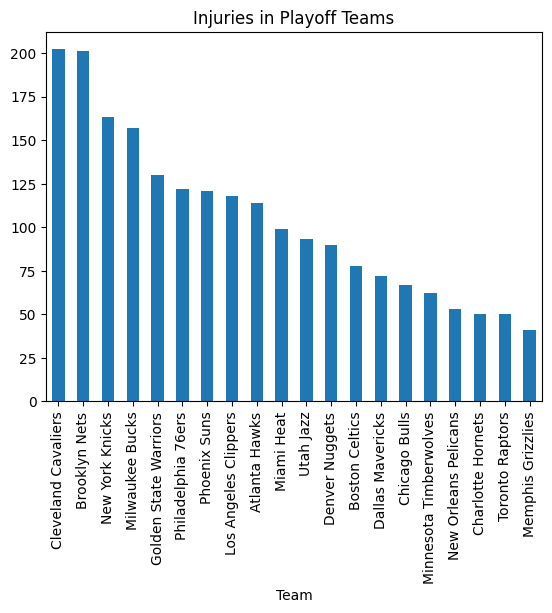

In [165]:
team_injuries = final_df_descriptive.groupby('Team')['Total Injuries'].sum()
playoff_teams = standings_df[standings_df['Rk'] <= 20]['Team']

team_injuries = team_injuries.rename(index={'DEN': 'Denver Nuggets', 'PHI': 'Philadelphia 76ers', 
                                             'PHO': 'Phoenix Suns', 'BOS': 'Boston Celtics',
                                             'OKC': 'Oklahoma City Thunder', 'DET': 'Detroit Pistons',
                                             'MIL': 'Milwaukee Bucks', 'SAC': 'Sacramento Kings',
                                             'ORL': 'Orlando Magic', 'IND': 'Indiana Pacers',
                                             'NYK': 'New York Knicks', 'CHI': 'Chicago Bulls',
                                             'NOP': 'New Orleans Pelicans', 'HOU': 'Houston Rockets',
                                             'LAC': 'Los Angeles Clippers', 'BRK': 'Brooklyn Nets',
                                             'GSW': 'Golden State Warriors', 'POR': 'Portland Trail Blazers',
                                             'LAL': 'Los Angeles Lakers', 'MIN': 'Minnesota Timberwolves',
                                             'WAS': 'Washington Wizards', 'SAS': 'San Antonio Spurs',
                                             'TOR': 'Toronto Raptors', 'CHO': 'Charlotte Hornets',
                                             'MIA': 'Miami Heat', 'ATL': 'Atlanta Hawks',
                                             'DAL': 'Dallas Mavericks', 'MEM': 'Memphis Grizzlies',
                                             'UTA': 'Utah Jazz', 'CLE': 'Cleveland Cavaliers'})

"""final_df_descriptive['Team'] = final_df_descriptive['Team'].replace({'DEN': 'Denver Nuggets', 'PHI': 'Philadelphia 76ers', 
                                                                 'PHO': 'Phoenix Suns', 'BOS': 'Boston Celtics',
                                                                 'OKC': 'Oklahoma City Thunder', 'DET': 'Detroit Pistons',
                                                                 'MIL': 'Milwaukee Bucks', 'SAC': 'Sacramento Kings',
                                                                 'ORL': 'Orlando Magic', 'IND': 'Indiana Pacers',
                                                                 'NYK': 'New York Knicks', 'CHI': 'Chicago Bulls',
                                                                 'NOP': 'New Orleans Pelicans', 'HOU': 'Houston Rockets',
                                                                 'LAC': 'Los Angeles Clippers', 'BRK': 'Brooklyn Nets',
                                                                 'GSW': 'Golden State Warriors', 'POR': 'Portland Trail Blazers',
                                                                 'LAL': 'Los Angeles Lakers', 'MIN': 'Minnesota Timberwolves',
                                                                 'WAS': 'Washington Wizards', 'SAS': 'San Antonio Spurs',
                                                                 'TOR': 'Toronto Raptors', 'CHO': 'Charlotte Hornets',
                                                                 'MIA': 'Miami Heat', 'ATL': 'Atlanta Hawks',
                                                                 'DAL': 'Dallas Mavericks', 'MEM': 'Memphis Grizzlies',
                                                                 'UTA': 'Utah Jazz', 'CLE': 'Cleveland Cavaliers',})
"""

team_injuries_filtered = team_injuries[team_injuries.index.isin(playoff_teams)]

# Check if the filtered team_injuries is empty, if not, plot
if not team_injuries_filtered.empty:
    team_injuries_filtered.sort_values(ascending=False).plot(kind='bar', title='Injuries in Playoff Teams')
else:
    print("No playoff teams found in the filtered data.")

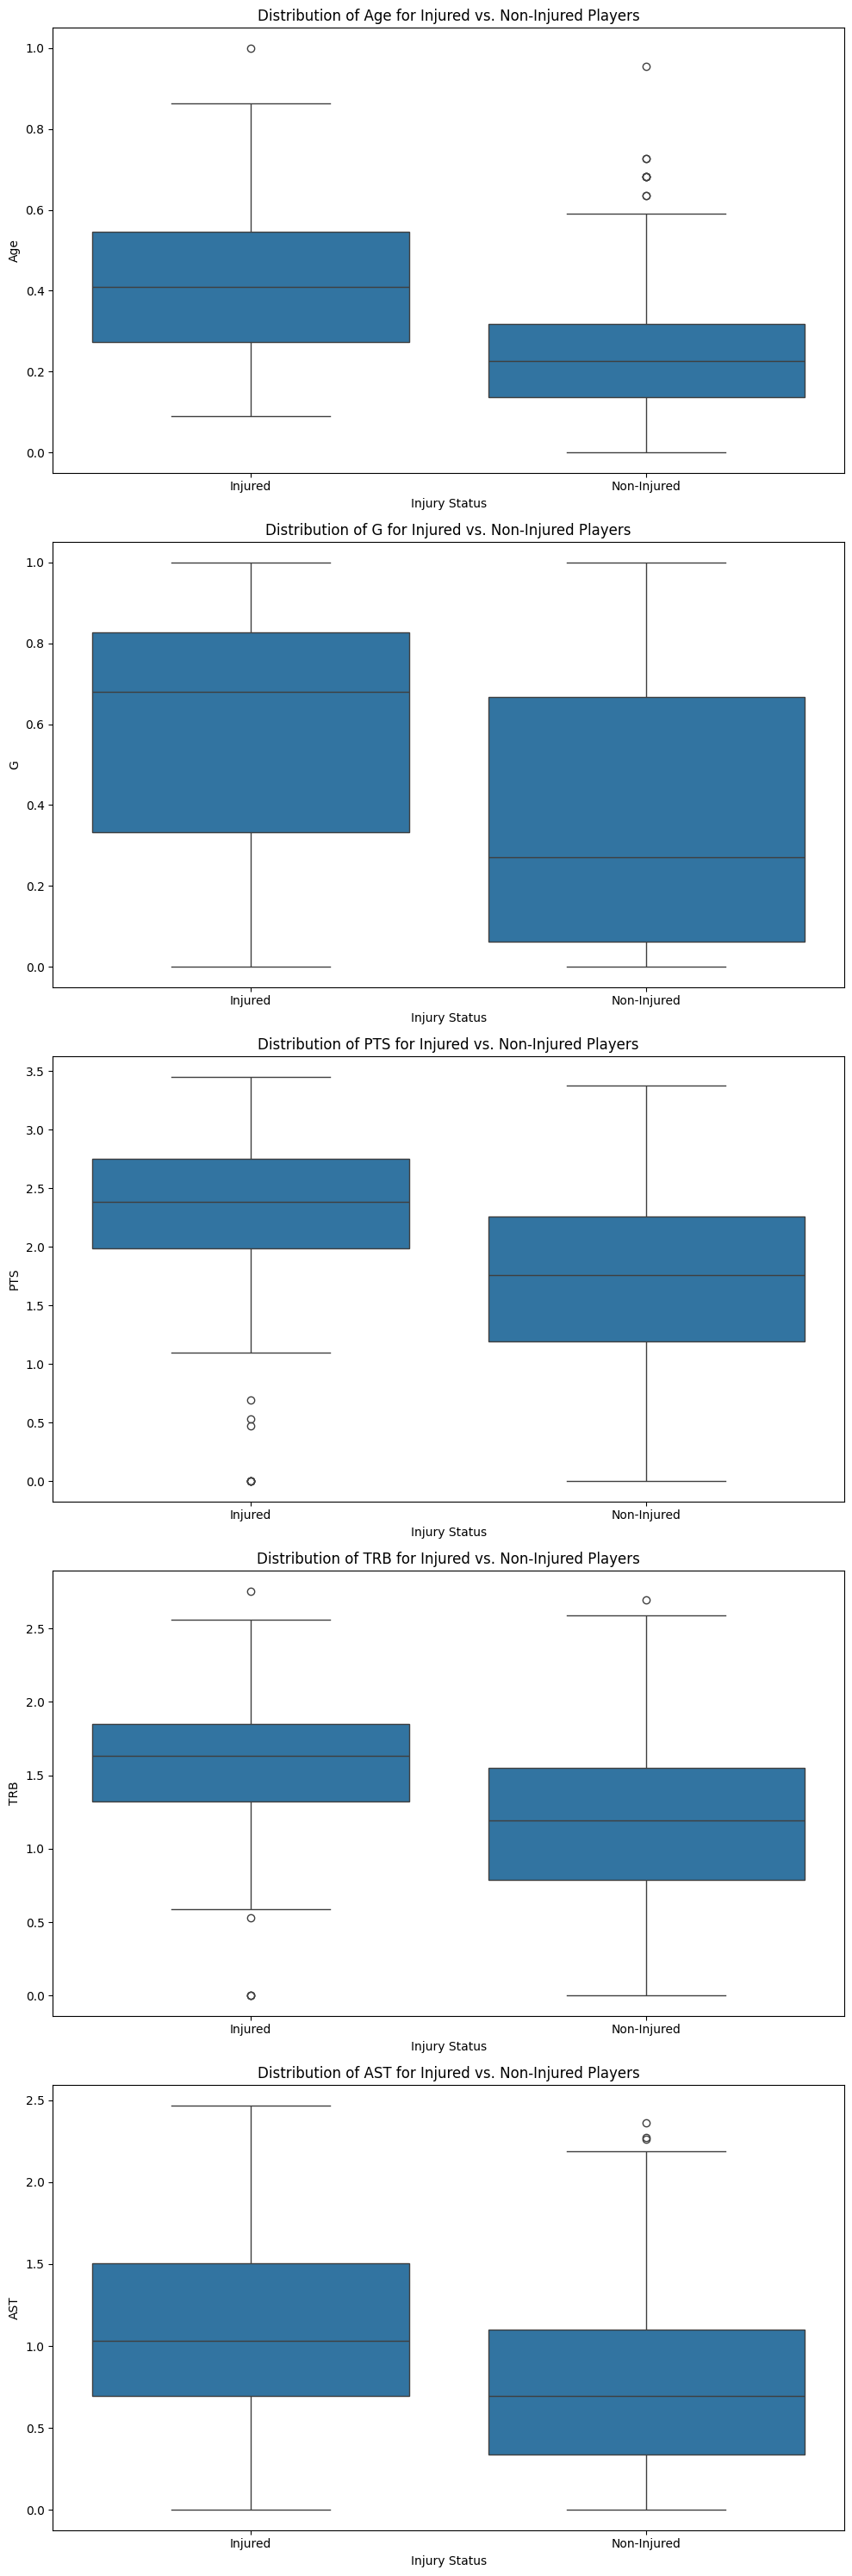

In [166]:
injured_players_stats = final_df_descriptive[final_df_descriptive['Total Injuries'] > 0].describe()
non_injured_players_stats = final_df_descriptive[final_df_descriptive['Total Injuries'] == 0].describe()

import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column to indicate whether a player has been injured
final_df_descriptive['Injury_Status'] = final_df_descriptive['Total Injuries'].apply(lambda x: 'Injured' if x > 0 else 'Non-Injured')

# Select a subset of columns to visualize
metrics_to_visualize = ['Age', 'G', 'PTS', 'TRB', 'AST']

# Set up the matplotlib figure
fig, axes = plt.subplots(len(metrics_to_visualize), 1, figsize=(10, 6 * len(metrics_to_visualize)))

for i, metric in enumerate(metrics_to_visualize):
    sns.boxplot(x='Injury_Status', y=metric, data=final_df_descriptive, ax=axes[i])
    axes[i].set_title(f'Distribution of {metric} for Injured vs. Non-Injured Players')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Injury Status')

plt.tight_layout()
plt.show()


C:\Users\james\AppData\Local\Temp\ipykernel_20836\1667126131.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  injury_by_age_group = final_df_descriptive.groupby('Age_Group')['Total Injuries'].sum()


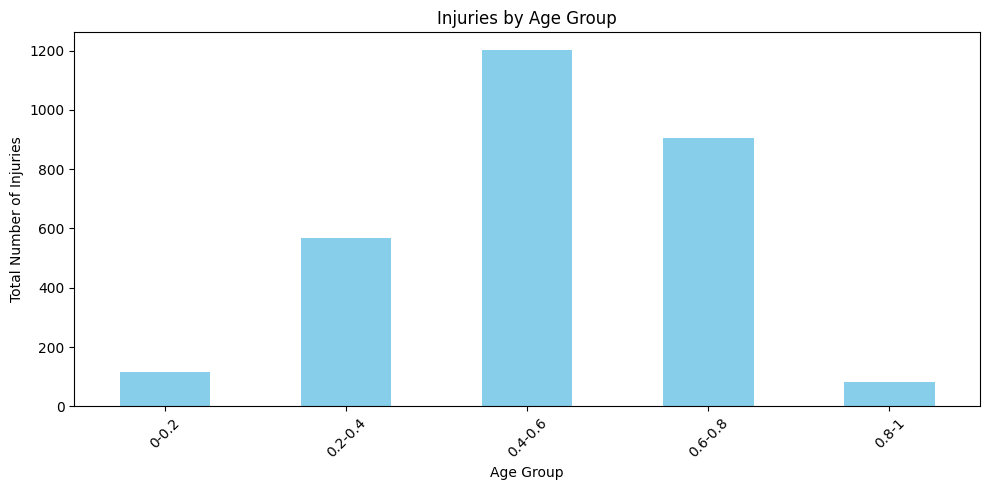

In [227]:
injury_by_age_group = final_df_descriptive.groupby('Age_Group')['Total Injuries'].sum()

# Assuming final_df_descriptive is your DataFrame
injury_by_age_group.plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title('Injuries by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Number of Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

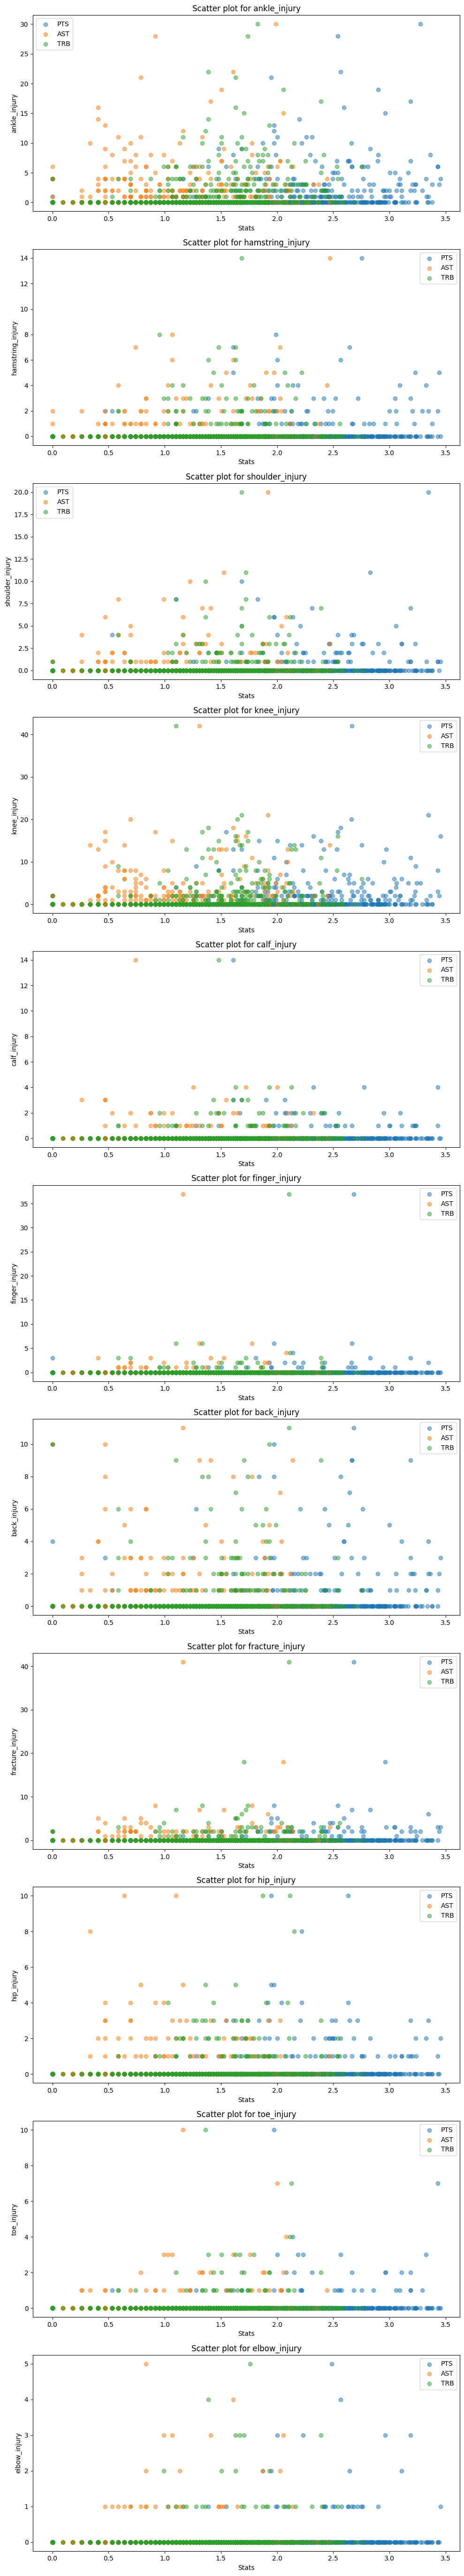

In [228]:
fig, axes = plt.subplots(nrows=len(injury_types), ncols=1, figsize=(10, 5 * len(injury_types)))

for i, injury_type in enumerate(injury_types):
    axes[i].scatter(final_df_descriptive['PTS'], final_df_descriptive[injury_type], label='PTS', alpha=0.5)
    axes[i].scatter(final_df_descriptive['AST'], final_df_descriptive[injury_type], label='AST', alpha=0.5)
    axes[i].scatter(final_df_descriptive['TRB'], final_df_descriptive[injury_type], label='TRB', alpha=0.5)
    axes[i].set_xlabel('Stats')
    axes[i].set_ylabel(injury_type)
    axes[i].legend()
    axes[i].set_title(f'Scatter plot for {injury_type}')

plt.tight_layout()
plt.show()

C:\Users\james\AppData\Local\Temp\ipykernel_20836\2390967711.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_injuries = final_df_descriptive.groupby(pd.cut(final_df_descriptive['Salary'], bins=5))['Total Injuries'].mean()


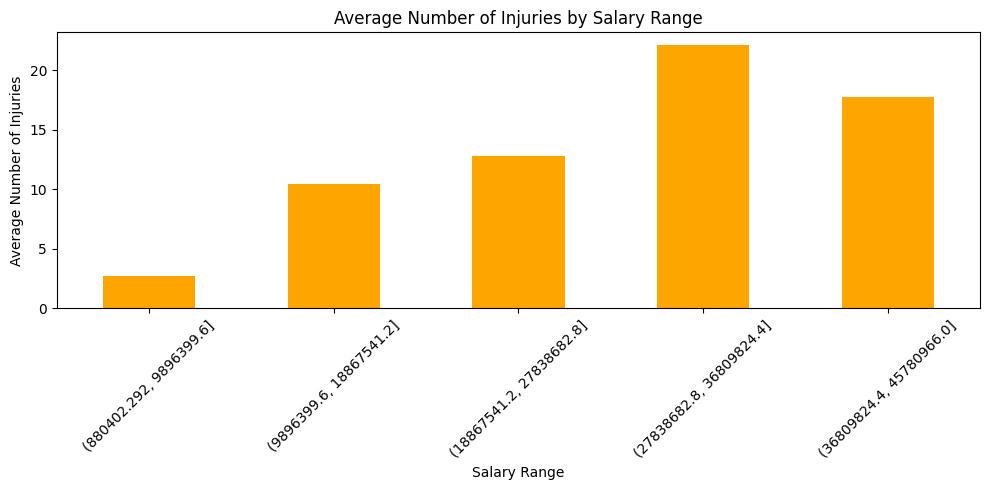

In [169]:
salary_injuries = final_df_descriptive.groupby(pd.cut(final_df_descriptive['Salary'], bins=5))['Total Injuries'].mean()

salary_injuries.plot(kind='bar', color='orange', figsize=(10, 5))
plt.title('Average Number of Injuries by Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Average Number of Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\james\AppData\Local\Temp\ipykernel_20836\1818935142.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  injury_by_weight_group = final_df_descriptive.groupby('Weight_Group')[injury_types].sum()


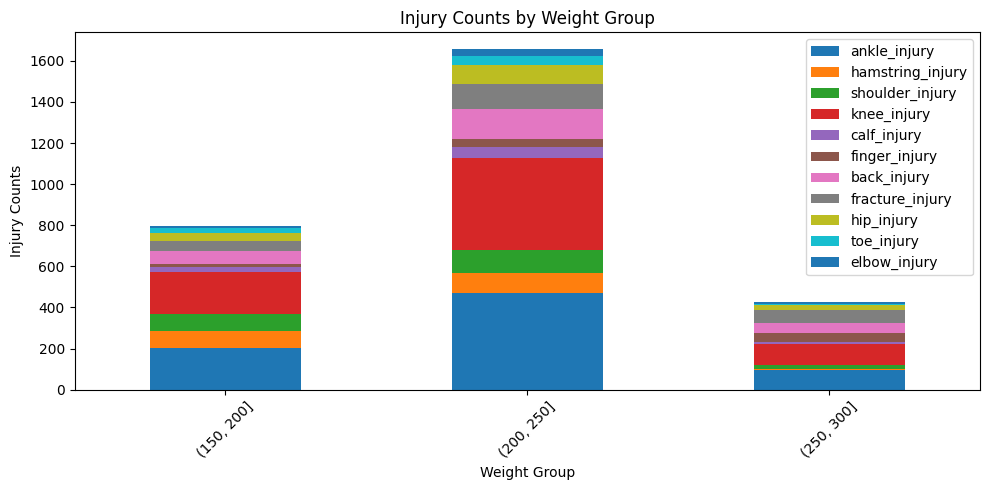

In [170]:
weight_bins = [150, 200, 250, 300]
injury_types = ['ankle_injury', 'hamstring_injury', 'shoulder_injury', 'knee_injury', 'calf_injury', 'finger_injury', 'back_injury', 'fracture_injury', 'hip_injury', 'toe_injury', 'elbow_injury']
#might need to change the numbers depending on the unit used
final_df_descriptive['Weight_Group'] = pd.cut(final_df_descriptive['Weight'], bins=weight_bins)
injury_by_weight_group = final_df_descriptive.groupby('Weight_Group')[injury_types].sum()

injury_by_weight_group.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Injury Counts by Weight Group')
plt.xlabel('Weight Group')
plt.ylabel('Injury Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Age Distribution by Injury Type')

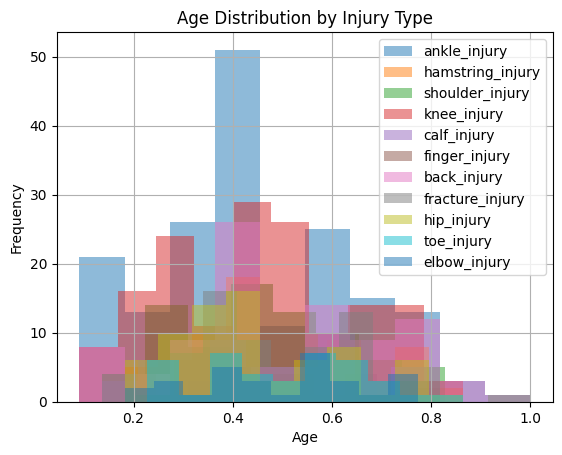

In [172]:
import matplotlib.pyplot as plt

# Define injury types
injury_types = ['ankle_injury', 'hamstring_injury', 'shoulder_injury', 'knee_injury', 'calf_injury', 'finger_injury', 'back_injury', 'fracture_injury', 'hip_injury', 'toe_injury', 'elbow_injury']

# Plot age distribution for each injury type
for injury in injury_types:
    final_df_descriptive.loc[final_df_descriptive[injury] > 0, 'Age'].hist(alpha=0.5, label=injury)

plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Injury Type')

# Objective 3: Model Building

## More features & preprocessing

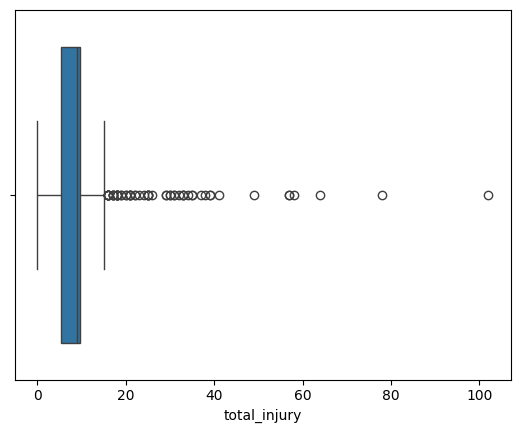

C:\Users\james\AppData\Local\Temp\ipykernel_20836\2631607427.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df_predictive['elbow_injury'].fillna(0, inplace=True)


In [173]:
from scipy import stats

# List of your injury columns
injury_columns = [
    'ankle_injury', 'hamstring_injury', 'shoulder_injury', 
    'knee_injury', 'calf_injury', 'finger_injury', 
    'back_injury', 'fracture_injury', 'hip_injury', 
    'toe_injury', 'elbow_injury'
]

# Create a new column 'total_injury' by summing up all specified injury columns
final_df_predictive['total_injury'] = final_df_predictive[injury_columns].sum(axis=1)

sns.boxplot(x=final_df_predictive['total_injury'])
plt.show()
# Normalize injury count and each injury columns

# estimated career length x injuries per season
final_df_predictive['Estimated_Seasons_Played'] = final_df_predictive['Age'] - 20 + 1
final_df_predictive.loc[final_df_predictive['Estimated_Seasons_Played'] <= 0, 'Estimated_Seasons_Played'] = 1  # Replace 0 with 1
final_df_predictive['Injuries_Per_Season'] = final_df_predictive['total_injury'] / final_df_predictive['Estimated_Seasons_Played']
final_df_predictive.loc[final_df_predictive['Estimated_Seasons_Played'] == 0, 'Injuries_Per_Season'] = 0
final_df_predictive['Injuries_Per_Season_BoxCox'], _ = stats.boxcox(final_df_predictive['Injuries_Per_Season'] + 1)

final_df_predictive['elbow_injury'].fillna(0, inplace=True)

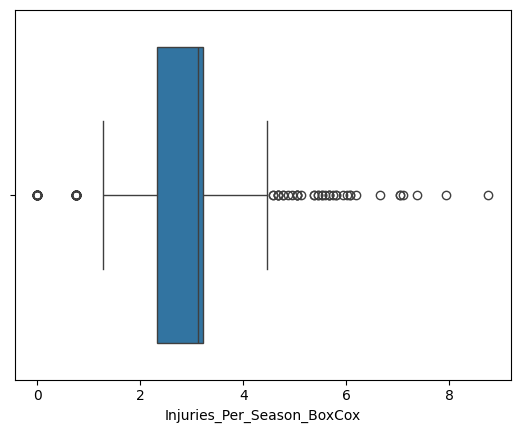

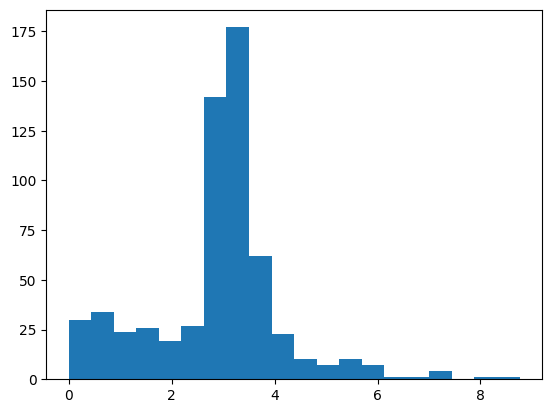

Skewness: 0.09492918009163019


In [174]:
final_df_predictive['Injuries_Per_Season_BoxCox'].describe()

# Boxplot for distribution
sns.boxplot(x=final_df_predictive['Injuries_Per_Season_BoxCox'])
plt.show()

# Histogram for distribution
plt.hist(final_df_predictive['Injuries_Per_Season_BoxCox'], bins=20)
plt.show()

# Calculate skewness
skewness = final_df_predictive['Injuries_Per_Season_BoxCox'].skew()
print(f"Skewness: {skewness}")

In [175]:
# Remove rows where 'Age' is 0
final_df_predictive = final_df_predictive[final_df_predictive['Age'] != 0]

boolean_columns = ['Team_ATL', 'Team_BOS', 'Team_BRK', 'Team_CHI', 'Team_CHO', 'Team_CLE',
                   'Team_DAL', 'Team_DEN', 'Team_DET', 'Team_GSW', 'Team_HOU', 'Team_IND',
                   'Team_LAC', 'Team_LAL', 'Team_MEM', 'Team_MIA', 'Team_MIL', 'Team_MIN',
                   'Team_NOP', 'Team_NYK', 'Team_OKC', 'Team_ORL', 'Team_PHI', 'Team_PHO',
                   'Team_POR', 'Team_SAC', 'Team_SAS', 'Team_TOR', 'Team_UTA', 'Team_WAS',
                   'Position_C', 'Position_F', 'Position_G']

for col in boolean_columns:
    final_df_predictive[col] = final_df_predictive[col].astype(int)

## Baseline Models

In [176]:
final_df_predictive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595 entries, 0 to 605
Data columns (total 81 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         595 non-null    object 
 1   Age                          595 non-null    float64
 2   G                            595 non-null    float64
 3   GS                           595 non-null    float64
 4   MP                           595 non-null    float64
 5   FG                           595 non-null    float64
 6   FGA                          595 non-null    float64
 7   FG%                          595 non-null    float64
 8   3P                           595 non-null    float64
 9   3PA                          595 non-null    float64
 10  3P%                          595 non-null    float64
 11  2P                           595 non-null    float64
 12  2PA                          595 non-null    float64
 13  2P%                      

### Predicting Injuries_Per_Season_BoxCox

In [177]:
# Poisson Regression / Zero-Inflaed Poisson (ZIP) Model: 
# Predict count of specific injuries + if there's huge number of 0s

import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import PoissonRegressor

X = final_df_predictive.drop(['Name', 'total_injury', 'Injuries_Per_Season', 'Injuries_Per_Season_BoxCox'] + injury_columns, axis=1)
y = final_df_predictive['Injuries_Per_Season_BoxCox']  # Target variable

# Add a constant to the model (intercept)
X = sm.add_constant(X)

poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(poisson_model.summary())

model_sklearn = PoissonRegressor()
scores = cross_val_score(model_sklearn, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("Cross-validated RMSE scores:", rmse_scores)

                     Generalized Linear Model Regression Results                      
Dep. Variable:     Injuries_Per_Season_BoxCox   No. Observations:                  595
Model:                                    GLM   Df Residuals:                      531
Model Family:                         Poisson   Df Model:                           63
Link Function:                            Log   Scale:                          1.0000
Method:                                  IRLS   Log-Likelihood:                -928.54
Date:                        Tue, 30 Apr 2024   Deviance:                       203.05
Time:                                07:14:09   Pearson chi2:                     145.
No. Iterations:                             5   Pseudo R-squ. (CS):             0.3110
Covariance Type:                    nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_linear_loss.py:294: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_linear_loss.py:294: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_linear_loss.py:294: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0

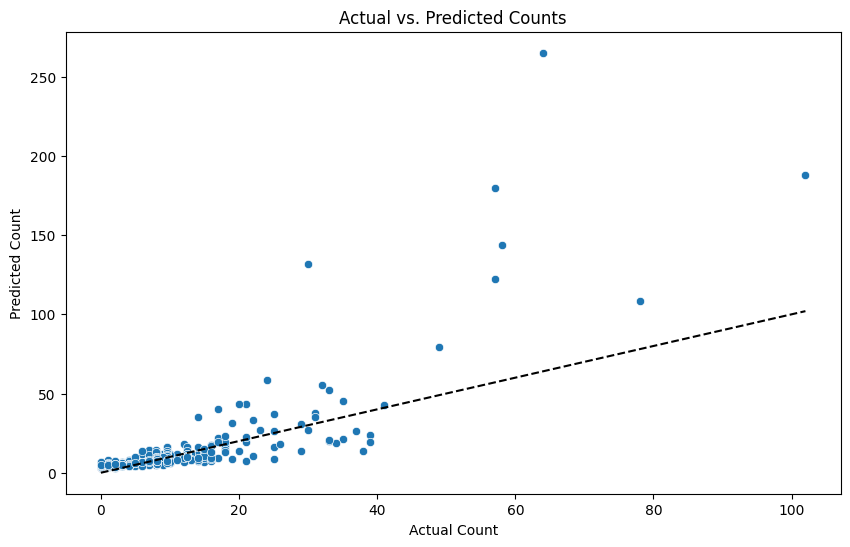

In [178]:
from scipy.stats import yeojohnson
from scipy.special import inv_boxcox
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_transformed, lambda_value = yeojohnson(final_df_predictive['Injuries_Per_Season'])

# Generate predictions using the fitted model
predictions_transformed = poisson_model.predict(X)

# Apply inverse Box-Cox transformation to get predictions back on the original scale
predictions_original_scale = inv_boxcox(predictions_transformed, lambda_value)

# Actual values on the original scale (not the transformed ones)
y_actual = final_df_predictive['Injuries_Per_Season']  # This should be the actual, not transformed values

# Scatter plot of actual vs. predicted counts
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_actual, y=predictions_original_scale)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--')  # Diagonal line for reference
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs. Predicted Counts')
plt.show()

In [179]:
# Compare AIC and BIC of different models
print(f"AIC: {poisson_model.aic}")
print(f"BIC: {poisson_model.bic}")

# Check for overdispersion
chi_sq = poisson_model.pearson_chi2
df_resid = poisson_model.df_resid
print(f"Ratio = {chi_sq / df_resid}")

# Example of removing features with high p-values (usually, p > 0.05)
significant_vars = []
for param in poisson_model.params.index:
    if poisson_model.pvalues[param] > 0.05:
        print(f"{param}: p-value = {poisson_model.pvalues[param]}")
    else:
        significant_vars.append(param)
        
# Refit the model after dropping non-significant features

# Calculate RMSE and MAE
residuals = y_actual - predictions_original_scale
rmse = np.sqrt(np.mean(residuals**2))
mae = np.mean(np.abs(residuals))
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

from scipy.special import inv_boxcox

# Assuming 'predictions_transformed' are your model's predictions on the Box-Cox transformed scale
# And 'lambda_value' is the lambda used for the Box-Cox transformation
predictions_original_scale = inv_boxcox(predictions_transformed, lambda_value)

# 'y_actual' should be your actual target values on the original scale
y_actual = final_df_predictive['Injuries_Per_Season']  # Make sure this is correct

# Now calculate MAE and RMSE on the original scale
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_original = mean_absolute_error(y_actual, predictions_original_scale)
rmse_original = np.sqrt(mean_squared_error(y_actual, predictions_original_scale))

print("MAE on original scale:", mae_original)
print("RMSE on original scale:", rmse_original)


AIC: 1985.0770753957431
BIC: -3189.2730523643413
Ratio = 0.2727812167148572
Age: p-value = 0.10555215217190124
G: p-value = 0.7515322355549752
GS: p-value = 0.9082919687094039
MP: p-value = 0.8071223207872418
FG: p-value = 0.958119947197944
FGA: p-value = 0.6131395302784302
FG%: p-value = 0.7030253447481818
3P: p-value = 0.3687221683552866
3PA: p-value = 0.28504207577301455
3P%: p-value = 0.5876214403073168
2P: p-value = 0.956381726454284
2PA: p-value = 0.8832819580835989
2P%: p-value = 0.883911386423416
eFG%: p-value = 0.7373120447259522
FT: p-value = 0.45733091965049444
FTA: p-value = 0.46932891793625964
FT%: p-value = 0.8865406669914209
ORB: p-value = 0.7002312896133441
DRB: p-value = 0.6511207803361736
TRB: p-value = 0.6762257469639368
AST: p-value = 0.9873770592416261
STL: p-value = 0.5654986756854115
BLK: p-value = 0.5064644382872299
TOV: p-value = 0.4914988508485021
PF: p-value = 0.2388340046463785
PTS: p-value = 0.9609897627462641
Weight: p-value = 0.7583877632752667
Salary: p-

C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


## More Processing, Feature Creating & Transforming

In [180]:
final_df_predictive_ver2 = final_df_predictive.copy()

In [181]:
# Starter/Role Player Feature
median_gs = final_df_predictive_ver2['GS'].median()
median_mp = final_df_predictive_ver2['MP'].median()
final_df_predictive_ver2['Starter_Role'] = ((final_df_predictive_ver2['GS'] >= median_gs) & (final_df_predictive_ver2['MP'] >= median_mp)).astype(int)

# 3pt Shooter Classification (simplified example using median 3P%)
median_3pp = final_df_predictive_ver2['3P%'].median()
final_df_predictive_ver2['3pt_Shooter'] = (final_df_predictive_ver2['3P%'] >= median_3pp).astype(int)

# Defensive Stats per Minute Played
final_df_predictive_ver2['Defensive_Stats_per_Min'] = (final_df_predictive_ver2['STL'] + final_df_predictive_ver2['BLK']) / final_df_predictive_ver2['MP']

# Offensive Capability
final_df_predictive_ver2['Offensive_Capability'] = (final_df_predictive_ver2['PTS'] + 
                                                    final_df_predictive_ver2['TRB'] + 
                                                    final_df_predictive_ver2['AST']) / final_df_predictive_ver2['MP']

# Example mapping of teams to their playoff status: 1 if made playoffs, 0 otherwise
playoff_status = {
    'Team_ATL': 1, 'Team_BOS': 1, 'Team_BRK': 1, 'Team_CHI': 1, 
    'Team_CHO': 1, 'Team_CLE': 1, 'Team_DAL': 1, 'Team_DEN': 1, 
    'Team_DET': 0, 'Team_GSW': 1, 'Team_HOU': 0, 'Team_IND': 0, 
    'Team_LAC': 1, 'Team_LAL': 0, 'Team_MEM': 1, 'Team_MIA': 1, 
    'Team_MIL': 1, 'Team_MIN': 1, 'Team_NOP': 1, 'Team_NYK': 1, 
    'Team_OKC': 0, 'Team_ORL': 0, 'Team_PHI': 1, 'Team_PHO': 1, 
    'Team_POR': 0, 'Team_SAC': 0, 'Team_SAS': 0, 'Team_TOR': 1, 
    'Team_UTA': 1, 'Team_WAS': 0
}

# Create a new column 'Made_Playoffs' initialized with zeros
final_df_predictive_ver2['Made_Playoffs'] = 0

# Loop through the dictionary to update the 'Made_Playoffs' column based on team status
for team, status in playoff_status.items():
    final_df_predictive_ver2.loc[final_df_predictive_ver2[team] == 1, 'Made_Playoffs'] = status

# Identify Outliers in Total Injury
outliers = final_df_predictive_ver2[final_df_predictive_ver2['total_injury'] > 44]
print(outliers[['Name', 'total_injury']])

                 Name  total_injury
23      Anthony Davis          57.0
115  Danilo Gallinari          58.0
146      Derrick Rose          64.0
179       Eric Gordon          78.0
350        Kevin Love         102.0
366      Kyrie Irving          57.0
482       Rajon Rondo          49.0


In [182]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

# Z-score standardization
final_df_predictive_ver2['total_injury_z'] = zscore(final_df_predictive_ver2['total_injury'])

# Min-Max normalization
min_max_scaler = MinMaxScaler()
final_df_predictive_ver2['defensive_stats_per_min_normalized'] = min_max_scaler.fit_transform(final_df_predictive_ver2[['Defensive_Stats_per_Min']])

# Power transformation (Box-Cox)
pt = PowerTransformer(method='box-cox', standardize=True)  # Only for positive values

# Check for infinity values in the 'Offensive_Capability' column
if np.isinf(final_df_predictive_ver2['Offensive_Capability']).any():
    # Replace infinity values with a large finite number
    final_df_predictive_ver2['Offensive_Capability'] = final_df_predictive_ver2['Offensive_Capability'].replace(np.inf, np.finfo(np.float64).max)

# Shift by 1 to handle zeros for Box-Cox transformation
final_df_predictive_ver2['Offensive_Capability'] += 1

# Attempt the Box-Cox transformation again
try:
    final_df_predictive_ver2['offensive_capability_transformed'] = pt.fit_transform(final_df_predictive_ver2[['Offensive_Capability']])
except ValueError as e:
    print(f"An error occurred during Box-Cox transformation: {e}")

# View the transformations
transformed_features = ['total_injury_z', 'defensive_stats_per_min_normalized', 'offensive_capability_transformed']
print(final_df_predictive_ver2[transformed_features].head())

   total_injury_z  defensive_stats_per_min_normalized  \
0        0.922206                            0.044174   
1       -0.164779                            0.210284   
2       -0.008404                            0.055425   
3       -0.164779                            0.062293   
4       -0.008404                            0.040565   

   offensive_capability_transformed  
0                         -0.474990  
1                         -0.042887  
2                          0.374685  
3                          0.239818  
4                         -0.423865  


       total_injury_z  defensive_stats_per_min_normalized  \
count    5.950000e+02                          589.000000   
mean     1.224044e-16                            0.065906   
std      1.000841e+00                            0.069846   
min     -1.058205e+00                            0.000000   
25%     -5.080911e-01                            0.042848   
50%     -6.799974e-02                            0.057252   
75%     -8.404041e-03                            0.075702   
max      1.016412e+01                            1.000000   

       offensive_capability_transformed  
count                      5.900000e+02  
mean                      -7.609732e-16  
std                        1.000849e+00  
min                       -5.837920e+00  
25%                       -3.639820e-01  
50%                       -1.021134e-01  
75%                        3.570443e-01  
max                        1.239731e+01  


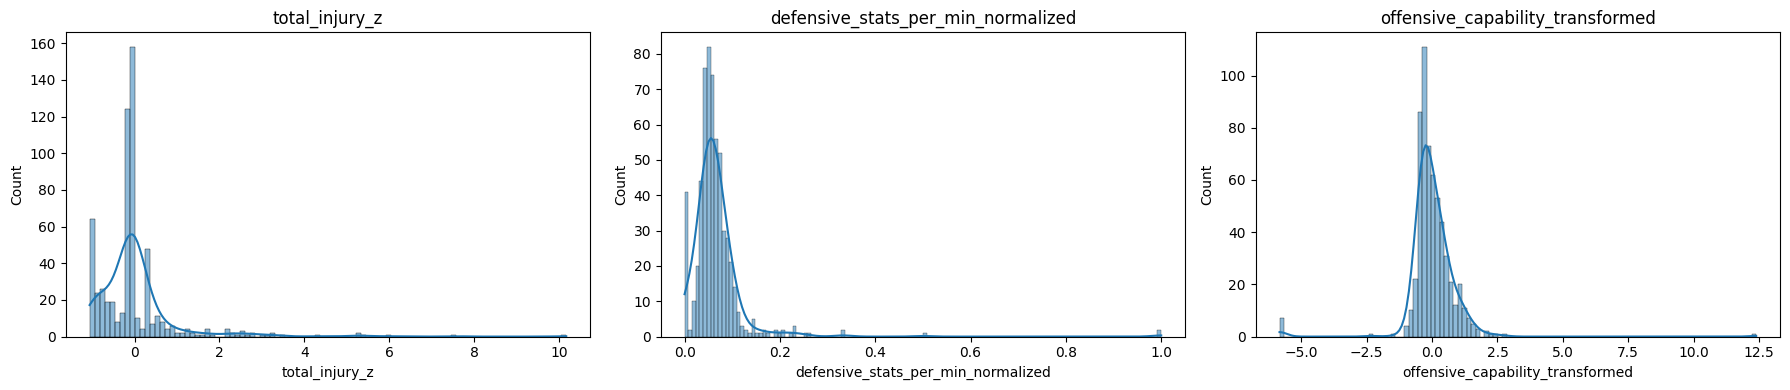

total_injury_z                        0.866328
defensive_stats_per_min_normalized   -0.007294
offensive_capability_transformed     -0.004242
Injuries_Per_Season_BoxCox            1.000000
Name: Injuries_Per_Season_BoxCox, dtype: float64
total_injury_z                        1.001684
defensive_stats_per_min_normalized    0.004878
offensive_capability_transformed      1.001698
dtype: float64


In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Statistical Summary
print(final_df_predictive_ver2[transformed_features].describe())

# 2. Distribution Plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
for i, col in enumerate(transformed_features):
    sns.histplot(final_df_predictive_ver2[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

# 3. Correlation Analysis
correlations = final_df_predictive_ver2[transformed_features + ['Injuries_Per_Season_BoxCox']].corr()
print(correlations['Injuries_Per_Season_BoxCox'])

# 4. Variance
print(final_df_predictive_ver2[transformed_features].var())

# 5. Model Performance
# This would involve fitting a model using these features and comparing its performance
# with the model that used the untransformed features. You can use metrics such as R-squared,
# RMSE, or others relevant to your specific problem.

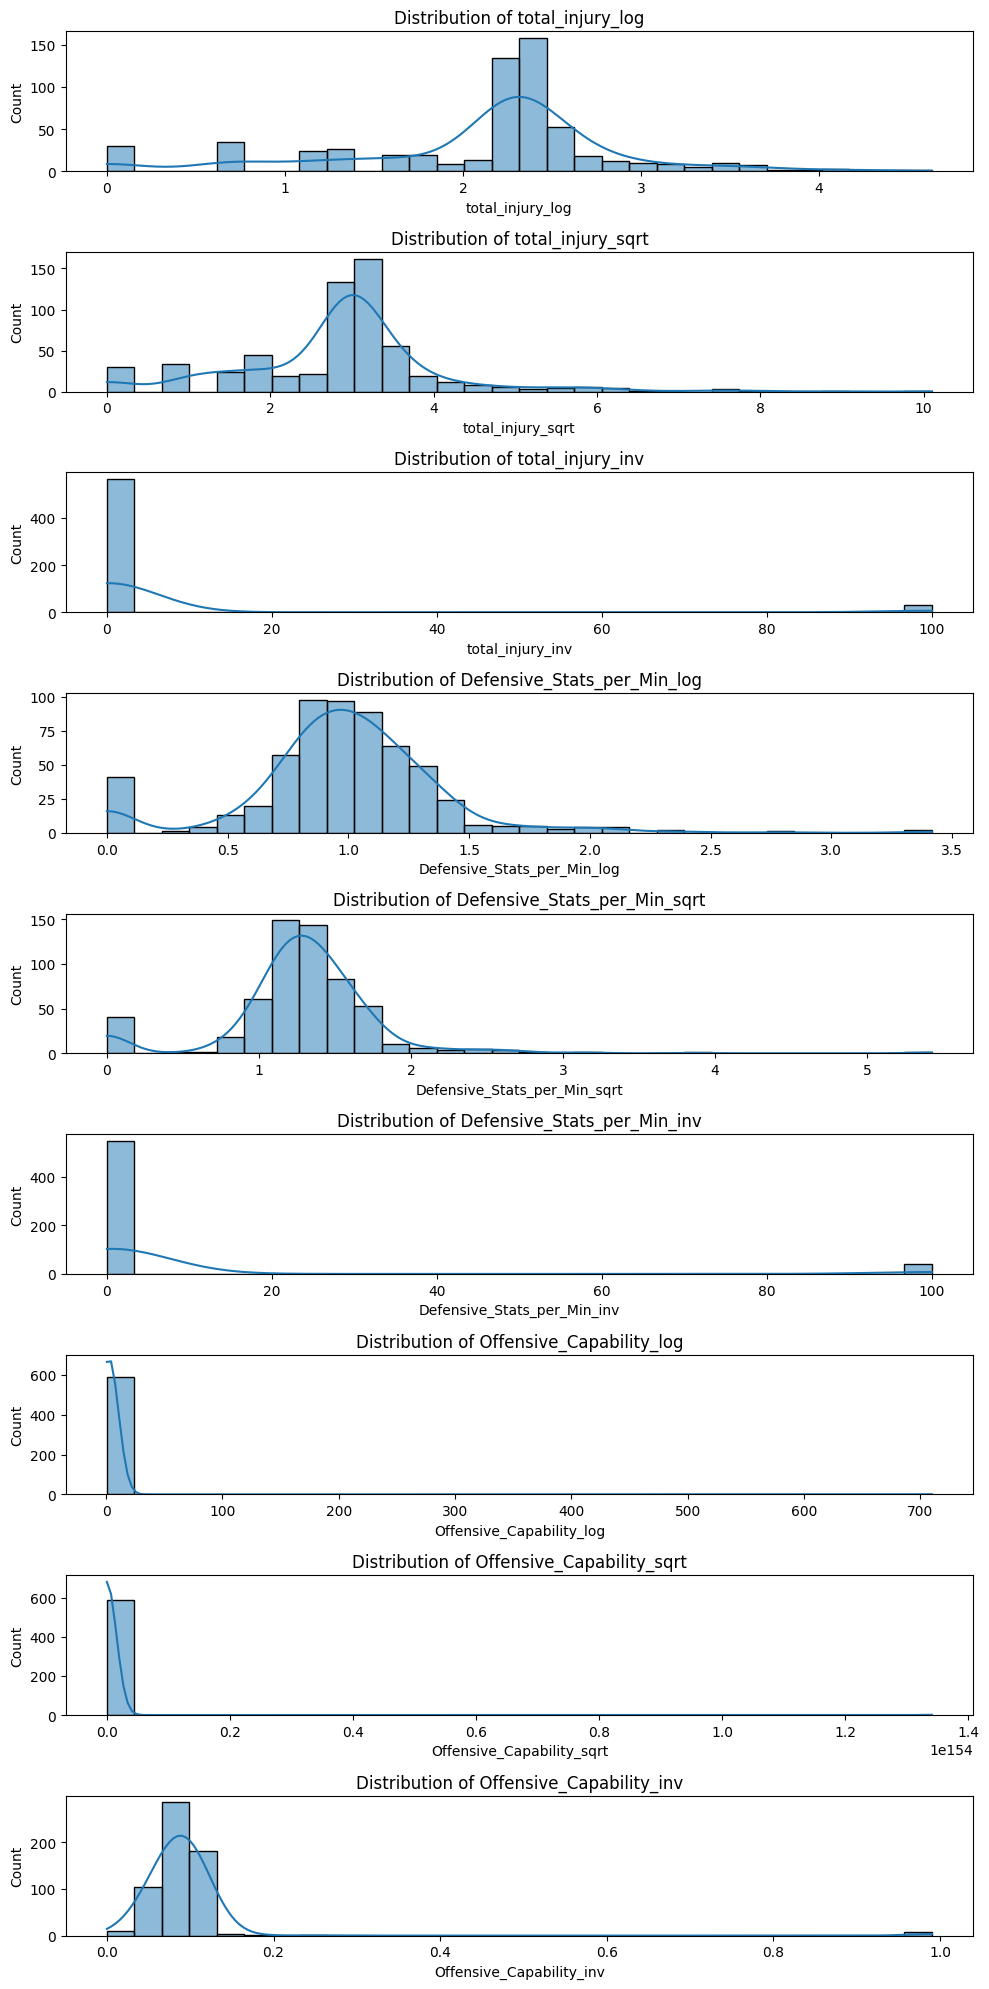

Skewness of total_injury_log: -0.8012259209524167
Skewness of total_injury_sqrt: 0.6636757308944963
Skewness of total_injury_inv: 4.10862145388538
Skewness of Defensive_Stats_per_Min_log: 0.46791603267632703
Skewness of Defensive_Stats_per_Min_sqrt: 1.2627448729386044
Skewness of Defensive_Stats_per_Min_inv: 3.381611922755006
Skewness of Offensive_Capability_log: 24.222783858555385
Skewness of Offensive_Capability_sqrt: nan
Skewness of Offensive_Capability_inv: 8.284040233805584


C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_stats_py.py:1072: RuntimeWarning: overflow encountered in multiply
  s *= a_zero_mean
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

def apply_transformations(df, feature_names):
    # Log Transformation (adding 1 to avoid log(0))
    for feature in feature_names:
        df[f'{feature}_log'] = np.log1p(df[feature])
    
    # Square Root Transformation
        df[f'{feature}_sqrt'] = np.sqrt(df[feature])
    
    # Inverse Transformation (adding a small constant to avoid division by zero)
        df[f'{feature}_inv'] = 1 / (df[feature] + 0.01)
    
    return df

# Apply transformations
final_df_predictive_ver2 = apply_transformations(final_df_predictive_ver2, ['total_injury', 'Defensive_Stats_per_Min', 'Offensive_Capability'])

# Check new distributions and skewness
transformed_feature_names = ['total_injury_log', 'total_injury_sqrt', 'total_injury_inv',
                             'Defensive_Stats_per_Min_log', 'Defensive_Stats_per_Min_sqrt', 'Defensive_Stats_per_Min_inv',
                             'Offensive_Capability_log', 'Offensive_Capability_sqrt', 'Offensive_Capability_inv']

# Plot distributions
# Plot distributions with a specified number of bins
fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(10, 20))
bins = 30  # Set the number of bins
for i, col in enumerate(transformed_feature_names):
    sns.histplot(final_df_predictive_ver2[col], ax=axes[i], kde=True, bins=bins)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Calculate skewness
for col in transformed_feature_names:
    print(f'Skewness of {col}: {skew(final_df_predictive_ver2[col].dropna())}')


In [185]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Numerically check skewness
print("Skewness of the features:")
print(final_df_predictive_ver2[transformed_features].skew())

#Some preprocessing / value handling to do
#total_injury_sqrt may lead to data leakage so I ain't using that
transformed_features = ['Defensive_Stats_per_Min_log', 'offensive_capability_transformed']

Skewness of the features:
total_injury_z                        4.272105
defensive_stats_per_min_normalized    8.952532
offensive_capability_transformed      1.119234
dtype: float64


In [186]:
# To check for NaN values in each column and their count
nan_counts = final_df_predictive_ver2.isna().sum()

# To filter out the columns that have NaN values
nan_columns = nan_counts[nan_counts > 0].index.tolist()
print(nan_columns)

# This will print out the list of columns with NaN values and their count
print(final_df_predictive_ver2[nan_columns].isna().sum())

['Defensive_Stats_per_Min', 'Offensive_Capability', 'defensive_stats_per_min_normalized', 'offensive_capability_transformed', 'Defensive_Stats_per_Min_log', 'Defensive_Stats_per_Min_sqrt', 'Defensive_Stats_per_Min_inv', 'Offensive_Capability_log', 'Offensive_Capability_sqrt', 'Offensive_Capability_inv']
Defensive_Stats_per_Min               6
Offensive_Capability                  5
defensive_stats_per_min_normalized    6
offensive_capability_transformed      5
Defensive_Stats_per_Min_log           6
Defensive_Stats_per_Min_sqrt          6
Defensive_Stats_per_Min_inv           6
Offensive_Capability_log              5
Offensive_Capability_sqrt             5
Offensive_Capability_inv              5
dtype: int64


In [187]:
from sklearn.impute import SimpleImputer

# Columns to impute
columns_to_impute = [
    'Defensive_Stats_per_Min', 'Offensive_Capability', 
    'defensive_stats_per_min_normalized', 'offensive_capability_transformed',
    'Defensive_Stats_per_Min_log', 'Defensive_Stats_per_Min_sqrt', 'Defensive_Stats_per_Min_inv',
    'Offensive_Capability_log', 'Offensive_Capability_sqrt', 'Offensive_Capability_inv'
]

# Instantiate the SimpleImputer with 'constant' strategy and 0 as the fill value
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Perform the imputation on the selected columns
final_df_predictive_ver2[columns_to_impute] = imputer.fit_transform(final_df_predictive_ver2[columns_to_impute])

# Now you can check if the imputation was successful
print(final_df_predictive_ver2[columns_to_impute].isna().sum())

Defensive_Stats_per_Min               0
Offensive_Capability                  0
defensive_stats_per_min_normalized    0
offensive_capability_transformed      0
Defensive_Stats_per_Min_log           0
Defensive_Stats_per_Min_sqrt          0
Defensive_Stats_per_Min_inv           0
Offensive_Capability_log              0
Offensive_Capability_sqrt             0
Offensive_Capability_inv              0
dtype: int64


In [188]:
# Ensure the player name columns in both DataFrames are formatted the same way.
# This step is crucial as the merge will be performed on this column.
playersadvanced_updated['Name'] = playersadvanced_updated['Name'].str.strip()
final_df_predictive_ver2['Name'] = final_df_predictive_ver2['Name'].str.strip()

# Selecting the relevant columns from playersadvanced_updated
advanced_stats_columns = ['Name', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 
                          'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 
                          'WS/48', 'OBPM', 'DBPM', 'VORP']

# Merging the selected advanced stats with the main DataFrame
final_df_predictive_ver3 = pd.merge(final_df_predictive_ver2, 
                             playersadvanced_updated[advanced_stats_columns], 
                             on='Name', 
                             how='left')

final_df_predictive_ver3.head().T


0            1              2              3              4
Name   Aaron Gordon  Aaron Henry  Aaron Holiday  Aaron Nesmith  Aaron Wiggins
Age        0.318182     0.136364       0.272727       0.136364       0.181818
G           0.91358     0.061728       0.259259        0.62963       0.604938
GS         4.330733          0.0       0.693147       1.386294       3.583519
MP         0.722353     0.042353           0.36       0.235294       0.545882
...             ...          ...            ...            ...            ...
WS              5.2         -0.1            1.5            0.4            1.2
WS/48         0.105       -0.306          0.068          0.038          0.048
OBPM            0.5        -14.0           -1.9           -4.9           -3.4
DBPM           -1.1         -2.4            0.3            0.7           -0.9
VORP            0.9         -0.1            0.1           -0.3           -0.7

[117 rows x 5 columns]

In [189]:
# Merge the per 36 stats with the final_df_predictive_ver3
final_df_predictive_ver4 = pd.merge(final_df_predictive_ver3,
                                    playersper36_updated[per36_stats_columns],
                                    on='Name',
                                    how='left')

# Check the first few rows of the combined DataFrame
final_df_predictive_ver4.head().T

0            1              2              3  \
Name       Aaron Gordon  Aaron Henry  Aaron Holiday  Aaron Nesmith   
Age            0.318182     0.136364       0.272727       0.136364   
G               0.91358     0.061728       0.259259        0.62963   
GS             4.330733          0.0       0.693147       1.386294   
MP             0.722353     0.042353           0.36       0.235294   
...                 ...          ...            ...            ...   
STL_per36           0.7          0.0            1.5            1.3   
BLK_per36           0.7          4.2            0.3            0.3   
TOV_per36           2.0          4.2            2.4            1.9   
PF_per36            2.2          4.2            3.2            4.4   
PTS_per36          17.1          4.2           14.1           12.3   

                       4  
Name       Aaron Wiggins  
Age             0.181818  
G               0.604938  
GS              3.583519  
MP              0.545882  
...                  ...  
STL_per36            0.9  
BLK_per36            0.3  
TOV_per36            1.6  
PF_per36             2.8  
PTS_per36           12.4  

[138 rows x 5 columns]

In [190]:

# Merge per 100 possession stats with the final_df_predictive DataFrame
final_df_predictive_ver4 = pd.merge(final_df_predictive_ver4,
                                    players100pos_updated[['Name'] + [col for col in players100pos_updated.columns if '_per100' in col]],
                                    on='Name',
                                    how='left')

final_df_predictive_ver4.drop(columns='Player-additional_per100', inplace=True)

final_df_predictive_ver4.head().T

0            1              2              3  \
Name         Aaron Gordon  Aaron Henry  Aaron Holiday  Aaron Nesmith   
Age              0.318182     0.136364       0.272727       0.136364   
G                 0.91358     0.061728       0.259259        0.62963   
GS               4.330733          0.0       0.693147       1.386294   
MP               0.722353     0.042353           0.36       0.235294   
...                   ...          ...            ...            ...   
TOV_per100            2.7          5.9            3.2            2.7   
PF_per100             3.1          5.9            4.4            6.1   
PTS_per100           23.2          5.9           19.2           17.0   
ORtg_per100         115.0         29.0          108.0           95.0   
DRtg_per100           114          111            113            108   

                         4  
Name         Aaron Wiggins  
Age               0.181818  
G                 0.604938  
GS                3.583519  
MP                0.545882  
...                    ...  
TOV_per100             2.2  
PF_per100              3.7  
PTS_per100            16.8  
ORtg_per100          107.0  
DRtg_per100            116  

[162 rows x 5 columns]

In [191]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

# Assuming final_df_predictive_ver4 is your DataFrame
# Identify columns with missing values
columns_with_missing_values = final_df_predictive_ver4.columns[final_df_predictive_ver4.isnull().any()].tolist()

# Initialize the DataFrame to store comparison data
comparison_df = pd.DataFrame()

# Store original means for columns with missing values
comparison_df['Original'] = final_df_predictive_ver4[columns_with_missing_values].mean()

# Iterate over different k values for KNN imputation
for k in [3, 4, 5]:
    imputer = KNNImputer(n_neighbors=k)
    # Perform imputation
    imputed_data = imputer.fit_transform(final_df_predictive_ver4[columns_with_missing_values])
    # Create DataFrame from imputed data for the columns of interest
    imputed_df = pd.DataFrame(imputed_data, columns=columns_with_missing_values)
    # Store the mean of imputed columns for each k in comparison_df
    comparison_df[f'K={k}'] = imputed_df.mean()

# Calculate differences from the original means for each k value
for k in [3, 4, 5]:
    comparison_df[f'Difference_K={k}'] = np.abs(comparison_df['Original'] - comparison_df[f'K={k}'])

# Transpose the DataFrame for better readability
comparison_df = comparison_df.T

print(comparison_df)

                     TS%      3PAr       FTr       TOV%  FG%_per36  3P%_per36  \
Original        0.529867  0.399505  0.243812  12.097785   0.437381   0.304428   
K=3             0.530657  0.398533  0.243191  12.077453   0.438640   0.301850   
K=4             0.530587  0.398777  0.243422  12.077453   0.438546   0.300418   
K=5             0.530557  0.398842  0.243680  12.080008   0.438490   0.300037   
Difference_K=3  0.000790  0.000972  0.000621   0.020332   0.001259   0.002577   
Difference_K=4  0.000720  0.000729  0.000391   0.020332   0.001165   0.004009   
Difference_K=5  0.000690  0.000664  0.000132   0.017778   0.001110   0.004391   

                2P%_per36  FT%_per36  FG%_per100  3P%_per100  2P%_per100  \
Original         0.509561   0.748655    0.437381    0.304428    0.509561   
K=3              0.506633   0.740371    0.438640    0.301850    0.506633   
K=4              0.507053   0.739572    0.438546    0.300418    0.507053   
K=5              0.506916   0.741231    0.43849

In [192]:
from sklearn.impute import KNNImputer

# Identify columns with missing values
columns_with_missing_values = final_df_predictive_ver4.columns[final_df_predictive_ver4.isnull().any()].tolist()

# Initialize the KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)

# Perform imputation and directly update final_df_predictive_ver4
final_df_predictive_ver4[columns_with_missing_values] = imputer.fit_transform(final_df_predictive_ver4[columns_with_missing_values])

# Optionally, check if any NaNs remain
print(final_df_predictive_ver4.isnull().sum().sum(), "NaNs remaining in DataFrame.")

0 NaNs remaining in DataFrame.


In [193]:
import pandas as pd

# Calculate skewness and kurtosis
numeric_columns_final = final_df_predictive_ver4.select_dtypes(include=[np.number])

# Calculate skewness and kurtosis for numeric columns
skewness = numeric_columns_final.skew()
kurtosis = numeric_columns_final.kurtosis()

# Create a DataFrame to display
feature_analysis = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

print(feature_analysis)

             Skewness   Kurtosis
Age          0.778370   0.129893
G           -0.019879  -1.491277
GS           0.149729  -1.482055
MP           0.051390  -1.018454
FG          -0.230394  -0.499794
...               ...        ...
TOV_per100   5.518864  54.769937
PF_per100    6.889448  91.361973
PTS_per100   1.375719  11.413492
ORtg_per100 -1.387339   8.909913
DRtg_per100 -3.119310  22.191026

[161 rows x 2 columns]


C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\nanops.py:1259: RuntimeWarning: overflow encountered in square
  adjusted2 = adjusted**2
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\nanops.py:1260: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\nanops.py:1272: RuntimeWarning: overflow encountered in power
  result = (co

In [194]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import PowerTransformer

# List of columns to transform
columns_to_transform = [
    'FG%', 'eFG%', 'Salary', 
    'ankle_injury', 'hamstring_injury', 'shoulder_injury', 'elbow_injury',
    'knee_injury', 'calf_injury', 'finger_injury', 'back_injury',
    'fracture_injury', 'hip_injury', 'toe_injury', 'Day-to-Day',
    'Injured_List', 'Out_for_Season/Indefinitely', 'Unknown',
    'Team_ATL', 'Team_BOS', 'Team_BRK', 'Team_CHI', 'Team_CHO',
    'Team_CLE', 'Team_DAL', 'Team_DEN', 'Team_DET', 'Team_GSW',
    'Team_HOU', 'Team_IND', 'Team_LAC', 'Team_LAL', 'Team_MEM',
    'Team_MIA', 'Team_MIL', 'Team_MIN', 'Team_NOP', 'Team_NYK',
    'Team_OKC', 'Team_ORL', 'Team_PHI', 'Team_PHO', 'Team_POR',
    'Team_SAC', 'Team_SAS', 'Team_TOR', 'Team_UTA', 'Team_WAS',
    'Defensive_Stats_per_Min', 'defensive_stats_per_min_normalized',
    'Offensive_Capability_log', 'Offensive_Capability_inv',
    'STL_per36', 'TOV_per36', 'PF_per36', 'FG_per36', '2P_per36',
    'WS/48', 'TOV_per100', 'PF_per100'
]

# Initialize transformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Function to calculate skewness and kurtosis
def transform_skew_kurtosis(df, columns):
    skew_kurt = pd.DataFrame(columns=['Original Skew', 'Original Kurtosis', 'Transformed Skew', 'Transformed Kurtosis'])
    for col in columns:
        original_skew = skew(df[col].dropna())
        original_kurt = kurtosis(df[col].dropna())

        # Transform the data
        transformed_data = pt.fit_transform(df[[col]].dropna())
        df.loc[df[col].notna(), col] = transformed_data.flatten()  

        transformed_skew = skew(transformed_data)
        transformed_kurt = kurtosis(transformed_data)

        skew_kurt.loc[col] = [original_skew, original_kurt, transformed_skew, transformed_kurt]

    return df, skew_kurt

# Calculate and print skewness and kurtosis before and after transformation
final_df_predictive_ver5, skew_kurt_df = transform_skew_kurtosis(final_df_predictive_ver4.copy(), columns_to_transform)
print(skew_kurt_df)

C:\Users\james\AppData\Local\Temp\ipykernel_20836\3789128387.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301
 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301
 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301
 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301
 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301
 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301
 -0.19127301 -0.19127301 -0.19127301  5.22812905 -0.19127301 -0.19127301
 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301
 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301
 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301
 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301 -0.19127301


                                    Original Skew  Original Kurtosis  \
FG%                                     -0.726560           3.240766   
eFG%                                    -1.474686           4.136029   
Salary                                   2.232039           5.585973   
ankle_injury                             4.453426          28.962935   
hamstring_injury                         5.643767          49.676155   
shoulder_injury                          7.222188          76.931989   
elbow_injury                             6.899922          56.060047   
knee_injury                              5.009015          41.256746   
calf_injury                             11.680411         194.817665   
finger_injury                           20.584344         465.326284   
back_injury                              4.242199          21.863937   
fracture_injury                         14.191891         259.061308   
hip_injury                               5.743465          46.40

In [195]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(df, columns):
    X = df[columns]
    X = add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

def remove_high_vif_features(df, threshold=5):
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    while True:
        vif_scores = calculate_vif(df, numeric_columns)
        high_vif_features = vif_scores[vif_scores['VIF'] > threshold]
        if not high_vif_features.empty:
            highest_vif_feature = high_vif_features.iloc[0]['Feature']
            if highest_vif_feature == 'const':  # Ignore the constant term
                break
            print(f"Removing: {highest_vif_feature} with VIF: {high_vif_features.iloc[0]['VIF']}")
            df = df.drop(columns=[highest_vif_feature])
            numeric_columns.remove(highest_vif_feature)
        else:
            break
    return df, vif_scores

final_df_predictive_ver6, new_vif_scores = remove_high_vif_features(final_df_predictive_ver5.copy(), threshold=10)  # You might adjust the threshold here
print(new_vif_scores)

C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\linalg\linalg.py:1924: RuntimeWarning: overflow encountered in multiply
  tol = S.max(axis=-1, keepdims=True) * max(A.shape[-2:]) * finfo(S.dtype).eps
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\linear_model.py:1733: RuntimeWarning: overflow encountered in square
  return np.sum(weights * (model.endog - mean)**2)
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages

Removing: Offensive_Capability_sqrt with VIF: inf


C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\linalg\linalg.py:1924: RuntimeWarning: overflow encountered in multiply
  tol = S.max(axis=-1, keepdims=True) * max(A.shape[-2:]) * finfo(S.dtype).eps
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\linear_model.py:1733: RuntimeWarning: overflow encountered in square
  return np.sum(weights * (model.endog - mean)**2)


                              Feature       VIF
87   offensive_capability_transformed  1.352259
111                             WS/48  1.292112
94           Offensive_Capability_log  1.265989
115                          FG_per36  1.122029
121                          2P_per36  1.062084
..                                ...       ...
148                        FT%_per100  0.040223
26                             Weight  0.011062
159                       DRtg_per100  0.002491
77           Estimated_Seasons_Played  0.000000
83               Offensive_Capability       NaN

[160 rows x 2 columns]


In [196]:
# Adding composite indices
final_df_predictive_ver6['Defensive_Index'] = (final_df_predictive_ver6['BLK_per100'] + final_df_predictive_ver6['STL_per100'] + final_df_predictive_ver6['DRB_per100']) / 3
final_df_predictive_ver6['Offensive_Index'] = (final_df_predictive_ver6['PTS_per100'] + final_df_predictive_ver6['AST_per100'] + final_df_predictive_ver6['eFG%'] * 100) / 3
final_df_predictive_ver6['Rebounding_Index'] = (final_df_predictive_ver6['ORB_per100'] + final_df_predictive_ver6['DRB_per100']) / 2
final_df_predictive_ver6['Scoring_Efficiency'] = (final_df_predictive_ver6['PTS_per100'] + final_df_predictive_ver6['TS%'] * 100) / 2
final_df_predictive_ver6['Playmaking_Index'] = final_df_predictive_ver6['AST_per100'] / (final_df_predictive_ver6['TOV_per100'] + 1)

columns_to_drop = [
    'FG%', '3P%', '2P%',  # Redundant due to eFG% and TS%
    'FG', '3P', '2P',  # Opting to keep attempts instead
    'GS', # Included via Starter_Role
    'ORB', 'DRB',  # Redundant due to TRB
    'STL', 'BLK',  # Included in Defensive Index
    'PTS', 'TRB', 'AST',  # Included in Offensive Capability
    'TOV',  # Considered irrelevant
    'ankle_injury', 'hamstring_injury', 'shoulder_injury', 'elbow_injury', 'knee_injury',
    'calf_injury', 'finger_injury', 'back_injury', 'fracture_injury', 'hip_injury', 'toe_injury',  # Injury counts
    'Unknown', 'Day-to-Day', 'Injured_List', 'Out_for_Season/Indefinitely',  # Injury status
    'Team_ATL', 'Team_BOS', 'Team_BRK', 'Team_CHI', 'Team_CHO', 'Team_CLE', 'Team_DAL', 'Team_DEN', 'Team_DET',
    'Team_GSW', 'Team_HOU', 'Team_IND', 'Team_LAC', 'Team_LAL', 'Team_MEM', 'Team_MIA', 'Team_MIL', 'Team_MIN',
    'Team_NOP', 'Team_NYK', 'Team_OKC', 'Team_ORL', 'Team_PHI', 'Team_PHO', 'Team_POR', 'Team_SAC', 'Team_SAS',
    'Team_TOR', 'Team_UTA', 'Team_WAS',  # Team columns redundant with Made_Playoffs
    'Injuries_Per_Season',  # Normalized via BoxCox
    'FG_per36', 'FGA_per36', 'FG%_per36', '3P_per36', '3PA_per36', '3P%_per36', '2P_per36', '2PA_per36', '2P%_per36',
    'FT_per36', 'FTA_per36', 'FT%_per36', 'ORB_per36', 'DRB_per36', 'TRB_per36', 'AST_per36', 'STL_per36', 'BLK_per36',
    'TOV_per36', 'PF_per36', 'PTS_per36',  # All per36 stats
    'FT', 'PF', 'total_injury_log', 'total_injury_inv', 
    'Defensive_Stats_per_Min_sqrt', 'Defensive_Stats_per_Min_inv', 
    'Offensive_Capability_inv']

# Drop the columns
final_df_predictive_ver7 = final_df_predictive_ver6.drop(columns=columns_to_drop)

In [197]:
# Adding new composite indices
final_df_predictive_ver7['Efficiency_Index'] = (final_df_predictive_ver7['TS%'] + final_df_predictive_ver7['eFG%'] + final_df_predictive_ver7['USG%']) / 3
final_df_predictive_ver7['Impact_Score'] = (final_df_predictive_ver7['VORP'] + final_df_predictive_ver7['WS'] + final_df_predictive_ver7['PER']) / 3
final_df_predictive_ver7['Net_Rating'] = final_df_predictive_ver7['ORtg_per100'] - final_df_predictive_ver7['DRtg_per100']
final_df_predictive_ver7['Physicality_Index'] = (final_df_predictive_ver7['PF_per100'] + final_df_predictive_ver7['BLK_per100'] + final_df_predictive_ver7['DRB_per100']) / 3
final_df_predictive_ver7['Versatility_Score'] = (final_df_predictive_ver7['TRB%'] + final_df_predictive_ver7['AST%']) / 2

# Preparing to drop columns that contributed to the new features or are redundant
columns_to_drop_indices = set([
    'BLK_per100', 'STL_per100', 'DRB_per100',  # Contributing to Defensive_Index
    'PTS_per100', 'AST_per100', 'eFG%',        # Contributing to Offensive_Index
    'ORB_per100', 'DRB_per100',                # Contributing to Rebounding_Index
    'PTS_per100', 'TS%',                       # Contributing to Scoring_Efficiency
    'AST_per100', 'TOV_per100',                # Contributing to Playmaking_Index
    'TS%', 'eFG%', 'USG%',                     # For Efficiency Index
    'VORP', 'WS', 'PER',                       # For Impact Score
    'ORtg_per100', 'DRtg_per100',              # For Net Rating (if you decide not to use these directly)
    'PF_per100', 'BLK_per100', 'DRB_per100',   # For Physicality Index
    'TRB%', 'AST%'                             # For Versatility Score
])

# Drop the columns and create a new DataFrame
final_df_predictive_ver8 = final_df_predictive_ver7.drop(columns=list(columns_to_drop_indices), axis=1)

# Print the updated DataFrame info to confirm changes
final_df_predictive_ver8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 64 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name                                595 non-null    object 
 1   Age                                 595 non-null    float64
 2   G                                   595 non-null    float64
 3   MP                                  595 non-null    float64
 4   FGA                                 595 non-null    float64
 5   3PA                                 595 non-null    float64
 6   2PA                                 595 non-null    float64
 7   FTA                                 595 non-null    float64
 8   FT%                                 595 non-null    float64
 9   Weight                              595 non-null    float64
 10  Salary                              595 non-null    float64
 11  Position_C                          595 non-n

## Injury Classification

In [198]:
final_df_predictive_ver2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595 entries, 0 to 605
Data columns (total 98 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name                                595 non-null    object 
 1   Age                                 595 non-null    float64
 2   G                                   595 non-null    float64
 3   GS                                  595 non-null    float64
 4   MP                                  595 non-null    float64
 5   FG                                  595 non-null    float64
 6   FGA                                 595 non-null    float64
 7   FG%                                 595 non-null    float64
 8   3P                                  595 non-null    float64
 9   3PA                                 595 non-null    float64
 10  3P%                                 595 non-null    float64
 11  2P                                  595 non-null  

Naive Bayes Accuracy: 0.6218487394957983
F1 Score: 0.6255783689994215
Confusion Matrix:
[[18  7  0  5]
 [ 5 20  2  4]
 [ 9  1 18  2]
 [ 3  5  2 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.60      0.55        30
           1       0.61      0.65      0.62        31
           2       0.82      0.60      0.69        30
           3       0.62      0.64      0.63        28

    accuracy                           0.62       119
   macro avg       0.64      0.62      0.63       119
weighted avg       0.64      0.62      0.63       119



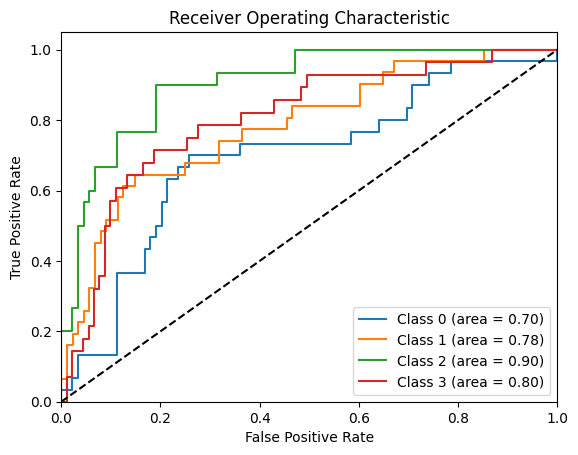

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

final_df_predictive_ver2 = final_df_predictive.copy()

final_df_predictive_ver2['Injuries_Per_Season_BoxCox_binned'] = pd.qcut(
    final_df_predictive_ver2['Injuries_Per_Season_BoxCox'],
    q=4,
    labels=False
)

features = ['Age', 'G', 'MP', 'Weight', 'Estimated_Seasons_Played', 'PTS', 'TRB', 'AST']

# Create your feature matrix X and target vector y
X = final_df_predictive_ver2[features]
y = final_df_predictive_ver2['Injuries_Per_Season_BoxCox_binned']

# Stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Basic accuracy score
nb_accuracy = accuracy_score(y_test, y_pred_nb)

# F1 score (use average='weighted' if class imbalance is suspected)
nb_f1_score = f1_score(y_test, y_pred_nb, average='weighted')

# Confusion matrix
nb_confusion_matrix = confusion_matrix(y_test, y_pred_nb)

# Classification report
nb_classification_report = classification_report(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"F1 Score: {nb_f1_score}")
print("Confusion Matrix:")
print(nb_confusion_matrix)
print("Classification Report:")
print(nb_classification_report)

# To calculate ROC-AUC, we need to binarize the labels if we have a multiclass problem
y_test_bin = label_binarize(y_test, classes=sorted(y.unique()))
n_classes = y_test_bin.shape[1]

# We will create a one-vs-rest classifier for multiclass ROC
nb_model_ovr = OneVsRestClassifier(GaussianNB())
nb_model_ovr.fit(X_train, y_train)
y_pred_prob = nb_model_ovr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Final Injury Prediction Model

In [200]:
final_df_predictive_ver8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 64 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name                                595 non-null    object 
 1   Age                                 595 non-null    float64
 2   G                                   595 non-null    float64
 3   MP                                  595 non-null    float64
 4   FGA                                 595 non-null    float64
 5   3PA                                 595 non-null    float64
 6   2PA                                 595 non-null    float64
 7   FTA                                 595 non-null    float64
 8   FT%                                 595 non-null    float64
 9   Weight                              595 non-null    float64
 10  Salary                              595 non-null    float64
 11  Position_C                          595 non-n

In [201]:
final_df_predictive_ver8['Injuries_Per_Season_BoxCox'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 595 entries, 0 to 594
Series name: Injuries_Per_Season_BoxCox
Non-Null Count  Dtype  
--------------  -----  
595 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


In [202]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")

    return plt

In [203]:
from sklearn.model_selection import train_test_split

# Assuming 'target' is your target variable
X = final_df_predictive_ver8.drop(['Injuries_Per_Season_BoxCox', 'Name', 'total_injury', 'total_injury_z', 'Defensive_Stats_per_Min', 'Offensive_Capability', 'total_injury_sqrt', 'Defensive_Stats_per_Min_log', 'Offensive_Capability_log'], axis=1)  # Drop non-numeric and target column
y = final_df_predictive_ver8['Injuries_Per_Season_BoxCox']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
importances = importances.sort_values('importance', ascending=False)
print(importances)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_pca.shape[1])

                               feature  importance
0                                  Age    0.190202
9                               Salary    0.098831
8                               Weight    0.034156
37                          3P%_per100    0.027943
31                           Rk_per100    0.024430
1                                    G    0.023475
54                   Versatility_Score    0.022892
25                                TOV%    0.021871
43                          FT%_per100    0.021518
7                                  FT%    0.021495
45                     Defensive_Index    0.021280
2                                   MP    0.021083
18    offensive_capability_transformed    0.020070
26                                 OWS    0.019382
20                                 FTr    0.019294
17  defensive_stats_per_min_normalized    0.018377
24                                BLK%    0.018198
49                    Playmaking_Index    0.018015
22                             

In [204]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Preparing the dataset
X = final_df_predictive_ver8.drop(['Injuries_Per_Season_BoxCox', 'Name', 'total_injury', 'total_injury_z', 'Defensive_Stats_per_Min', 'Offensive_Capability', 'total_injury_sqrt', 'Defensive_Stats_per_Min_log', 'Offensive_Capability_log'], axis=1)
y = final_df_predictive_ver8['Injuries_Per_Season_BoxCox']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Model prediction
y_pred = model.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 1.5452352456069691


In [205]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from numpy import mean, std

# Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

X = final_df_predictive_ver8.drop(['Injuries_Per_Season_BoxCox', 'Name', 'total_injury', 'Rk_per100', 'total_injury_z', 'Defensive_Stats_per_Min', 'Offensive_Capability', 'total_injury_sqrt', 'Defensive_Stats_per_Min_log'], axis=1)
y = final_df_predictive_ver8['Injuries_Per_Season_BoxCox']

# Standardizing the features and applying PCA
scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X = pca.fit_transform(X)

# Define the base models with their hyperparameters
# Best parameters from previous tuning
best_params = {
    'rf': {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 300},
    'xgb': {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8},
    'gb': {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8},
    'lgbm': {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.8, 'verbosity' : -1},
    'ridge': {},  # Add the best Ridge parameters if available
    'svr': {}     # Add the best SVR parameters if available
}

# Initialize models with best parameters
tuned_models = {
    'rf': RandomForestRegressor(**best_params['rf'], random_state=42),
    'xgb': XGBRegressor(**best_params['xgb'], random_state=42),
    'gb': GradientBoostingRegressor(**best_params['gb'], random_state=42),
    'lgbm': LGBMRegressor(**best_params['lgbm'], random_state=42),
    'ridge': Ridge(**best_params['ridge']),  # Replace with actual params
    'svr': SVR(**best_params['svr'])        # Replace with actual params
}

# List of models to pass to StackingRegressor
estimators = [(name, model) for name, model in tuned_models.items()]

# Create the ensemble model with stacking
final_estimator = Ridge()  # You can tune this model as well if needed
ensemble = StackingRegressor(estimators=estimators, final_estimator=final_estimator, cv=5)

# Define the evaluation procedure
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# Evaluate the ensemble model
scores = cross_val_score(ensemble, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# Report performance
mse = mean(-scores)
std_dev = std(-scores)
print(f'MSE: {mse:.3f} (STD: {std_dev:.3f})')


MSE: 1.544 (STD: 0.317)


MSE: 1.555 (STD: 0.323)
Cross-validated RMSE scores: [1.32773005 1.25061029 1.22247403 1.09875024 1.24935384]
Mean Absolute Error (MAE): 0.816
R² Score: 0.044
Explained Variance Score: 0.046


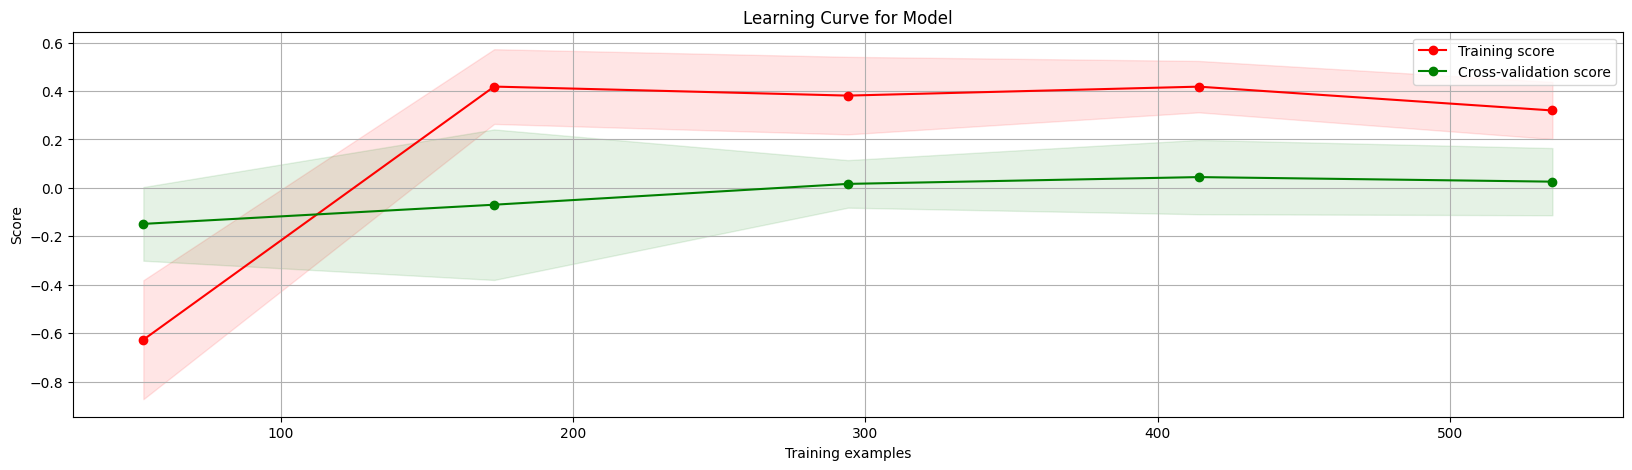

In [207]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy import mean, std

# Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

X = final_df_predictive_ver8.drop(['Injuries_Per_Season_BoxCox', 'Name', 'Rk_per100', 'total_injury', 'total_injury_z', 'Defensive_Stats_per_Min', 'Offensive_Capability', 'total_injury_sqrt', 'Defensive_Stats_per_Min_log', 'Offensive_Capability_log'], axis=1)
y = final_df_predictive_ver8['Injuries_Per_Season_BoxCox']

# Standardizing the features and applying PCA
scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X = pca.fit_transform(X)

# Updated best parameters for LightGBM and other models
best_params = {
    'rf': {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 300},
    'xgb': {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8},
    'gb': {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8},
    'lgbm': {'boosting_type': 'gbdt', 'objective': 'regression', 'metric': 'rmse', 'num_leaves': 15, 'max_depth': 5, 'min_data_in_leaf': 20, 'learning_rate': 0.05, 'subsample': 0.8, 'verbosity' : -1},
    'ridge': {},  # Add the best Ridge parameters if available
    'svr': {}     # Add the best SVR parameters if available
}

# Initialize models with best parameters
tuned_models = {
    'rf': RandomForestRegressor(**best_params['rf'], random_state=42),
    'xgb': XGBRegressor(**best_params['xgb'], random_state=42),
    'gb': GradientBoostingRegressor(**best_params['gb'], random_state=42),
    'lgbm': LGBMRegressor(**best_params['lgbm'], random_state=42),  # Updated LGBMRegressor with new parameters
    'ridge': Ridge(**best_params['ridge']),  # Replace with actual params
    'svr': SVR(**best_params['svr'])        # Replace with actual params
}

# List of models to pass to StackingRegressor
estimators = [(name, model) for name, model in tuned_models.items()]

# Create the ensemble model with stacking
final_estimator = Ridge()  # You can tune this model as well if needed
ensemble = StackingRegressor(estimators=estimators, final_estimator=final_estimator, cv=5)

# Define the evaluation procedure
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# Evaluate the ensemble model
scores = cross_val_score(ensemble, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# Report performance
mse = mean(-scores)
std_dev = std(-scores)
print(f'MSE: {mse:.3f} (STD: {std_dev:.3f})')

# Cross-validation for RMSE
scores = cross_val_score(ensemble, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("Cross-validated RMSE scores:", rmse_scores)

# Fit model on training data
ensemble.fit(X_train, y_train)

# Make predictions
y_pred = ensemble.predict(X_test)

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Output results
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'R² Score: {r2:.3f}')
print(f'Explained Variance Score: {explained_variance:.3f}')

# Choose model and set up learning curve plot
model = ensemble # or any other fitted model
plot_learning_curve(model, "Learning Curve for Model", X, y, cv=cv)
plt.show()


## One last attempt, polynomial features

In [208]:
# Assuming your DataFrame is loaded into `final_df_predictive_ver8`
df = final_df_predictive_ver8
y = df['Injuries_Per_Season_BoxCox']  # Ensure this is the correct target variable

# Filter out non-numeric data for plotting
numeric_columns3 = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns3 = numeric_columns3.drop(['Injuries_Per_Season_BoxCox', 'Rk_per100'])  # Exclude the target itself


# Spearman's Rank Correlation for all numeric features
correlation_matrix2 = df[numeric_columns3.to_list() + ['Injuries_Per_Season_BoxCox']].corr(method='spearman')
print("Spearman's rank correlation matrix:")
print(correlation_matrix2)


Spearman's rank correlation matrix:
                                         Age         G        MP       FGA  \
Age                                 1.000000  0.015671  0.146089  0.098484   
G                                   0.015671  1.000000  0.628562  0.608387   
MP                                  0.146089  0.628562  1.000000  0.937089   
FGA                                 0.098484  0.608387  0.937089  1.000000   
3PA                                 0.102281  0.470364  0.720636  0.786566   
2PA                                 0.049295  0.552690  0.841050  0.888154   
FTA                                 0.035210  0.512832  0.755093  0.778674   
FT%                                 0.095114  0.346092  0.443911  0.481560   
Weight                              0.103600  0.061896 -0.013848 -0.042457   
Salary                              0.258121 -0.028965  0.288801  0.288888   
total_injury                        0.174223 -0.108426 -0.019955 -0.025891   
Estimated_Seasons_Played    

In [209]:
# Select only numeric columns for checking infinities
numeric_df = df.select_dtypes(include=[np.number])

# Checking for columns with infinite values in numeric columns
inf_columns = numeric_df.columns.to_series()[np.isinf(numeric_df).any()]

# Checking for columns with NaN values
nan_columns = df.columns.to_series()[df.isnull().any()]

print("Columns with infinite values:", inf_columns)
print("Columns with NaN values:", nan_columns)


Columns with infinite values: Series([], dtype: object)
Columns with NaN values: Series([], dtype: object)


In [210]:
# Temporarily adjust the display options to show all columns
pd.set_option('display.max_rows', None)

# Display the maximum values
max_values = df.select_dtypes(include=[np.number]).max()
print("Maximum values in each column:\n", max_values)

# Display the minimum values
min_values = df.select_dtypes(include=[np.number]).min()
print("Minimum values in each column:\n", min_values)

# Reset display options to default
pd.reset_option('display.max_rows')

Maximum values in each column:
 Age                                    1.000000e+00
G                                      1.000000e+00
MP                                     1.000000e+00
FGA                                    3.126761e+00
3PA                                    1.170000e+01
2PA                                    1.830000e+01
FTA                                    2.549445e+00
FT%                                    1.000000e+00
Weight                                 3.110000e+02
Salary                                 2.497867e+00
Position_C                             1.000000e+00
Position_F                             1.000000e+00
Position_G                             1.000000e+00
total_injury                           1.020000e+02
Estimated_Seasons_Played               1.000000e+00
Injuries_Per_Season_BoxCox             8.758613e+00
Starter_Role                           1.000000e+00
3pt_Shooter                            1.000000e+00
Defensive_Stats_per_Min         

In [211]:
# Apply a log transformation to 'Offensive_Capability' to handle large values
df['Offensive_Capability_Log'] = np.log1p(df['Offensive_Capability'].clip(lower=0))

# Scale 'Playmaking_Index' by removing extreme values
df['Playmaking_Index_Scaled'] = df['Playmaking_Index'].clip(upper=df['Playmaking_Index'].quantile(0.99), lower=df['Playmaking_Index'].quantile(0.01))

# Check the new ranges for these columns
print("New max of Offensive_Capability_Log:", df['Offensive_Capability_Log'].max())
print("New min of Playmaking_Index_Scaled:", df['Playmaking_Index_Scaled'].min())


New max of Offensive_Capability_Log: 709.782712893384
New min of Playmaking_Index_Scaled: -21.374195750154794


In [212]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Use only numeric columns for X
X = df.drop(columns= ['Name', 'Offensive_Capability', 'Playmaking_Index'],axis=1)
y = df['Injuries_Per_Season_BoxCox'] 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple decision tree
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)

# Feature importance
importances = tree_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
# Temporarily adjust the display options to show all rows
pd.set_option('display.max_rows', None)

print("Feature Importances from Decision Tree:")
print(feature_importance)

# Reset display options to default
pd.reset_option('display.max_rows')

# Prediction and performance check
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.3f}')

Feature Importances from Decision Tree:
                               Feature    Importance
13                        total_injury  9.013550e-01
23                   total_injury_sqrt  5.205414e-02
15          Injuries_Per_Season_BoxCox  3.585675e-02
20                      total_injury_z  1.043977e-02
27                                 FTr  1.588546e-04
4                                  3PA  1.355191e-04
5                                  2PA  7.507191e-17
8                               Weight  4.865772e-18
47                          2P%_per100  6.951103e-19
0                                  Age  0.000000e+00
46                          2PA_per100  0.000000e+00
45                           2P_per100  0.000000e+00
43                          3PA_per100  0.000000e+00
44                          3P%_per100  0.000000e+00
42                           3P_per100  0.000000e+00
41                          FG%_per100  0.000000e+00
40                          FGA_per100  0.000000e+00
39    

Cross-validated RMSE scores: [9.5228278  1.21539583 1.24384262 1.13219101 1.28185149]
MSE: 1.4744001117566465, R2: 0.0027348059200169583, MAE: 0.9144475277833255, Explained Variance: 0.010572974675660207


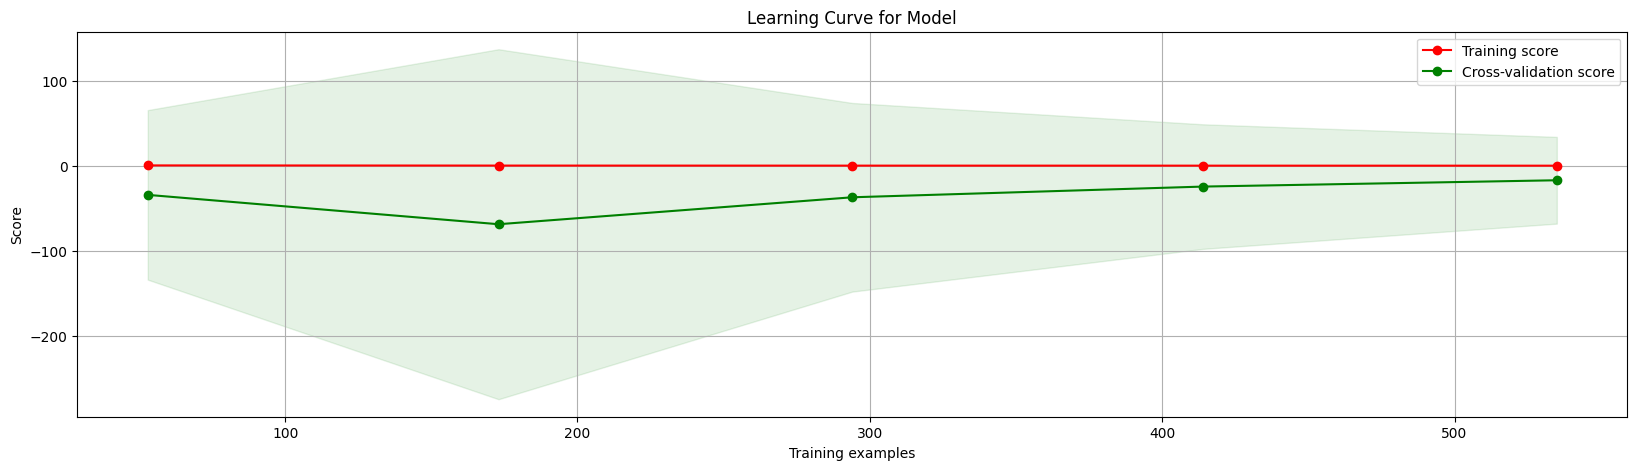

In [213]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler

# Preparing the dataset
X = final_df_predictive_ver8[['Age', 'G', 'MP', 'FGA', 'FTA', 'Weight', 'Salary', 'Position_C', 'Position_F', 'Position_G', 
        'Estimated_Seasons_Played', 'Starter_Role', '3pt_Shooter', 'Made_Playoffs', 'Defensive_Stats_per_Min_log',
        'Offensive_Capability_Log', 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'FGA_per100', 'Defensive_Index',
        'Offensive_Index', 'Rebounding_Index', 'Scoring_Efficiency', 'Impact_Score', 'Net_Rating', 'Physicality_Index',
        'Versatility_Score', 'Playmaking_Index_Scaled']]
y = final_df_predictive_ver8['Injuries_Per_Season_BoxCox']  # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model = Ridge()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

# Cross-validation for RMSE
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("Cross-validated RMSE scores:", rmse_scores)
print(f'MSE: {mse}, R2: {r2}, MAE: {mae}, Explained Variance: {evs}')

# Choose model and set up learning curve plot
plot_learning_curve(model, "Learning Curve for Model", X, y, cv=cv)
plt.show()


## One last round of checking & dealing with outliers / noise 

In [214]:
from sklearn.preprocessing import RobustScaler
import numpy as np
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Detecting and removing outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X_filtered = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]
y_filtered = y[X.index.isin(X_filtered.index)]

# Redefining the dataset post-outlier removal
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Updating the pipeline with RobustScaler
robust_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('ridge', Ridge())
])

# Hyperparameters for RandomizedSearchCV
param_dist = {'ridge__alpha': loguniform(0.01, 100)}
random_search = RandomizedSearchCV(robust_pipeline, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

# Ensemble methods
bagging_model = RandomForestRegressor(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)

# Evaluation for each model
models = {'Bagging': y_pred_bagging, 'Boosting': y_pred_boosting}
for model_name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse}, RMSE: {rmse}, R2: {r2}, MAE: {mae}, Explained Variance: {evs}")


Bagging - MSE: 1.50541041173399, RMSE: 1.226951674571574, R2: -0.06295946466618818, MAE: 0.8367622016734202, Explained Variance: 0.014462295010215342
Boosting - MSE: 1.7853593446875307, RMSE: 1.3361733961906033, R2: -0.260629392804528, MAE: 0.884774100177575, Explained Variance: -0.17369919523768362


In [215]:
final_df_predictive_ver8['Injuries_Per_Season_BoxCox'].describe()

count    595.000000
mean       2.876227
std        1.285933
min        0.000000
25%        2.261754
50%        3.115672
75%        3.210242
max        8.758613
Name: Injuries_Per_Season_BoxCox, dtype: float64

# Final Injury Severity Classification Model

In [216]:
# Adding new composite indices to a copy to avoid modifying the original DataFrame
final_df_predictive_ver6['Efficiency_Index'] = (final_df_predictive_ver6['TS%'] + final_df_predictive_ver6['eFG%'] + final_df_predictive_ver6['USG%']) / 3
final_df_predictive_ver6['Impact_Score'] = (final_df_predictive_ver6['VORP'] + final_df_predictive_ver6['WS'] + final_df_predictive_ver6['PER']) / 3
final_df_predictive_ver6['Net_Rating'] = final_df_predictive_ver6['ORtg_per100'] - final_df_predictive_ver6['DRtg_per100']
final_df_predictive_ver6['Physicality_Index'] = (final_df_predictive_ver6['PF_per100'] + final_df_predictive_ver6['BLK_per100'] + final_df_predictive_ver6['DRB_per100']) / 3
final_df_predictive_ver6['Versatility_Score'] = (final_df_predictive_ver6['TRB%'] + final_df_predictive_ver6['AST%']) / 2

# Columns to drop
columns_to_drop = [
    'FG%', '3P%', '2P%', 'FG', '3P', '2P', 'GS', 'ORB', 'DRB', 'STL', 'BLK',
    'PTS', 'TRB', 'AST', 'TOV', 'ankle_injury', 'hamstring_injury', 'shoulder_injury',
    'elbow_injury', 'knee_injury', 'calf_injury', 'finger_injury', 'back_injury',
    'fracture_injury', 'hip_injury', 'toe_injury',
    'Team_ATL', 'Team_BOS', 'Team_BRK', 'Team_CHI', 'Team_CHO', 'Team_CLE', 'Team_DAL',
    'Team_DEN', 'Team_DET', 'Team_GSW', 'Team_HOU', 'Team_IND', 'Team_LAC', 'Team_LAL',
    'Team_MEM', 'Team_MIA', 'Team_MIL', 'Team_MIN', 'Team_NOP', 'Team_NYK', 'Team_OKC',
    'Team_ORL', 'Team_PHI', 'Team_PHO', 'Team_POR', 'Team_SAC', 'Team_SAS', 'Team_TOR',
    'Team_UTA', 'Team_WAS', 'Injuries_Per_Season', 'FG_per36', 'FGA_per36', 'FG%_per36',
    '3P_per36', '3PA_per36', '3P%_per36', '2P_per36', '2PA_per36', '2P%_per36', 'FT_per36',
    'FTA_per36', 'FT%_per36', 'ORB_per36', 'DRB_per36', 'TRB_per36', 'AST_per36', 'STL_per36',
    'BLK_per36', 'TOV_per36', 'PF_per36', 'PTS_per36', 'FT', 'PF', 'total_injury_log',
    'total_injury_inv', 'Defensive_Stats_per_Min_sqrt', 'Defensive_Stats_per_Min_inv',
    'Offensive_Capability_inv', 
    'Unknown', 'Injuries_Per_Season_BoxCox', 'Defensive_Stats_per_Min', 
    'Offensive_Capability', 'total_injury_z', 'total_injury_sqrt', 
    'Defensive_Stats_per_Min_log', 'Offensive_Capability_log'
]

# Create new DataFrame without the dropped columns
final_df_predictive_ver9 = final_df_predictive_ver6.drop(columns=columns_to_drop)


In [217]:
# Let's print the description of the transformed columns to see the distribution
print(final_df_predictive_ver9[['Day-to-Day', 'Injured_List', 'Out_for_Season/Indefinitely']].describe())

# Assuming we categorize each column into 'low', 'medium', 'high' based on percentiles
thresholds_day_to_day = np.percentile(final_df_predictive_ver9['Day-to-Day'].dropna(), [33, 66])
thresholds_injured_list = np.percentile(final_df_predictive_ver9['Injured_List'].dropna(), [33, 66])
thresholds_out_for_season = np.percentile(final_df_predictive_ver9['Out_for_Season/Indefinitely'].dropna(), [33, 66])

print("Thresholds for Day-to-Day:", thresholds_day_to_day)
print("Thresholds for Injured List:", thresholds_injured_list)
print("Thresholds for Out for Season:", thresholds_out_for_season)


         Day-to-Day  Injured_List  Out_for_Season/Indefinitely
count  5.950000e+02  5.950000e+02                 5.950000e+02
mean   2.388379e-17  2.686926e-16                 2.746636e-16
std    1.000841e+00  1.000841e+00                 1.000841e+00
min   -2.139877e+00 -2.470136e+00                -1.654207e+00
25%   -3.667943e-01 -9.355410e-02                -1.292209e-01
50%    1.109374e-01  1.418434e-01                -2.520366e-02
75%    2.879081e-01  3.434618e-01                 3.597563e-01
max    3.437870e+00  4.189635e+00                 3.476214e+00
Thresholds for Day-to-Day: [0.10183127 0.11093741]
Thresholds for Injured List: [-0.01935708  0.14184335]
Thresholds for Out for Season: [-0.12922091  0.35975634]


In [218]:
# Define a function to classify injury severity based on thresholds
def classify_injury_severity(row):
    if row['Out_for_Season/Indefinitely'] > thresholds_out_for_season[1]:
        return 'High'  # High risk: major severity
    elif row['Injured_List'] > thresholds_injured_list[1]:
        return 'Medium'  # Medium risk: moderate severity
    else:
        return 'Minor/None'  # Low risk or no significant injury combined

# Apply the classification to the DataFrame
final_df_predictive_ver9['Injury_Severity'] = final_df_predictive_ver9.apply(classify_injury_severity, axis=1)

# Check the distribution of the new categorical target
print(final_df_predictive_ver9['Injury_Severity'].value_counts())


Injury_Severity
Minor/None    414
High          132
Medium         49
Name: count, dtype: int64


In [219]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Prepare data
X = final_df_predictive_ver9.drop(['Name', 'Day-to-Day', 'Injured_List', 'Out_for_Season/Indefinitely', 'Injury_Severity'], axis=1)
y = final_df_predictive_ver9['Injury_Severity']

# Convert string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Resampling
over = SMOTE(sampling_strategy='auto')
under = RandomUnderSampler(sampling_strategy='auto')
resample = Pipeline([('over', over), ('under', under)])
X_train_resampled, y_train_resampled = resample.fit_resample(X_train_poly, y_train)

# Hyperparameter Tuning with Cross-Validation for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
                              param_grid=param_grid_rf, cv=3, scoring='accuracy', verbose=2)
grid_search_rf.fit(X_train_resampled, y_train_resampled)
best_rf = grid_search_rf.best_estimator_

# Initialize XGBoost Classifier
xgb = XGBClassifier(random_state=42, scale_pos_weight=1)
xgb.fit(X_train_resampled, y_train_resampled)

# Basic RF with original data
basic_rf_original = RandomForestClassifier(random_state=42, class_weight='balanced')
basic_rf_original.fit(X_train_poly, y_train)  # Note: This uses the polynomial features but not the resampled data

# Basic RF with resampled data
basic_rf_resampled = RandomForestClassifier(random_state=42, class_weight='balanced')
basic_rf_resampled.fit(X_train_resampled, y_train_resampled)

# Models dictionary for evaluation
models = {
    'Basic RF Original': basic_rf_original,
    'Basic RF Resampled': basic_rf_resampled,
    'Best Tuned RF': best_rf,
    'XGBoost': xgb
}

# Evaluation loop
for name, model in models.items():
    y_pred = model.predict(X_test_poly)  # Ensure all models are evaluated on the same test set
    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("-" * 50)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   5.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   5.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   5.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.9s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.9s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   5.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   5.8s
[CV] END max_depth=10, min_samples_split=5, n_es

C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:160: UserWarning: [07:33:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Results for Basic RF Original:
              precision    recall  f1-score   support

        High       0.88      0.52      0.65        27
      Medium       0.00      0.00      0.00         9
  Minor/None       0.80      0.99      0.88        83

    accuracy                           0.81       119
   macro avg       0.56      0.50      0.51       119
weighted avg       0.75      0.81      0.76       119

Accuracy: 0.8067226890756303
--------------------------------------------------
Results for Basic RF Resampled:
              precision    recall  f1-score   support

        High       0.68      0.63      0.65        27
      Medium       0.25      0.22      0.24         9
  Minor/None       0.88      0.92      0.90        83

    accuracy                           0.80       119
   macro avg       0.60      0.59      0.60       119
weighted avg       0.79      0.80      0.79       119

Accuracy: 0.7983193277310925
--------------------------------------------------
Results for Bes

C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

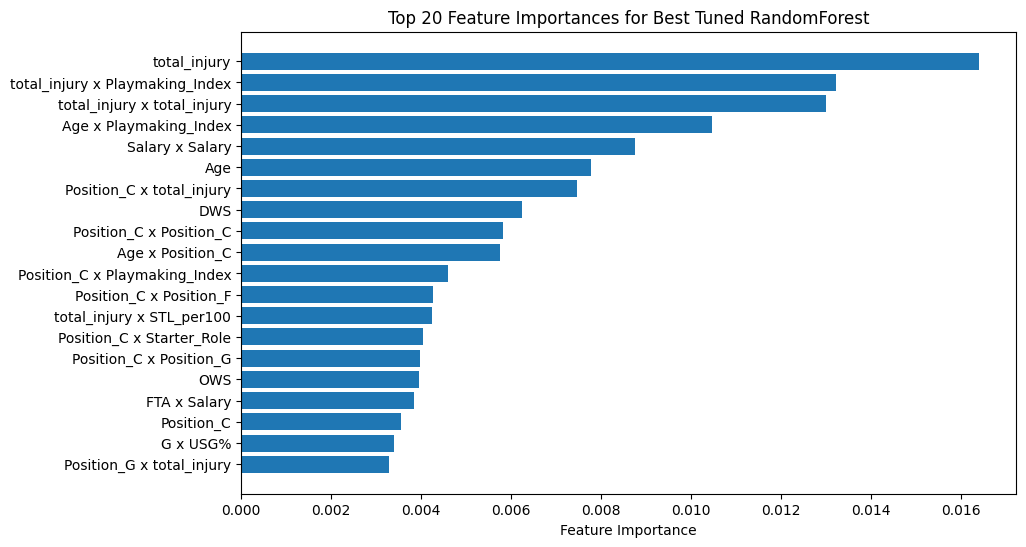

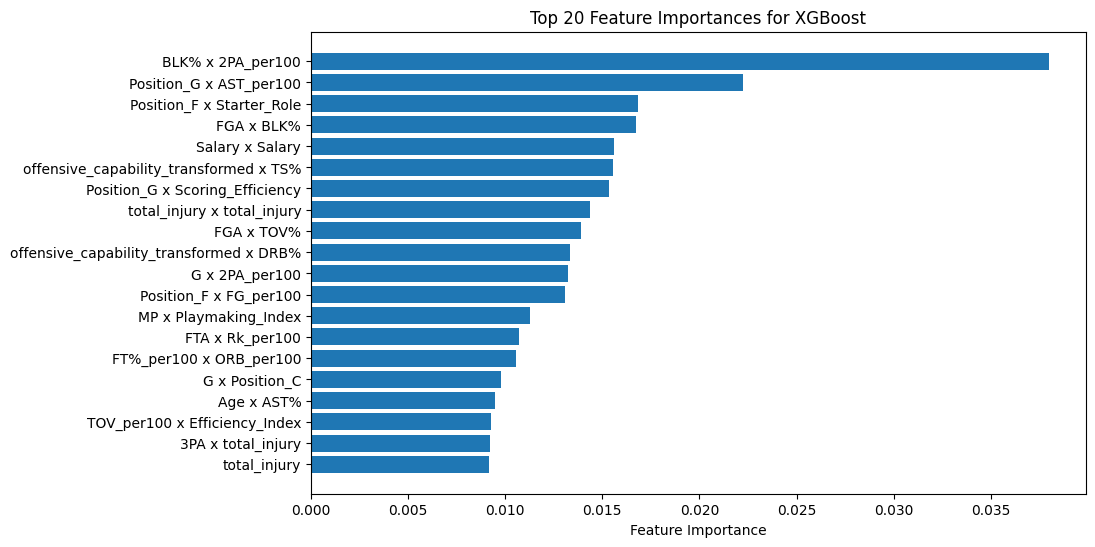

In [222]:
from itertools import combinations_with_replacement

# Generate a list of polynomial feature names
def poly_feature_names(original_features, degree):
    def add_interactions(features):
        # This function adds feature names for all interactions
        return [f"{a} x {b}" for a, b in combinations_with_replacement(features, 2)]
    
    # Start with the linear feature names
    poly_names = list(original_features)
    
    # Generate names for higher-degree terms
    for d in range(2, degree + 1):
        poly_names.extend(add_interactions(original_features))
    
    return poly_names

# Get original feature names from the dataset (before polynomial features were applied)
original_feature_names = final_df_predictive_ver9.columns.drop(['Name', 'Day-to-Day', 'Injured_List', 'Out_for_Season/Indefinitely', 'Injury_Severity'])

# Generate polynomial feature names
poly_names = poly_feature_names(original_feature_names, degree=2)

# Now update the plot_feature_importances function to use these names
def plot_feature_importances(importances, feature_names, title, n_features=20):
    # Sort the feature importances in descending order and take the top n_features
    indices = np.argsort(importances)[-n_features:]
    sorted_importances = importances[indices]
    sorted_names = [feature_names[i] for i in indices]

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
    plt.yticks(range(len(sorted_importances)), sorted_names)
    plt.xlabel('Feature Importance')
    plt.show()

# Call the function with the top 20 features
plot_feature_importances(best_rf.feature_importances_, poly_names, 'Top 20 Feature Importances for Best Tuned RandomForest', n_features=20)
plot_feature_importances(xgb.feature_importances_, poly_names, 'Top 20 Feature Importances for XGBoost', n_features=20)


Confusion Matrix for Basic RF Original


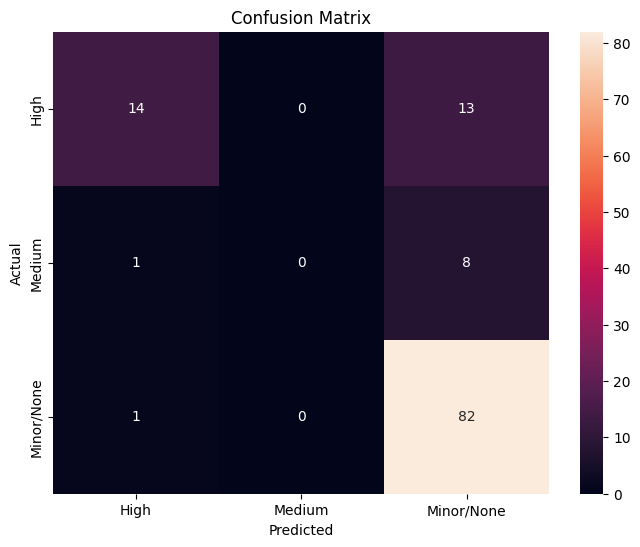

Confusion Matrix for Basic RF Resampled


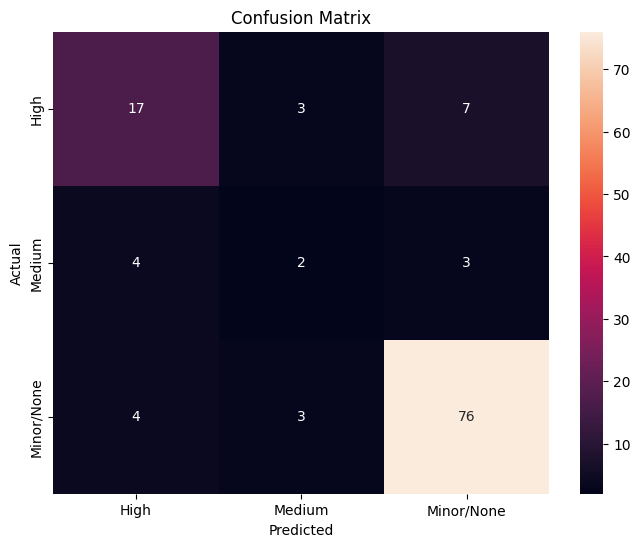

Confusion Matrix for Best Tuned RF


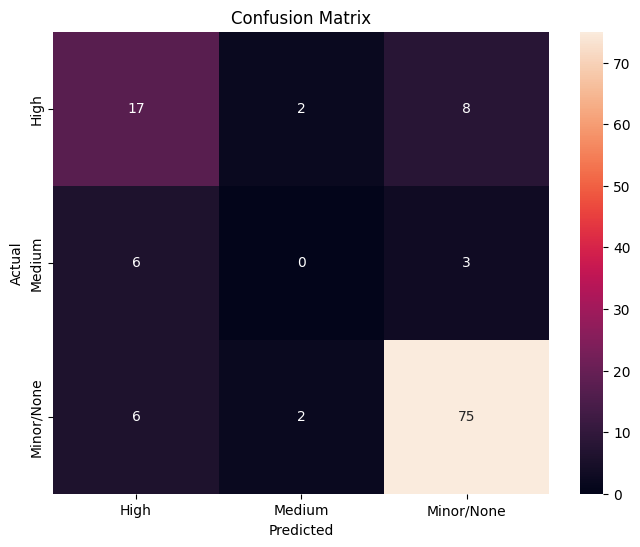

Confusion Matrix for XGBoost


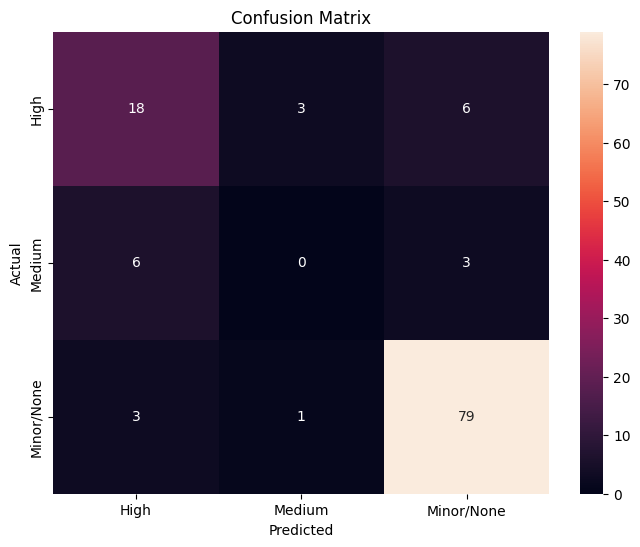

In [223]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

for name, model in models.items():
    y_pred = model.predict(X_test_poly)
    print(f"Confusion Matrix for {name}")
    plot_confusion_matrix(y_test, y_pred, classes=label_encoder.classes_)

Error Analysis for Basic RF Original on 'Medium' class:


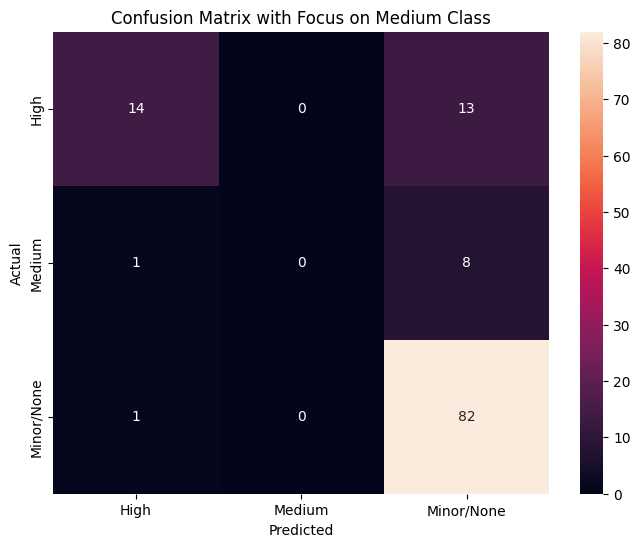

Actual vs Predicted counts for focused class:
True positives (correctly predicted as Medium): 0
Predicted as High when it was Medium: 1
Predicted as Medium when it was High: 0
Predicted as Minor/None when it was Medium: 8
Predicted as Medium when it was Minor/None: 0
Error Analysis for Basic RF Resampled on 'Medium' class:


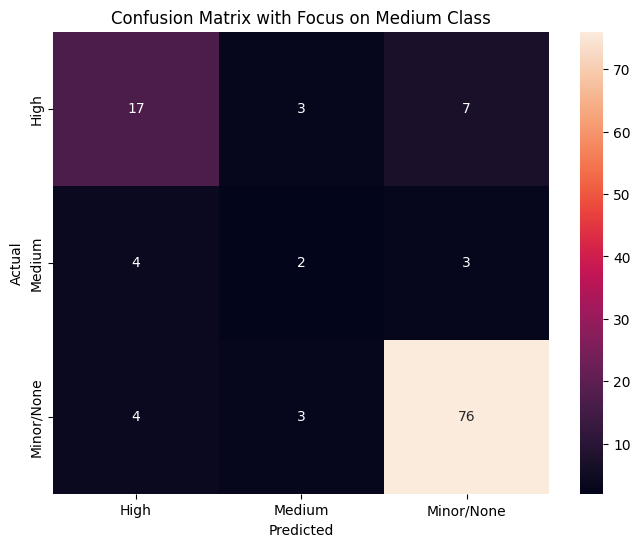

Actual vs Predicted counts for focused class:
True positives (correctly predicted as Medium): 2
Predicted as High when it was Medium: 4
Predicted as Medium when it was High: 3
Predicted as Minor/None when it was Medium: 3
Predicted as Medium when it was Minor/None: 3
Error Analysis for Best Tuned RF on 'Medium' class:


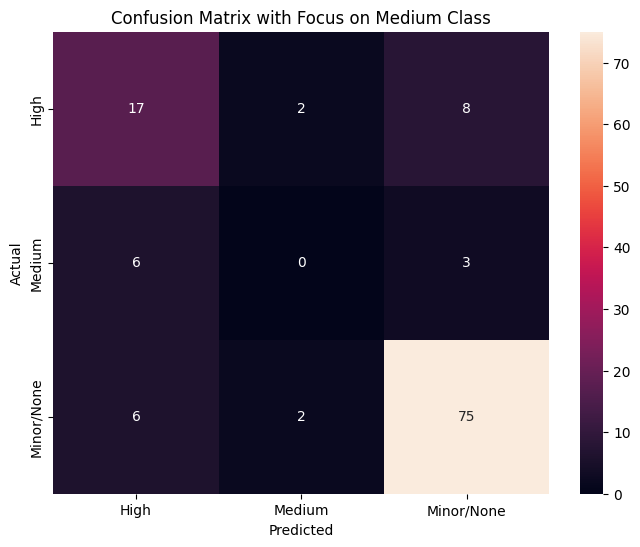

Actual vs Predicted counts for focused class:
True positives (correctly predicted as Medium): 0
Predicted as High when it was Medium: 6
Predicted as Medium when it was High: 2
Predicted as Minor/None when it was Medium: 3
Predicted as Medium when it was Minor/None: 2
Error Analysis for XGBoost on 'Medium' class:


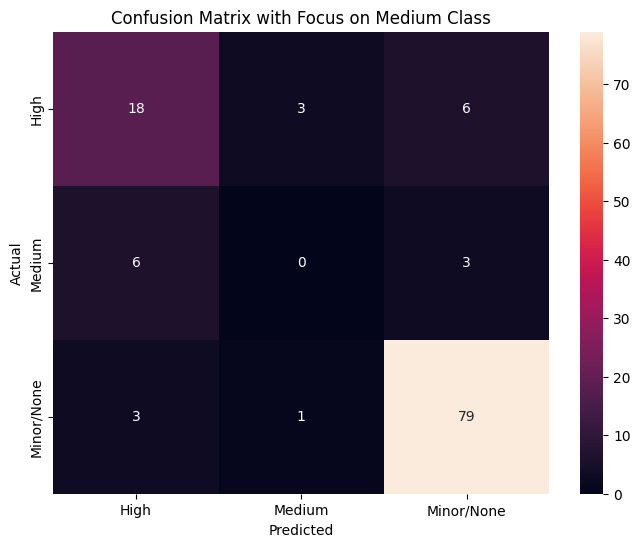

Actual vs Predicted counts for focused class:
True positives (correctly predicted as Medium): 0
Predicted as High when it was Medium: 6
Predicted as Medium when it was High: 3
Predicted as Minor/None when it was Medium: 3
Predicted as Medium when it was Minor/None: 1


In [224]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_class_confusion_matrix(y_true, y_pred, classes, focus_class_index):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix with Focus on {classes[focus_class_index]} Class')
    plt.show()

    # Print specific confusion details for the focused class
    print("Actual vs Predicted counts for focused class:")
    print(f"True positives (correctly predicted as {classes[focus_class_index]}): {cm[focus_class_index, focus_class_index]}")
    for i, class_name in enumerate(classes):
        if i != focus_class_index:
            print(f"Predicted as {class_name} when it was {classes[focus_class_index]}: {cm[focus_class_index, i]}")
            print(f"Predicted as {classes[focus_class_index]} when it was {class_name}: {cm[i, focus_class_index]}")

medium_class_index = label_encoder.transform(['Medium'])[0]
for name, model in models.items():
    y_pred = model.predict(X_test_poly)
    print(f"Error Analysis for {name} on 'Medium' class:")
    plot_class_confusion_matrix(y_test, y_pred, label_encoder.classes_, medium_class_index)
